# AIM :Exploration Data Analysis of Trending Youtube Video Stats on basis of- 
### 1. Number of views
### 2. Number of likes
### 3. Number of dislikes
### 4. Number of comments

## Exploration Done :
1. Visual Analysis of Views,Likes,Dislikes,Comment Count (Globally)
2. Comparision of Mean Values of Views,Likes,Dislikes,CommentCount ( Country-Wise)
3. Correlation of Attributes(Globally)
4. Correlation of Attributes (Country-Wise)
5. Comparison of Ratios (Country-Wise)
   - Likes : Views
   - Dislikes : Views
   - Comment Count : Views
   - User Participation : User Consumption

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('YoutubeData.csv')

In [3]:
#To view first 5 columns of data
data.head()

video_id trending_date  \
0  aaOB-ErYq6Y    2017-11-14   
1  XPrHD-7jjUs    2018-02-12   
2  UOgNUOKYXiA    2018-05-13   
3  W1LO7Zk_38o    2018-02-01   
4  BmEvz7tkoks    2018-01-14   

                                               title channel_title  \
0           Waymo's fully self-driving cars are here         Waymo   
1  This Hidden 300 Foot Stretch Of The Berlin Wal...     VICE News   
2  Durga | Full Ep 1068 | 11th May 2018 | Odia Se...     Tarang TV   
3  ÐÐ«Ð¡ÐÐÐÐÐÐ ÐÐÐ®Ð¡ Â«ÐÐÐ ÐÐÐÐ¦Ð...  Sasha Sotnik   
4  Amlo canta Las MaÃ±anitas a su esposa, por su ...  Viral Pancho   

  publish_date  category_id publish_time  \
0   2017-11-07           28     16:03:12   
1   2018-02-05           25     17:15:48   
2   2018-05-12           24     06:00:01   
3   2018-01-29           25     16:00:05   
4   2018-01-13           27     23:36:07   

                                                tags   views  likes  dislikes  \
0  self-driving car|"waymo"|"self-driving"|"drive...  665232   6485       714   
1  300 foot|"VICE News Tonight"|"VICE News"|"Berl...   52637   1005        51   
2  tarang|"tarang tv"|"tarang tv online"|"tarang ...   87291    340        74   
3  Ð¶Ð¸Ð»ÑÐµ|"Ð²ÑÑÐµÐ»ÐµÐ½Ð¸Ðµ"|"Ð°Ð²Ð°ÑÐ¸Ð¹Ð...  139389  11135       954   
4  amlo|"pena nieto"|"elecciones 2018"|"politica ...   57778   3689        69   

   comment_count                                  thumbnail_link  \
0           2497  https://i.ytimg.com/vi/aaOB-ErYq6Y/default.jpg   
1            132  https://i.ytimg.com/vi/XPrHD-7jjUs/default.jpg   
2             31  https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg   
3           2903  https://i.ytimg.com/vi/W1LO7Zk_38o/default.jpg   
4            691  https://i.ytimg.com/vi/BmEvz7tkoks/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed  \
0              False             False                   False   
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description         category_name  \
0  Waymo, which started as the Google self-drivin...  Science & Technology   
1  The Berlin Wall was the ultimate symbol of the...       News & Politics   
2  Durga: Story of a revengeful daughter who ente...         Entertainment   
3  ÐÑÐ°Ð¶Ð´Ð°Ð½Ðµ Ð Ð¾ÑÑÐ¸Ð¸ Ð¿ÑÐ¾Ð´Ð¾Ð»Ð¶Ð°...       News & Politics   
4  Mexico va a votar por amlo por las propuestas ...             Education   

         region  
0  Great Britan  
1  Great Britan  
2         India  
3        Russia  
4        Mexico

In [4]:
#Keeping only the required columns
dataset = { 'views' : data['views'] , 
            'likes' : data['likes'] , 
            'dislikes' : data['dislikes'] , 
            'comment_count' : data['comment_count'] ,
           'region' : data['region'] }
df = pd.DataFrame(dataset)

In [5]:
df.head()

views  likes  dislikes  comment_count        region
0  665232   6485       714           2497  Great Britan
1   52637   1005        51            132  Great Britan
2   87291    340        74             31         India
3  139389  11135       954           2903        Russia
4   57778   3689        69            691        Mexico

In [8]:
#Some Visual Preconfigurations
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")

plt.rc('figure', figsize=(6, 3), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [9]:
df.describe()

views      likes   dislikes  comment_count
count    375942.00  375942.00  375942.00      375942.00
mean    1326568.26   37884.31    2126.11        4253.78
std     7098567.72  165413.08   22484.37       25458.76
min         117.00       0.00       0.00           0.00
25%       46978.00     669.00      41.00         109.00
50%      177370.50    3446.00     179.00         511.00
75%      647679.25   17476.50     749.00        2011.00
max   424538912.00 5613827.00 1944971.00     1626501.00

We note from the table above that : 

1. The average number of views of a trending video is 13,26,568. 
2. The median value for the number of views is 1,77,370, which means that half the trending videos have views that are less than that number, and the other half have views larger than that number.
3. The average number of likes of a trending video is 37,884, while the average number of dislikes is 2,126. 
4. The Average comment count is 4,253 while the median is 511.

# Visual Analysis of Views,Likes,Dislikes,Comment Count (Globally)

## Views histogram
Let's plot a histogram for the views column to take a look at its distribution.

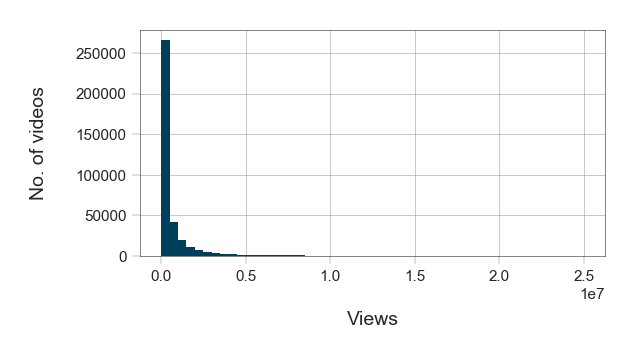

In [10]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["views"] < 25e6]["views"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Views", ylabel="No. of videos")

### OBSERVATION
Majority of the trending videos have 1 million views or less.

In [11]:
print("Percentage of trending videos with 1 million views or less = " + 
      str((df[df['views'] <= 1e6]['views'].count() / df['views'].count() * 100).round(2)) + " %")

Percentage of trending videos with 1 million views or less = 81.59 %


## Likes histogram
Let's plot a histogram for the likes column to take a look at its distribution.

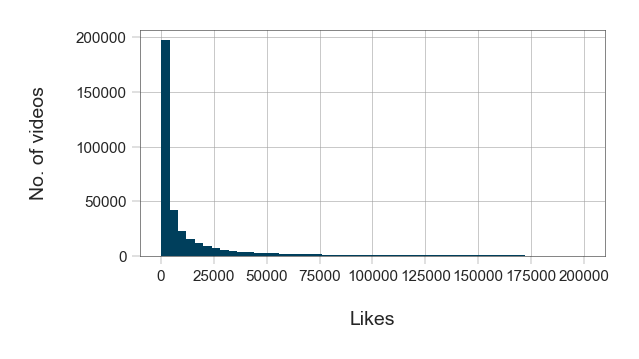

In [12]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["likes"] <= 2e5]["likes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Likes", ylabel="No. of videos")

### OBSERVATION
Majority of the trending videos have 50,000 likes or less.

In [13]:
print("Percentage of trending videos with 50,000 likes or less = " + 
      str((df[df['likes'] <= 5e4]['likes'].count() / df['likes'].count() * 100).round(2)) + " %")

Percentage of trending videos with 50,000 likes or less = 87.13 %


## Dislikes histogram
Let's plot a histogram for the dislikes column to take a look at its distribution.

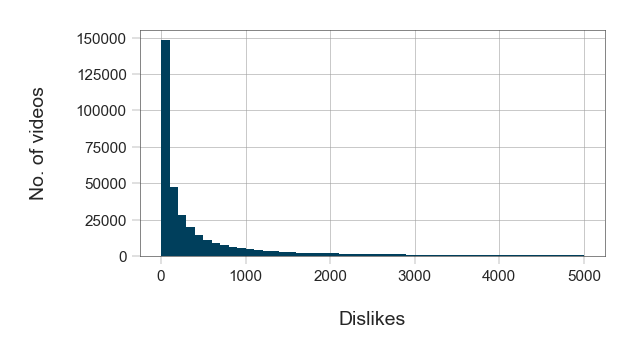

In [14]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["dislikes"] <= 5e3]["dislikes"], kde=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Dislikes", ylabel="No. of videos")

### OBSERVATION
Majority of the trending videos have 2000 dislikes or less.

In [15]:
print("Percentage of trending videos with 2000 dislikes or less = " + 
      str((df[df['dislikes'] <= 2e3]['likes'].count() / df['likes'].count() * 100).round(2)) + " %")

Percentage of trending videos with 2000 dislikes or less = 87.0 %


## Comment Count histogram
Let's plot a histogram for the comment_count column to take a look at its distribution.

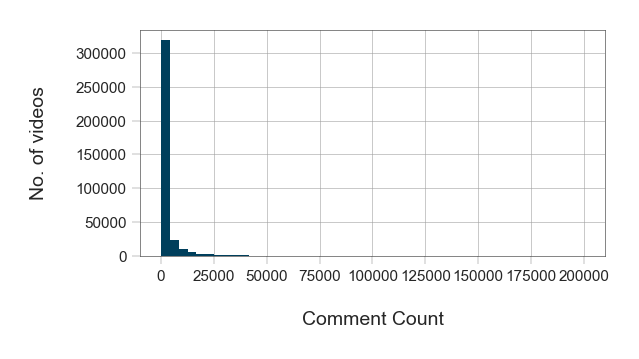

In [16]:
fig, ax = plt.subplots()
_ = sns.distplot(df[df["comment_count"] < 200000]["comment_count"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, 
                 bins=np.linspace(0, 2e5, 49), ax=ax)
_ = ax.set(xlabel="Comment Count", ylabel="No. of videos")

### OBSERVATION
Majority of the trending videos have 4000 comment count or less.

In [17]:
print("Percentage of trending videos with 4000 comment count or less = " + 
      str((df[df['comment_count'] < 4000]['comment_count'].count() / df['comment_count'].count() * 100).round(2)) + " %")


Percentage of trending videos with 4000 comment count or less = 84.27 %


In [18]:
#All distinct regions
countries = df['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

# Comparision of Mean Values of Views,Likes,Dislikes,CommentCount ( Country-Wise)

In [19]:
def MeanCompare(attribute,attribute_name):
    
    K=[]
    for i in range(0,len(countries)):
        K.append(i)
        
    plt.plot(K,attribute)
    plt.xlabel('Countries',fontsize=15)
    plt.ylabel(attribute_name,fontsize=15)
    plt.title('Country-Wise ' + attribute_name + ' Mean Values',fontsize=20)
    plt.xticks(K,countries,rotation=30, horizontalalignment='right')
    plt.show()

In [20]:
#List of Different Attributes Mean Values (Country-Wise)
views_mean=[]
likes_mean=[]
dislikes_mean=[]
comments_mean=[]

for i in countries:
    select = df.loc[data['region']==i] #Selects all rows of a particular country
    views_mean.append(select['views'].mean())
    likes_mean.append(select['likes'].mean())
    dislikes_mean.append(select['dislikes'].mean())
    comments_mean.append(select['comment_count'].mean())

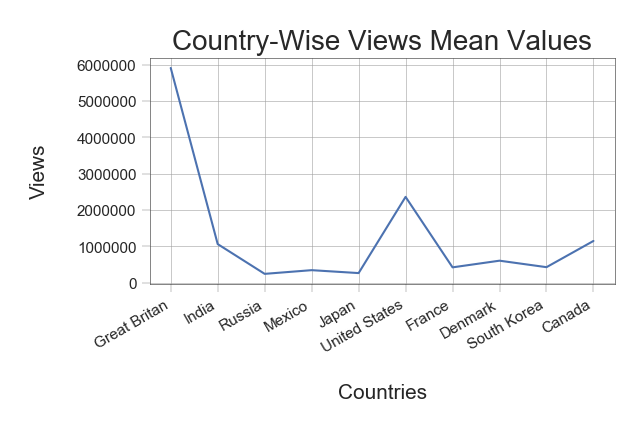

In [21]:
MeanCompare(views_mean,'Views')

## OBSERVATION
1. Great Britain has a much higher Average Views value of trending videos, than other countries. (6 million views)
2. Countries with Average Views value <= 1million : Denmark,Mexico,South Korea,Russia,Japan,France
3. Countries with Average Views value > 1million : Great Britain,Canada,India,US


Hence, majority countries have Average Views value of <= 1 million views.

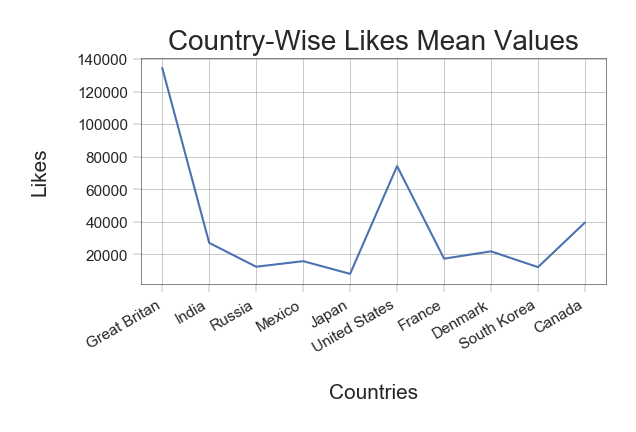

In [22]:
MeanCompare(likes_mean,'Likes')

## OBSERVATION
1. Great Britain has a much higher Average Likes value of trending videos than other countries. (>120,000 likes)
2. Countries with Average Likes value <= 50,000 Likes : Canada,Denmark,Mexico,India,South Korea,Russia,Japan,France
3. Countries with Average Likes value > 1million : Great Britain,US


Hence, majority countries have Average Likes value of <= 50,000 Likes.

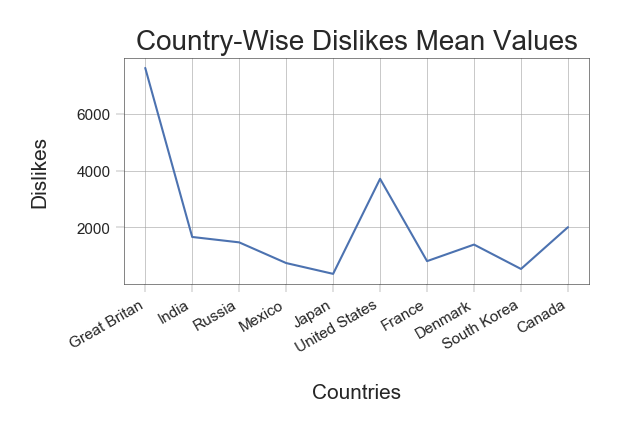

In [23]:
MeanCompare(dislikes_mean,'Dislikes')

## OBSERVATION
1. Great Britain has a much higher Average Dislikes value of trending videos than other countries. (>6000 dislikes)
2. Countries with Average Dislikes value <= 2000 Dislikes : Canada,Denmark,Mexico,India,South Korea,Russia,Japan,France
3. Countries with Average Dislikes value >2000 Dislikes : Great Britain,US


Hence, majority countries have Average Dislikes value of <= 2000 Dislikes.

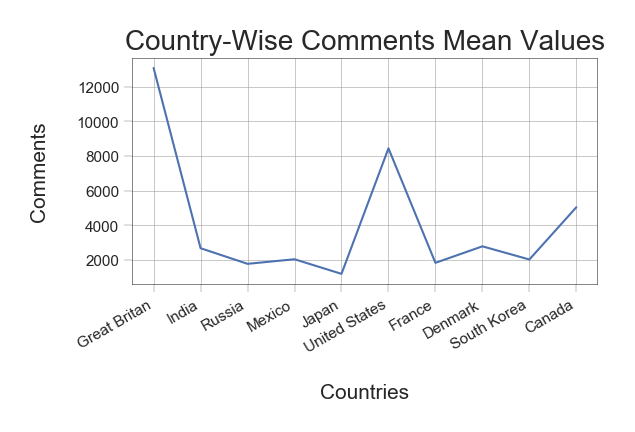

In [24]:
MeanCompare(comments_mean,'Comments')

## OBSERVATION
1. Great Britain has a much higher Average Comment Count value of trending videos than other countries. (>12,000 comments)
2. Countries with Average Comment Count value <= 4000 Comments : Denmark,Mexico,India,South Korea,Russia,Japan,France
3. Countries with Average Comment Count value > 4000 Comments : Great Britain,Canada,US


Hence, majority countries have Average Comments value of <= 4000 Comments.

# Correlation of Attributes(Globally)

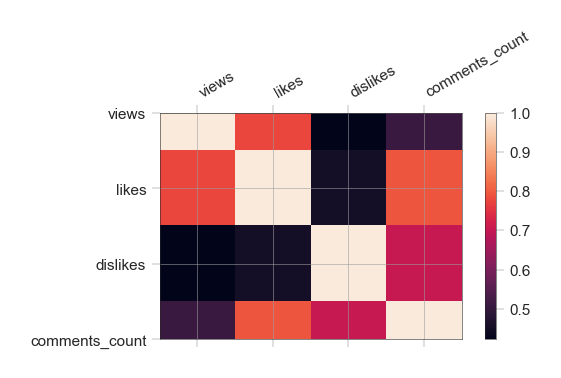

In [25]:
# plot correlation matrix
correlations = df.corr()
names = ['views','likes','dislikes','comments_count']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations)
fig.colorbar(cax)
ticks = np.arange(0,4,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names,rotation=30,horizontalalignment='left')
ax.set_yticklabels(names)
plt.show()

## OBSERVATION
1. There is a strong positive correlation between the number of likes and the number of comments of trending videos: As one of them increases, the other increases, and vice versa.
2. There is a strong positive correlation also between the number of views and the number of likes. 
3. There is a slightly weaker correlation between the number of dislikes and the number of comments.

# Correlation of Attributes (Country-Wise)

In [26]:
corr_vl=[]
corr_vd=[]
corr_vc=[]
corr_ld=[]
corr_lc=[]
corr_dc=[]

def corr(data_corr,country):
    corr_vl.append(np.corrcoef(data_corr['views'] ,data_corr['likes'])[1]) 
    corr_vd.append(np.corrcoef(data_corr['views'],data_corr['dislikes'])[1])
    corr_vc.append(np.corrcoef(data_corr['views'],data_corr['comment_count'])[1])
    corr_ld.append(np.corrcoef(data_corr['likes'],data_corr['dislikes'])[1])
    corr_lc.append(np.corrcoef(data_corr['likes'],data_corr['comment_count'])[1])
    corr_dc.append(np.corrcoef(data_corr['dislikes'],data_corr['comment_count'])[1])
    
for i in countries:
    select = df.loc[data['region']==i] #Selects all rows of a particular country
    corr(select,i)

In [27]:
def corr_plt(corr,attribute1,attribute2):
    K=[]
    for i in range(0,len(countries)):
        K.append(i)
        
    plt.plot(K,corr)
    plt.xlabel('Countries' , fontsize=15)
    plt.ylabel('Correlation',fontsize=15)
    plt.title('Correlation b/w ' + attribute1 + ' & ' + attribute2,fontsize=20)
    plt.xticks(K,countries,rotation=30, horizontalalignment='right')
    plt.show()   

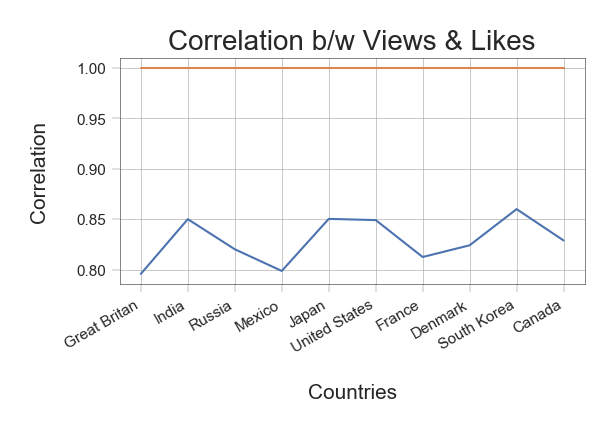

In [28]:
corr_plt(corr_vl,'Views','Likes')

## OBSERVATION
All countries show a strong positive correlation(>0.8) between views and likes of trending videos.

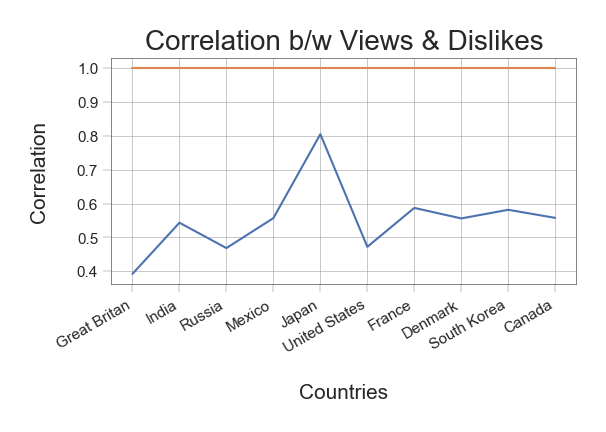

In [29]:
corr_plt(corr_vd,'Views','Dislikes')

## OBSERVATION
1. Only Japan shows a strong correlation(0.8) b/w views and dislikes of trending videos.
2. Rest of the countries have moderate/weak correlation(<0.6) b/w views & dislikes of trending videos. 

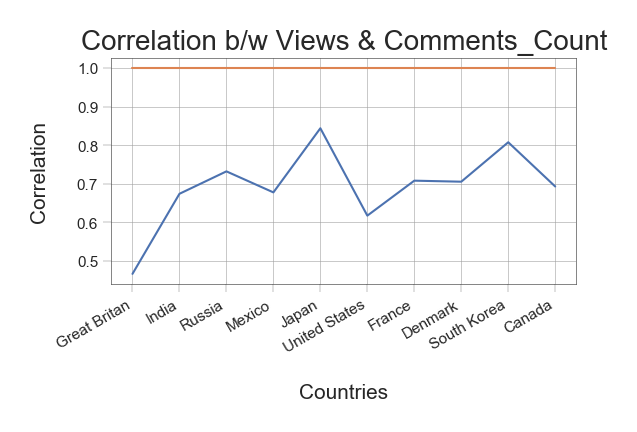

In [30]:
corr_plt(corr_vc,'Views','Comments_Count')

## OBSERVATION
1. Only Great Britain shows a weak correlation(<0.5) b/w Views & Comment Count of trending videos.
2. Rest of the countries show a strong/moderate correlation(>0.6) b/w Views & Comment Count of trending videos.

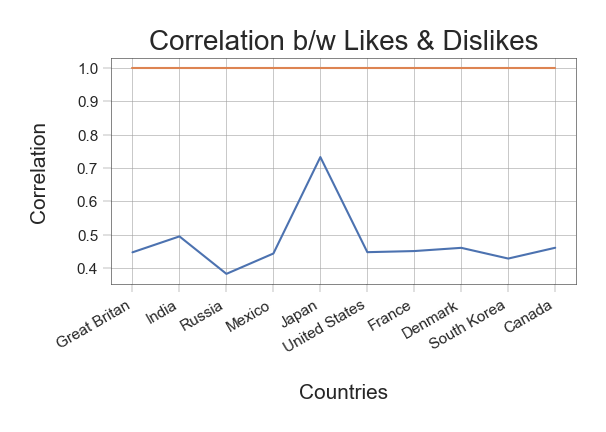

In [31]:
corr_plt(corr_ld,'Likes','Dislikes')

## OBSERVATION
1. Only Japan shows a strong correlation(>0.7) b/w Likes & Dislikes of trending videos.
2. Rest of the countries show a weak correlation(<0.5) b/w Likes & Dislikes of trending videos.

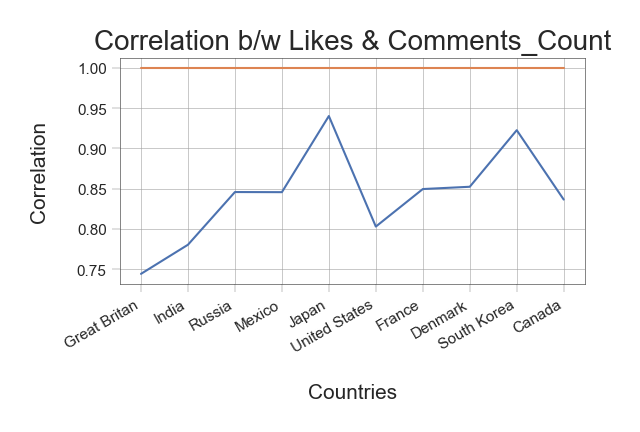

In [32]:
corr_plt(corr_lc,'Likes','Comments_Count')

## OBSERVATION
1. All countries show a strong correlation(>.75) b/w likes & comment count of trending videos.
2. South Korea & Japan show a highly strong correlation(>0.9) b/w likes & comment count of trending videos.

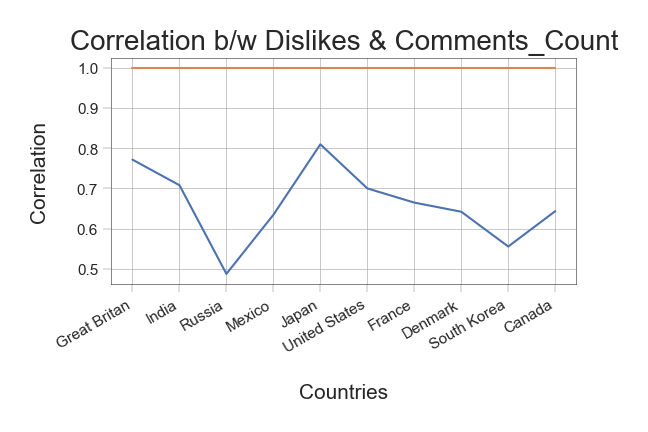

In [33]:
corr_plt(corr_dc,'Dislikes','Comments_Count')

## OBSERVATION
1. Only Russia shows a weaker correlation(0.5) b/w dislikes & comment_count of trending videos.
2. Rest of the countries show moderate/strong correlation b/w dislikes & comment_count of trending videos.

# Scatter Plots (Country-Wise)
Lets observe scatter plots(country-wise) for pair of attributes that are correlated.
1. Likes-Comment Count
2. Views-Likes
3. Dislikes-Comment Count

## 1. Likes - Comment Count Scatter Plot

In [34]:
def scatter_lc(select,country):
    plt.scatter(select['likes'],select['comment_count'])
    plt.xlabel('Likes')
    plt.ylabel('Comment Count')
    plt.title('Likes - Comment Count Scatter Plot for ' + country,fontsize=20)
    plt.show()

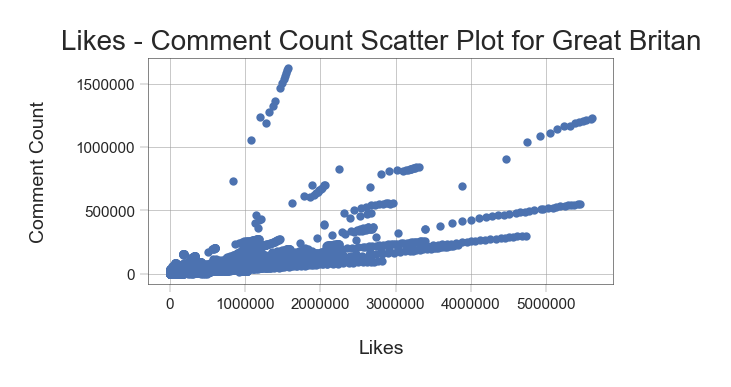

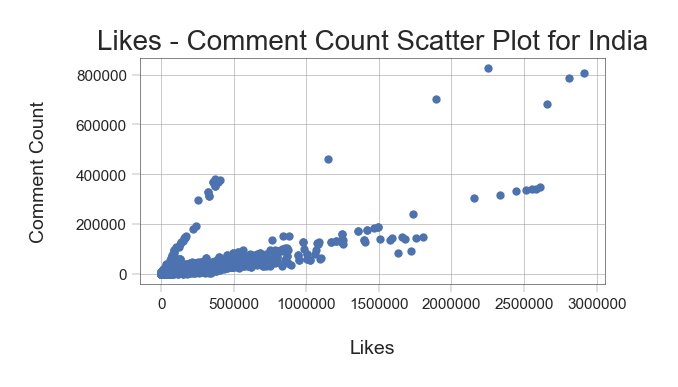

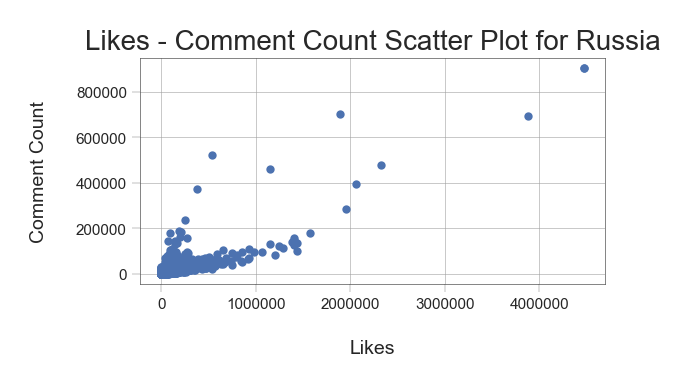

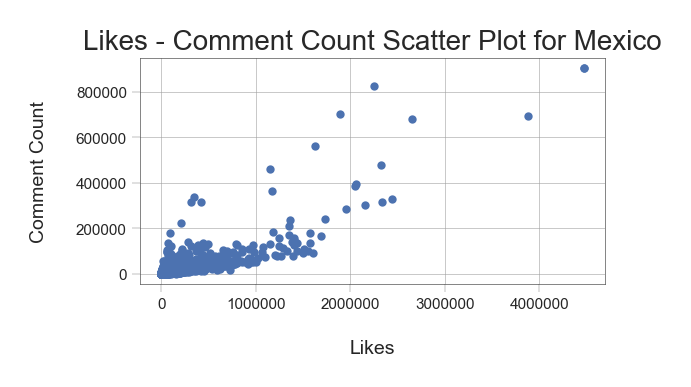

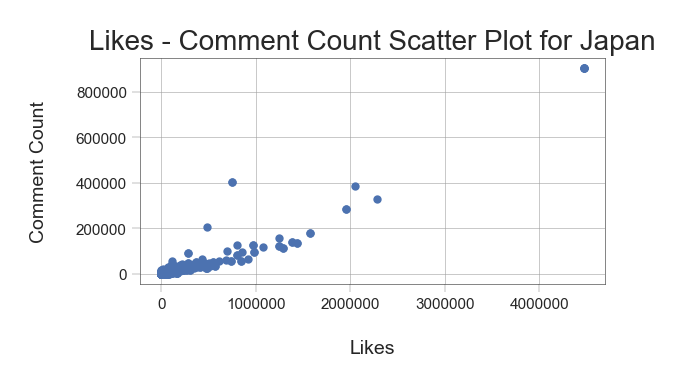

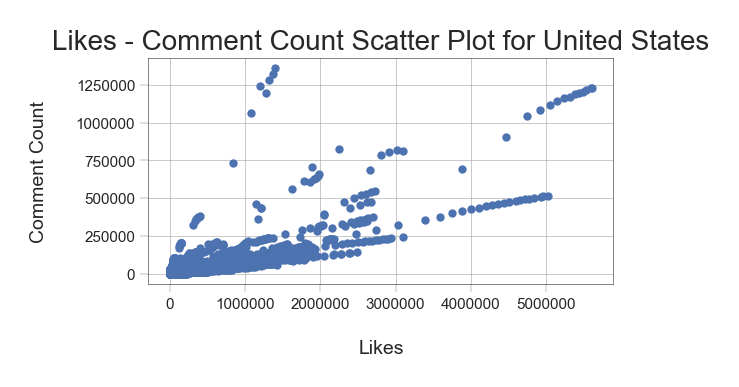

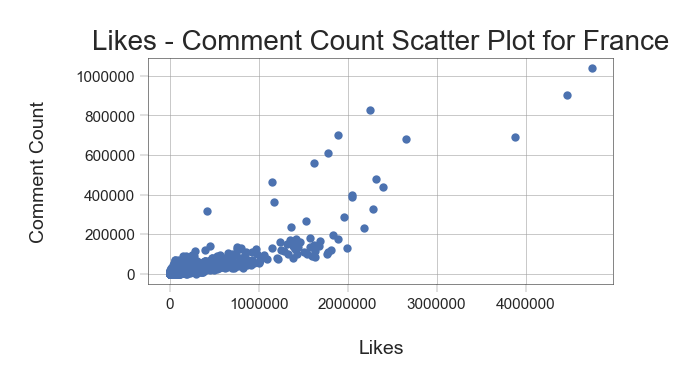

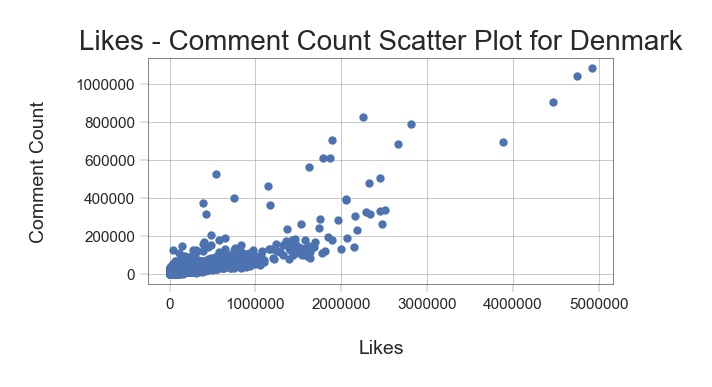

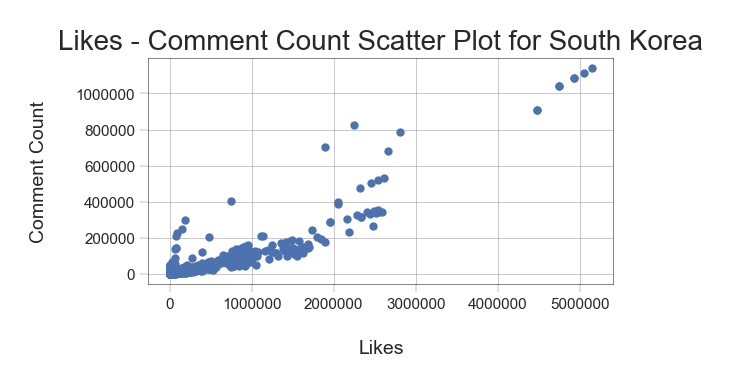

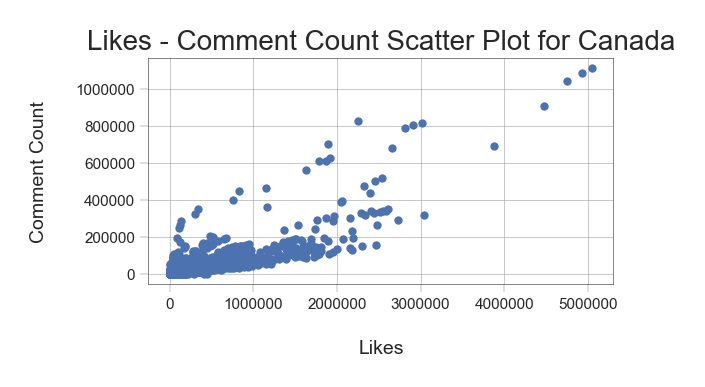

In [35]:
for i in countries:
    select = df.loc[data['region']==i] #Selects all rows of a particular country
    scatter_lc(select,i)

## 2. Views - Likes Scatter Plot

In [36]:
def scatter_vl(select,country):
    plt.scatter(select['views'],select['likes'])
    plt.xlabel('Views')
    plt.ylabel('Likes')
    plt.title('Views-Likes Scatter Plot for ' + country,fontsize=20)
    plt.show()

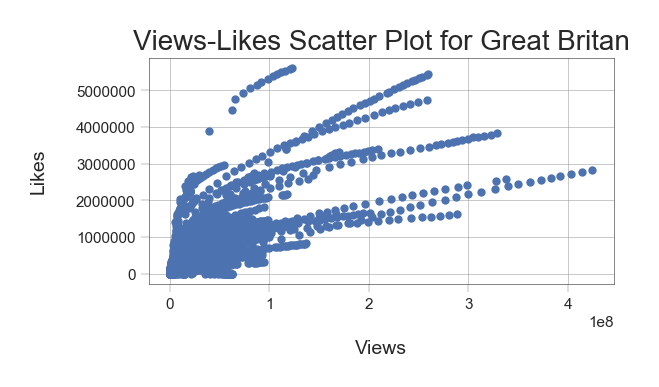

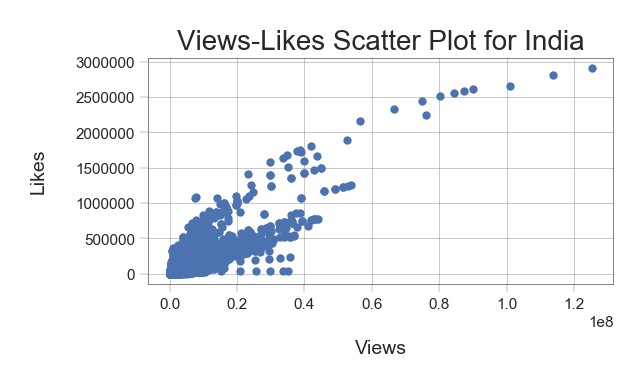

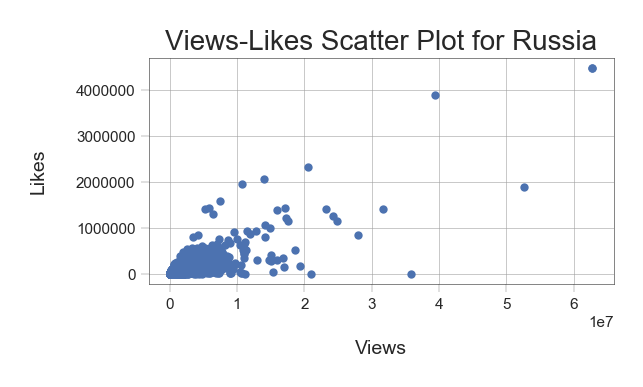

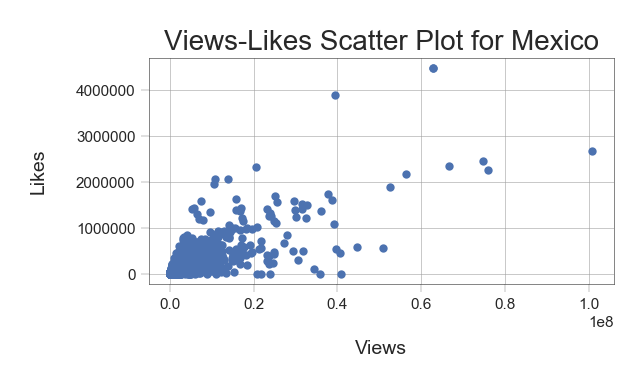

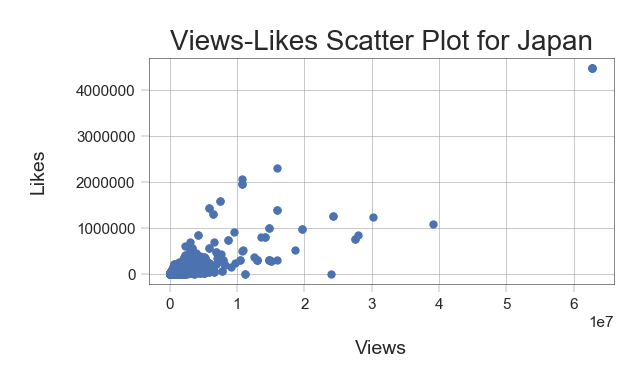

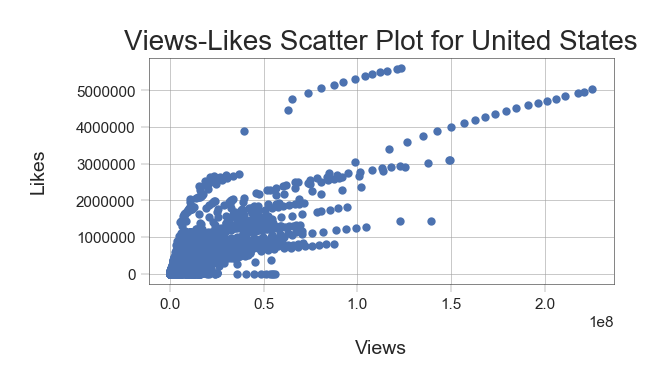

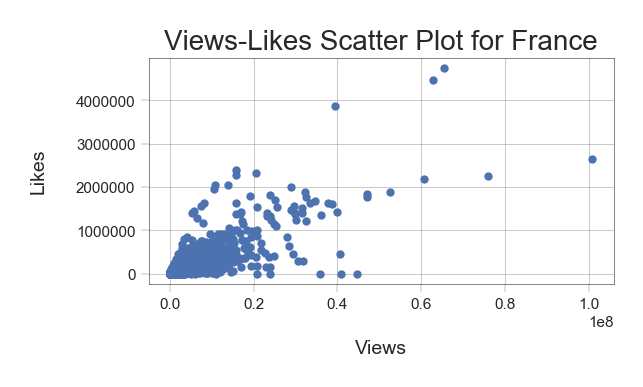

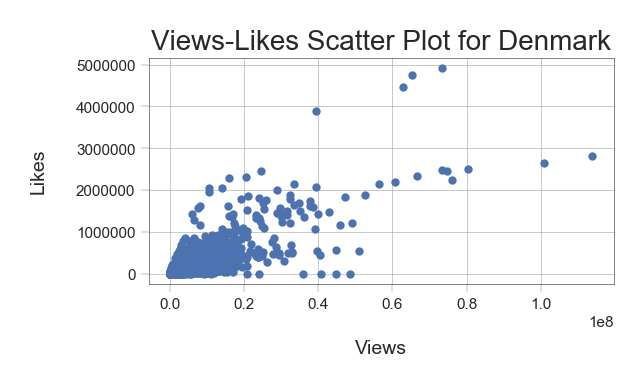

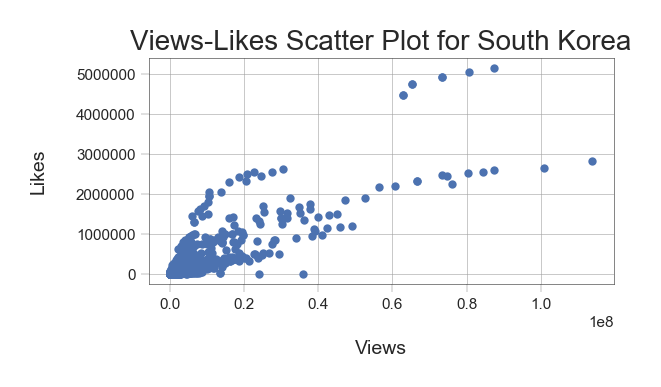

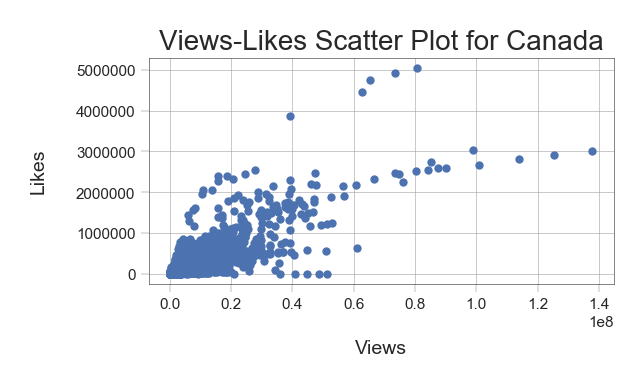

In [37]:
for i in countries:
    select = df.loc[data['region']==i] #Selects all rows of a particular country
    scatter_vl(select,i)

## 3. Dislikes - Comment Count Scatter Plot

In [38]:
def scatter_dc(select,country):
    plt.scatter(select['dislikes'],select['comment_count'])
    plt.xlabel('Dislikes')
    plt.ylabel('Comment Count')
    plt.title('Dislikes - Comment Count Scatter Plot for ' + country,fontsize=20)
    plt.show()

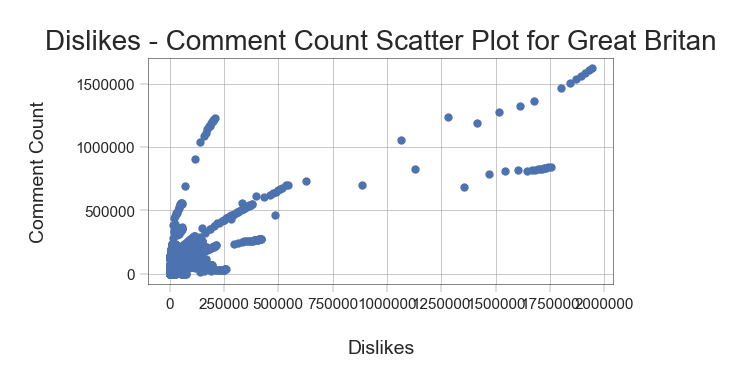

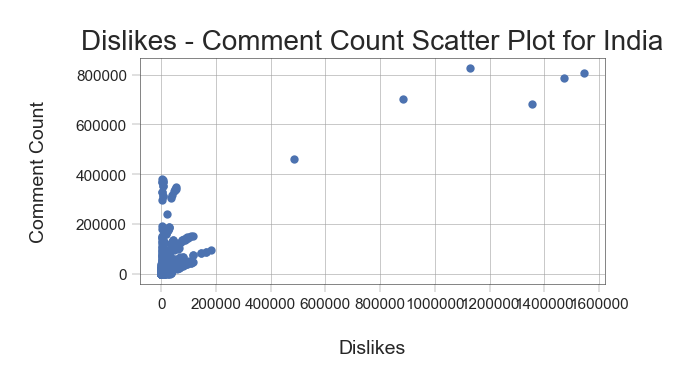

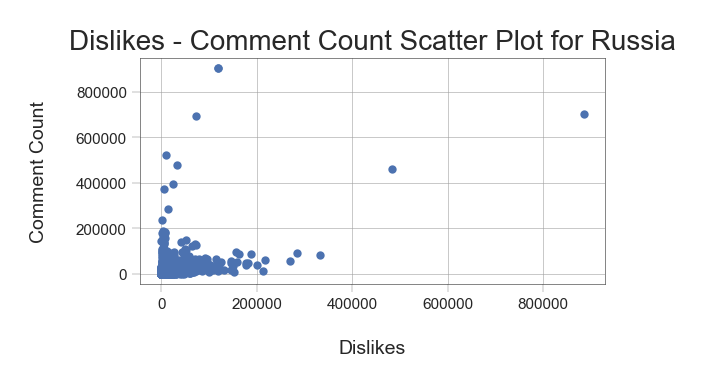

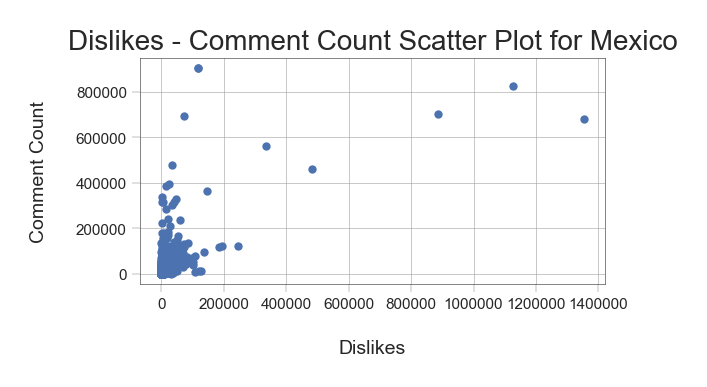

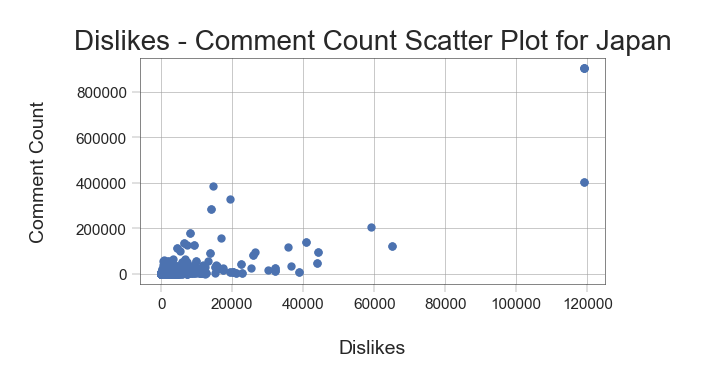

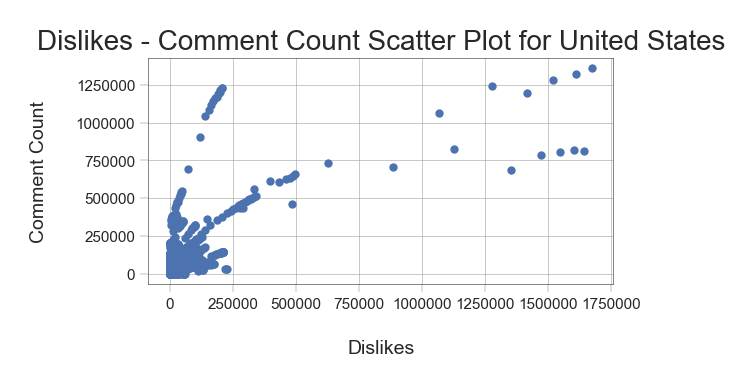

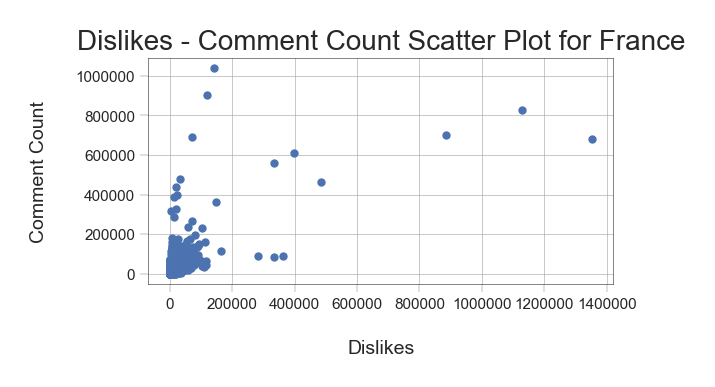

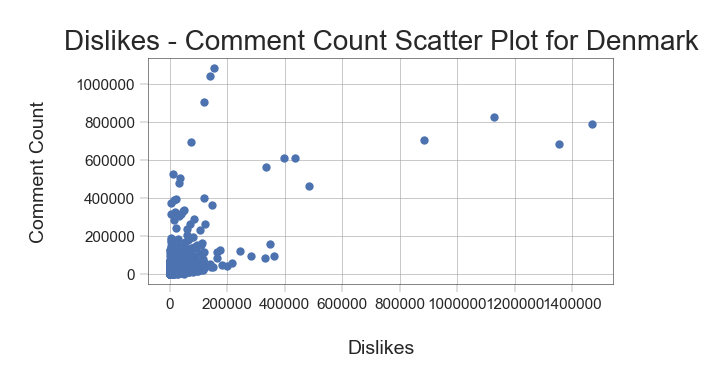

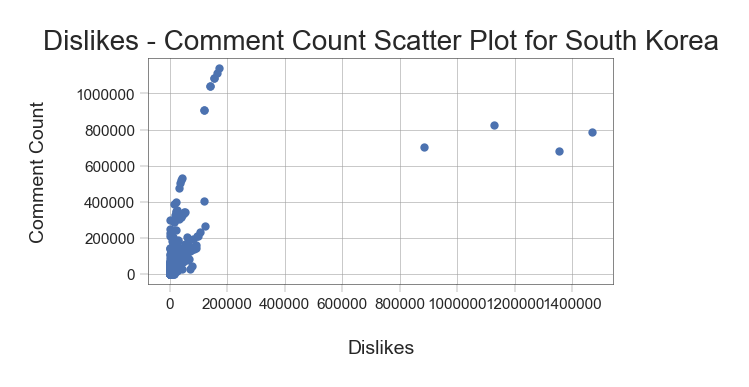

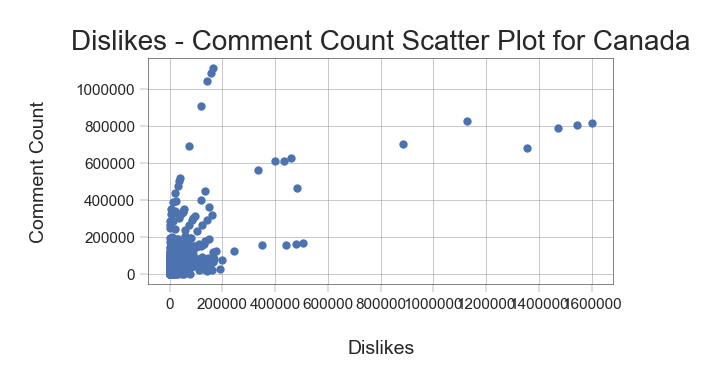

In [39]:
for i in countries:
    select = df.loc[data['region']==i] #Selects all rows of a particular country
    scatter_dc(select,i)

# Comparison of ratios ( country-wise )

In [40]:
#Drop all rows with any column=0
df = df[(df != 0).all(1)]
df = df.reset_index(drop=True)

In [41]:
df.describe()

views      likes   dislikes  comment_count
count    358399.00  358399.00  358399.00      358399.00
mean    1364654.35   39574.72    2208.23        4450.33
std     7229389.19  169191.02   23015.16       26056.72
min         117.00       1.00       1.00           1.00
25%       51082.00     816.00      48.00         135.00
50%      187286.00    3870.00     195.00         567.00
75%      673138.50   18739.00     791.00        2157.00
max   424538912.00 5613827.00 1944971.00     1626501.00

##### participation(part) = user participation in videos denoted by likes+dislikes+comment_count
##### consumption(cons) = user consumption of videos denoted by views

In [42]:
ratio_df = pd.DataFrame(columns = ['likes/views' , 'dislikes/views' , 'comments/views' , 'part/cons' , 'region'] )

ratio_df['likes/views'] = df['likes']/df['views']
ratio_df['dislikes/views'] = df['dislikes']/df['views']
ratio_df['comments/views'] = df['comment_count']/df['views']
ratio_df['part/cons'] = (df['likes'] + df['dislikes'] + df['comment_count']/ df['views'] )
ratio_df['region'] = df['region']


In [43]:
views_likes = []
views_dislikes = []
views_comments =[]
cons_part = []
    
for i in countries:
    select = ratio_df.loc[data['region']==i] #Selects all rows of a particular country
    views_likes.append(select['likes/views'].mean())
    views_dislikes.append(select['dislikes/views'].mean())
    views_comments.append(select['comments/views'].mean())
    cons_part.append(select['part/cons'].mean())

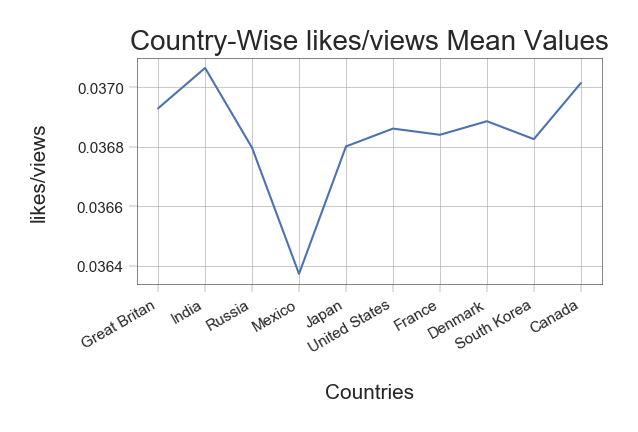

In [44]:
MeanCompare(views_likes , 'likes/views')

### OBSERVATION
1. India , on average, has the highest ratio of likes/views.(>0.0370)
 - likes/views = 0.0370 means that on average, 0.0370 of the viewers like the video. 
2. Mexico , on average, has the lowest ratio of likes/views. (<0.0364)

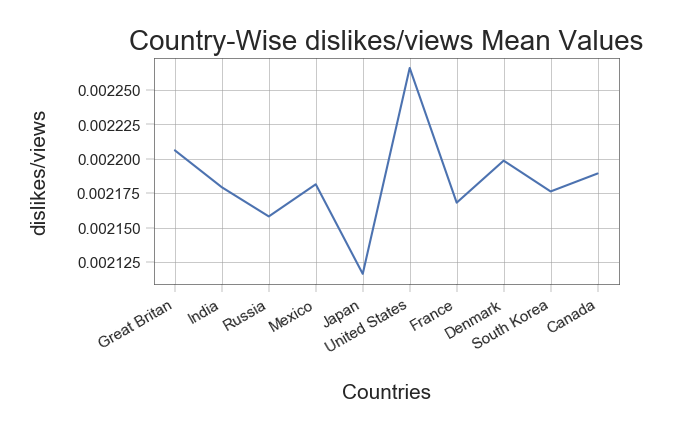

In [45]:
MeanCompare(views_dislikes,'dislikes/views')

### OBSERVATION
1. US , on average , has the highest ratio of dislikes/views.(>0.002250)
 - dislikes/views = 0.002250 means that on average, 0.002250 of the viewers dislike the video.
2. Japan ,on average, has the lowest ratio of dislikes/views.(<0.002125)

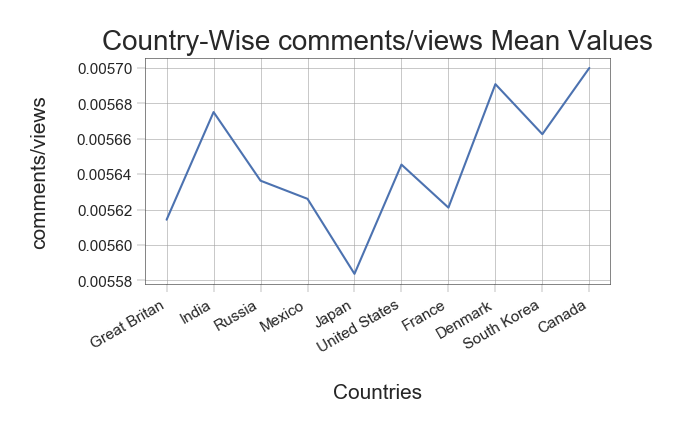

In [46]:
MeanCompare(views_comments,'comments/views')

### OBSERVATION
1. Canada , on average , has the highest ratio of comments/views.(0.00570)
 - comments/views = 0.00570 means that on average, 0.00570 of the viewers leave a comment on the video.
2. Japan ,on average, has the lowest ratio of comments/views.(<0.00560)

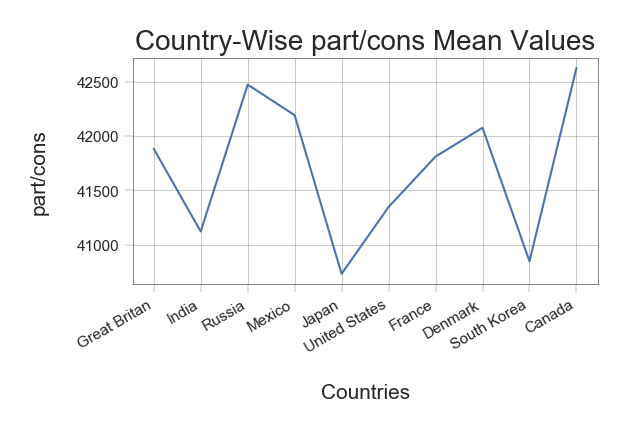

In [47]:
MeanCompare(cons_part,'part/cons')

### OBSERVATION
1. Canada , on average , has the highest ratio of user participation to user consumption.
2. Japan ,on average, has the lowest ratio of user participation to user consumption.

In [48]:
#goyal - 

# Video trends based on comment disabled/enabled.

In [49]:
data = pd.read_csv("YoutubeData.csv")
data['publish_date']=pd.to_datetime(data['publish_date'],format='%Y-%m-%d')
data['trending_date']=pd.to_datetime(data['trending_date'],format='%Y-%m-%d')
data['TimetoTrend'] =((data['trending_date'])-(data['publish_date'])).dt.days
data['log_views'] = np.log(data['views'])

In [50]:
ca = data[data['region']=="Canada"]
ind = data[data['region']=="India"]
gb = data[data['region']=="Great Britan"]
ger = data[data['region']=="Germany"]
mex = data[data['region']=="Mexico"]
us = data[data['region']=="United States"]
fr = data[data['region']=="France"]
jpn = data[data['region']=="Japan"]
kr = data[data['region']=="South Korea"]
ru = data[data['region']=="Russia"]
comments_disabled = data[data["comments_disabled"]==True]
comments_enabled = data[data["comments_disabled"]==False]


comments_disabled == True implies that no user can post comments on that video.
comments_disabled == False implies that users can post comments on that video.
Here, we analyse the number of videos for which comments have been disabled vs. the number of videos for which 
comments are enabled through a pie chart.


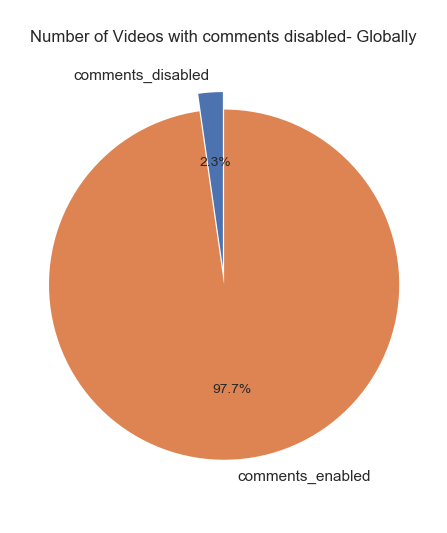

Analysis shows that 97.7% of videos have comments enabled.


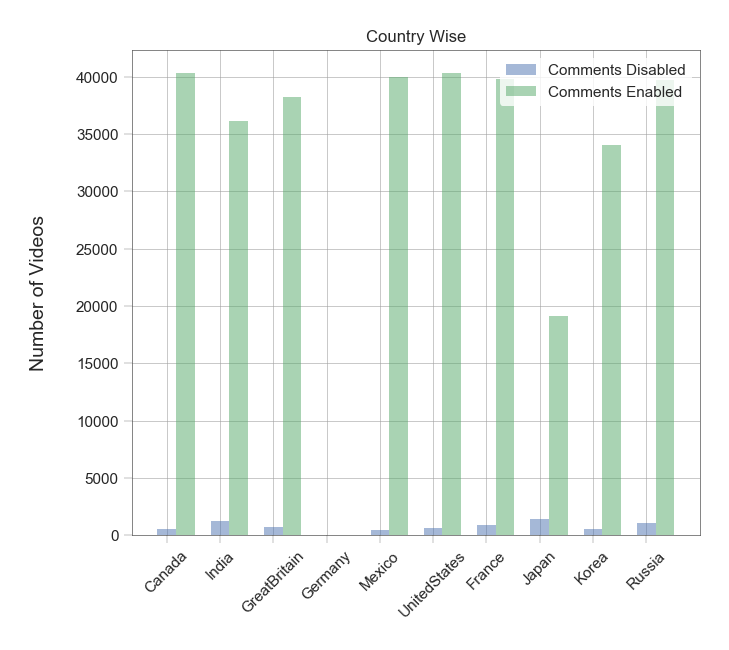

In [51]:
print("comments_disabled == True implies that no user can post comments on that video.\ncomments_disabled == False implies that users can post comments on that video.")
print("Here, we analyse the number of videos for which comments have been disabled vs. the number of videos for which \ncomments are enabled through a pie chart.")
labels = ['comments_disabled', 'comments_enabled']
size = [comments_disabled.shape[0], comments_enabled.shape[0]]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,6))
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of Videos with comments disabled- Globally')
plt.show()
print("Analysis shows that 97.7% of videos have comments enabled.")

m = ca[ca['comments_disabled'] == True].shape[0]
n = ind[ind['comments_disabled'] == True].shape[0]
o = gb[gb['comments_disabled'] == True].shape[0]
p = ger[ger['comments_disabled'] == True].shape[0]
q = mex[mex['comments_disabled'] == True].shape[0]
r = us[us['comments_disabled'] == True].shape[0]
s = fr[fr['comments_disabled'] == True].shape[0]
t = jpn[jpn['comments_disabled'] == True].shape[0]
u = kr[kr['comments_disabled'] == True].shape[0]
v = ru[ru['comments_disabled'] == True].shape[0]
db0 = (m,n,o,p,q,r,s,t,u,v)
m1 = ca[ca['comments_disabled'] == False]['views'].shape[0]
n1 = ind[ind['comments_disabled'] == False]['views'].shape[0]
o1 = gb[gb['comments_disabled'] == False]['views'].shape[0]
p1 = ger[ger['comments_disabled'] == False]['views'].shape[0]
q1 = mex[mex['comments_disabled'] == False]['views'].shape[0]
r1 = us[us['comments_disabled'] == False]['views'].shape[0]
s1 = fr[fr['comments_disabled'] == False]['views'].shape[0]
t1 = jpn[jpn['comments_disabled'] == False]['views'].shape[0]
u1 = kr[kr['comments_disabled'] == False]['views'].shape[0]
v1 = ru[ru['comments_disabled'] == False]['views'].shape[0]
db01 = (m1,n1,o1,p1,q1,r1,s1,t1,u1,v1)
fig, ax = plt.subplots(figsize=(7,6)) 
index = np.arange(10) 
bar_width = 0.35 
opacity = 0.5

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='b', label='Comments Disabled')
rects2 = plt.bar(index + bar_width, db01, bar_width, alpha=opacity, color='g', label='Comments Enabled')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Germany', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=45)
plt.ylabel('Number of Videos')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

Now we analyse how comments_disbled == True affects the number of views on a video.


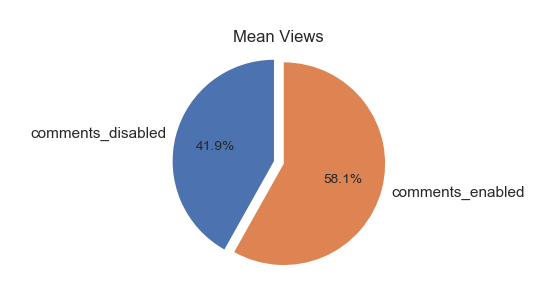

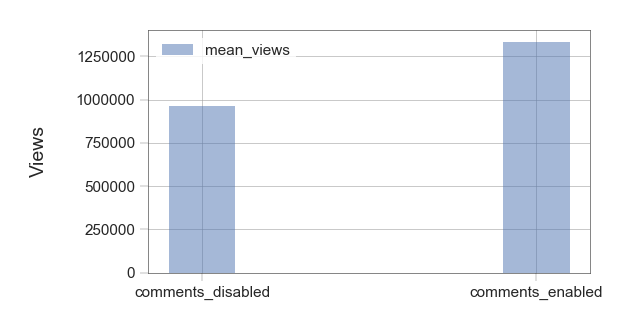

Correlation between whether comments are disbled or not and views

[[ 1.        -0.0078098]
 [-0.0078098  1.       ]]

There is a negative weak correlation between whether comments are disbaled or not and views which implies that there is an inverse relation between views and comments_disabled.


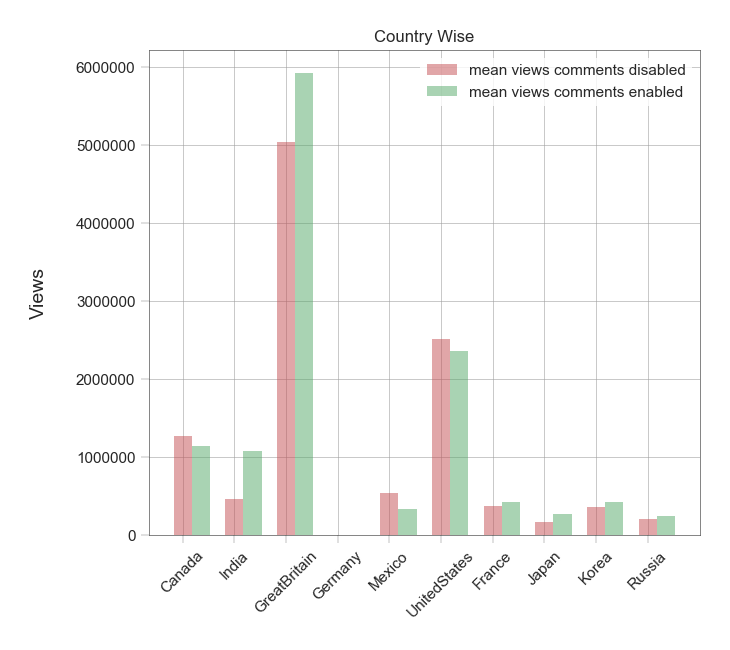


The Analysis reveals that videos with comments enbaled get more views.


In [52]:
print("Now we analyse how comments_disbled == True affects the number of views on a video.") 
mean_views_com_disabled = comments_disabled['views'].mean() 
mean_views_com_enabled = comments_enabled['views'].mean() 
labels1 = ['comments_disabled', 'comments_enabled'] 
size1 = [mean_views_com_disabled, mean_views_com_enabled] 
explode1 = (0.1, 0) 
fig1, ax1 = plt.subplots() 
ax1.pie(size1, explode=explode, labels=labels1, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Mean Views') 
plt.show()

db = (mean_views_com_disabled, mean_views_com_enabled)
fig, ax = plt.subplots() 
index = np.arange(2) 
bar_width = 0.20 
opacity = 0.5

rects1 = plt.bar(index, db, bar_width, alpha=opacity, color='b', label='mean_views')

plt.xticks(index, ('comments_disabled', 'comments_enabled'))
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.show()

print("Correlation between whether comments are disbled or not and views\n") 
ans1 =np.corrcoef(data['comments_disabled'], data['views']) 
print(ans1) 
print("\nThere is a negative weak correlation between whether comments are disbaled or not and views which implies that there is an inverse relation between views and comments_disabled.")

m = ca[ca['comments_disabled'] == True]['views'].mean()
n = ind[ind['comments_disabled'] == True]['views'].mean()
o = gb[gb['comments_disabled'] == True]['views'].mean()
p = ger[ger['comments_disabled'] == True]['views'].mean()
q = mex[mex['comments_disabled'] == True]['views'].mean()
r = us[us['comments_disabled'] == True]['views'].mean()
s = fr[fr['comments_disabled'] == True]['views'].mean()
t = jpn[jpn['comments_disabled'] == True]['views'].mean()
u = kr[kr['comments_disabled'] == True]['views'].mean()
v = ru[ru['comments_disabled'] == True]['views'].mean()
db0 = (m,n,o,p,q,r,s,t,u,v)
m1 = ca[ca['comments_disabled'] == False]['views'].mean()
n1 = ind[ind['comments_disabled'] == False]['views'].mean()
o1 = gb[gb['comments_disabled'] == False]['views'].mean()
p1 = ger[ger['comments_disabled'] == False]['views'].mean()
q1 = mex[mex['comments_disabled'] == False]['views'].mean()
r1 = us[us['comments_disabled'] == False]['views'].mean()
s1 = fr[fr['comments_disabled'] == False]['views'].mean()
t1 = jpn[jpn['comments_disabled'] == False]['views'].mean()
u1 = kr[kr['comments_disabled'] == False]['views'].mean()
v1 = ru[ru['comments_disabled'] == False]['views'].mean()
db01 = (m1,n1,o1,p1,q1,r1,s1,t1,u1,v1)
fig, ax = plt.subplots(figsize=(7,6)) 
index = np.arange(10) 
bar_width = 0.35 
opacity = 0.5

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='r', label='mean views comments disabled')
rects2 = plt.bar(index + bar_width, db01, bar_width, alpha=opacity, color='g', label='mean views comments enabled')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Germany', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=45)
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()
print("\nThe Analysis reveals that videos with comments enbaled get more views.")

ratings_disabled == True implies that no user can like or dislike that video.
ratings_disabled == False implies that users can like/dislike that video.
Here, we analyse the number of videos for which ratings have been disabled vs. the number of videos for which 
ratings are enabled through a pie chart.


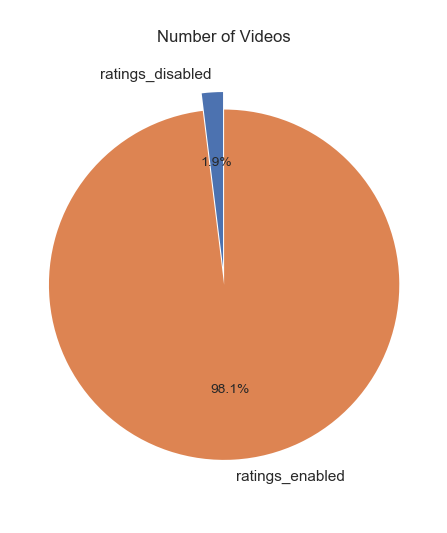

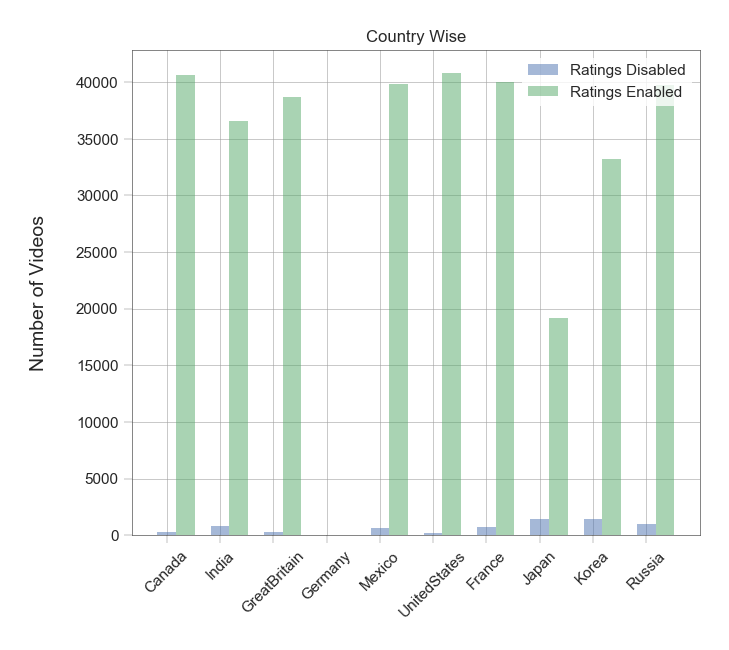

Analysis shows that 98.1% of videos have ratings enabled.


In [53]:
ratings_disabled = data[data['ratings_disabled']==True]
ratings_enabled = data[data['ratings_disabled']==False]
print("ratings_disabled == True implies that no user can like or dislike that video.\nratings_disabled == False implies that users can like/dislike that video.")
print("Here, we analyse the number of videos for which ratings have been disabled vs. the number of videos for which \nratings are enabled through a pie chart.")
labels = ['ratings_disabled', 'ratings_enabled']
size = [ratings_disabled.shape[0], ratings_enabled.shape[0]]
explode = (0.1, 0)
fig1, ax1 = plt.subplots(figsize=(5,6))
ax1.pie(size, explode=explode, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of Videos')
plt.show()
m = ca[ca['ratings_disabled'] == True].shape[0]
n = ind[ind['ratings_disabled'] == True].shape[0]
o = gb[gb['ratings_disabled'] == True].shape[0]
p = ger[ger['ratings_disabled'] == True].shape[0]
q = mex[mex['ratings_disabled'] == True].shape[0]
r = us[us['ratings_disabled'] == True].shape[0]
s = fr[fr['ratings_disabled'] == True].shape[0]
t = jpn[jpn['ratings_disabled'] == True].shape[0]
u = kr[kr['ratings_disabled'] == True].shape[0]
v = ru[ru['ratings_disabled'] == True].shape[0]
db0 = (m,n,o,p,q,r,s,t,u,v)
m1 = ca[ca['ratings_disabled'] == False]['views'].shape[0]
n1 = ind[ind['ratings_disabled'] == False]['views'].shape[0]
o1 = gb[gb['ratings_disabled'] == False]['views'].shape[0]
p1 = ger[ger['ratings_disabled'] == False]['views'].shape[0]
q1 = mex[mex['ratings_disabled'] == False]['views'].shape[0]
r1 = us[us['ratings_disabled'] == False]['views'].shape[0]
s1 = fr[fr['ratings_disabled'] == False]['views'].shape[0]
t1 = jpn[jpn['ratings_disabled'] == False]['views'].shape[0]
u1 = kr[kr['ratings_disabled'] == False]['views'].shape[0]
v1 = ru[ru['ratings_disabled'] == False]['views'].shape[0]
db01 = (m1,n1,o1,p1,q1,r1,s1,t1,u1,v1)
fig, ax = plt.subplots(figsize=(7,6)) 
index = np.arange(10) 
bar_width = 0.35 
opacity = 0.5

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='b', label='Ratings Disabled')
rects2 = plt.bar(index + bar_width, db01, bar_width, alpha=opacity, color='g', label='Ratings Enabled')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Germany', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=45)
plt.ylabel('Number of Videos')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()
print("Analysis shows that 98.1% of videos have ratings enabled.")

Now we analyse how ratings_disbled == True affects the number of views on a video.


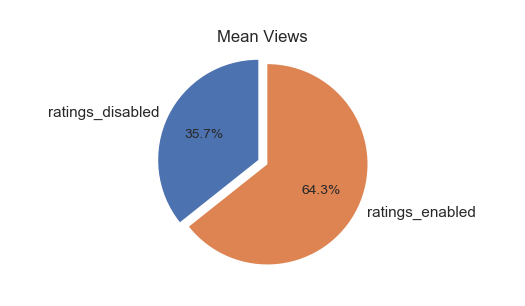

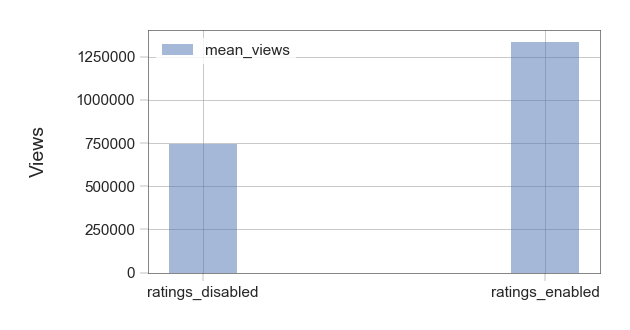

Correlation between whether ratings are disbled or not and views

[[ 1.         -0.01158539]
 [-0.01158539  1.        ]]

There is a negative weak correlation between whether ratings are disbaled or not and views which implies that there 
is an inverse relation between views and ratings_disabled.

However, relation between ratings_disabled and views is stronger that ratings_disabled and views which implies that 
ratings are more important for views than ratings


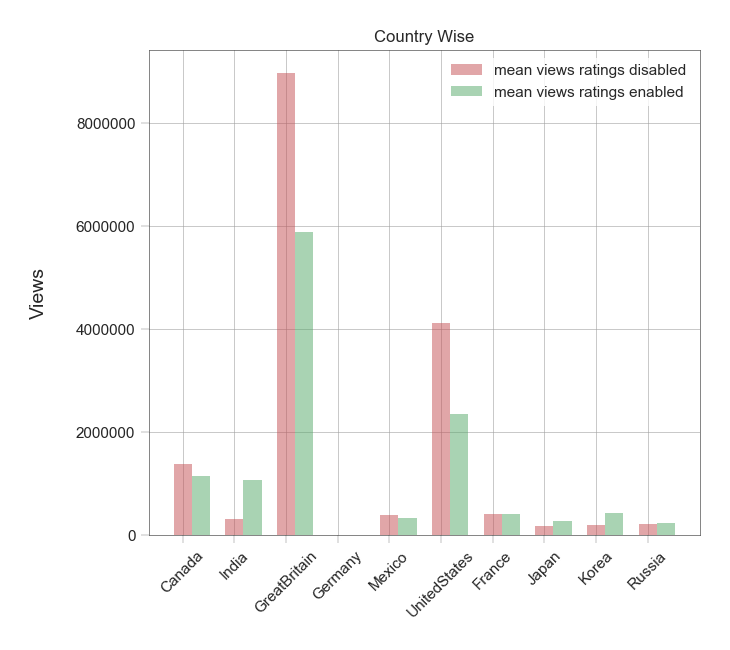


The Analysis reveals that videos with ratings enbaled get more views.


In [54]:
print("Now we analyse how ratings_disbled == True affects the number of views on a video.") 
mean_views_rat_disabled = ratings_disabled['views'].mean() 
mean_views_rat_enabled = ratings_enabled['views'].mean() 
labels1 = ['ratings_disabled', 'ratings_enabled'] 
size1 = [mean_views_rat_disabled, mean_views_rat_enabled] 
fig1, ax1 = plt.subplots() 
ax1.pie(size1, explode=explode, labels=labels1, autopct='%1.1f%%', startangle=90) 
ax1.axis('equal') 
plt.title('Mean Views') 
plt.show()

db = (mean_views_rat_disabled, mean_views_rat_enabled)
fig, ax = plt.subplots() 
index = np.arange(2) 
bar_width = 0.20 
opacity = 0.5

rects1 = plt.bar(index, db, bar_width, alpha=opacity, color='b', label='mean_views')

plt.xticks(index, ('ratings_disabled', 'ratings_enabled'))
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.show()

print("Correlation between whether ratings are disbled or not and views\n") 
ans1 =np.corrcoef(data['ratings_disabled'], data['views']) 
print(ans1) 
print("\nThere is a negative weak correlation between whether ratings are disbaled or not and views which implies that there \nis an inverse relation between views and ratings_disabled.")
print("\nHowever, relation between ratings_disabled and views is stronger that ratings_disabled and views which implies that \nratings are more important for views than ratings")
m = ca[ca['ratings_disabled'] == True]['views'].mean()
n = ind[ind['ratings_disabled'] == True]['views'].mean()
o = gb[gb['ratings_disabled'] == True]['views'].mean()
p = ger[ger['ratings_disabled'] == True]['views'].mean()
q = mex[mex['ratings_disabled'] == True]['views'].mean()
r = us[us['ratings_disabled'] == True]['views'].mean()
s = fr[fr['ratings_disabled'] == True]['views'].mean()
t = jpn[jpn['ratings_disabled'] == True]['views'].mean()
u = kr[kr['ratings_disabled'] == True]['views'].mean()
v = ru[ru['ratings_disabled'] == True]['views'].mean()
db0 = (m,n,o,p,q,r,s,t,u,v)
m1 = ca[ca['ratings_disabled'] == False]['views'].mean()
n1 = ind[ind['ratings_disabled'] == False]['views'].mean()
o1 = gb[gb['ratings_disabled'] == False]['views'].mean()
p1 = ger[ger['ratings_disabled'] == False]['views'].mean()
q1 = mex[mex['ratings_disabled'] == False]['views'].mean()
r1 = us[us['ratings_disabled'] == False]['views'].mean()
s1 = fr[fr['ratings_disabled'] == False]['views'].mean()
t1 = jpn[jpn['ratings_disabled'] == False]['views'].mean()
u1 = kr[kr['ratings_disabled'] == False]['views'].mean()
v1 = ru[ru['ratings_disabled'] == False]['views'].mean()
db01 = (m1,n1,o1,p1,q1,r1,s1,t1,u1,v1)
fig, ax = plt.subplots(figsize=(7,6)) 
index = np.arange(10) 
bar_width = 0.35 
opacity = 0.5

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='r', label='mean views ratings disabled')
rects2 = plt.bar(index + bar_width, db01, bar_width, alpha=opacity, color='g', label='mean views ratings enabled')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Germany', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=45)
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()
print("\nThe Analysis reveals that videos with ratings enbaled get more views.")

There are 4 possible cases: 
1. Both ratings and comments are disabled. 
2. Ratings are disabled and Comments are enabled. 
3. Ratings are enabled and Comments are disabled. 
4. Both Ratings and Comments are enabled.


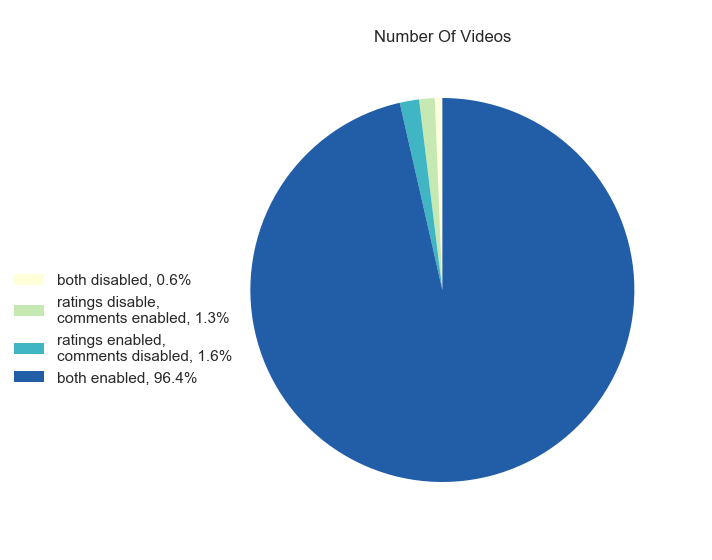

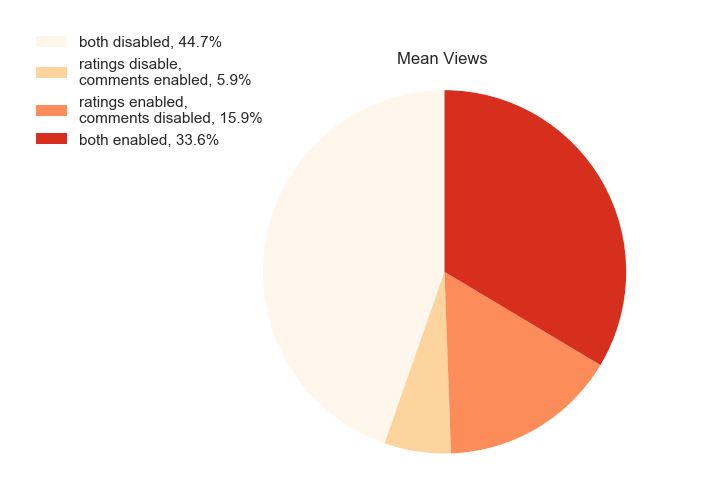

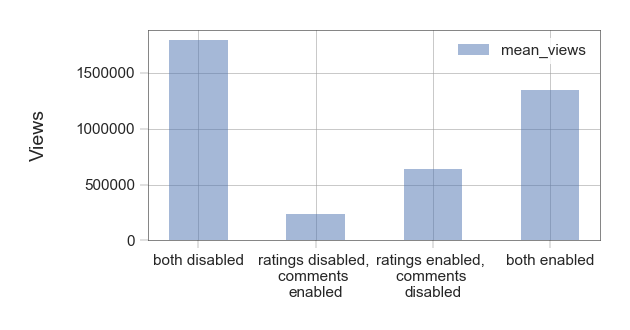

In [55]:
print("There are 4 possible cases: \n1. Both ratings and comments are disabled. \n2. Ratings are disabled and Comments are enabled. \n3. Ratings are enabled and Comments are disabled. \n4. Both Ratings and Comments are enabled.")
#both disabled
d1 = comments_disabled[comments_disabled['ratings_disabled'] == True]
d1_mean_views = d1['views'].mean()
#ratings disabled, comments enabled
d2 = comments_enabled[comments_enabled['ratings_disabled'] == True]
d2_mean_views = d2['views'].mean()
#ratings enabled, comments disabled
d3 = comments_disabled[comments_disabled['ratings_disabled'] == False]
d3_mean_views = d3['views'].mean()
#both enabled
d4 = comments_enabled[comments_enabled['ratings_disabled'] == False]
d4_mean_views = d4['views'].mean()

labels2 = ['both disabled', 'ratings disable, \ncomments enabled', 'ratings enabled, \ncomments disabled', 'both enabled']
size22 = [d1.shape[0], d2.shape[0], d3.shape[0], d4.shape[0]]
size2 = [d1_mean_views, d2_mean_views, d3_mean_views, d4_mean_views] 
explode2 = (0.02, 0.02, 0.02, 0.02) 

fig2, ax2 = plt.subplots(figsize=(6, 5))
fig2.subplots_adjust(0.3,0.1,1.1,1.09)


theme = plt.get_cmap('YlGnBu')
ax2.set_prop_cycle("color", [theme(1. * i / len(size22)) for i in range(len(size22))])

_, _ = ax2.pie(size22, startangle=90)

ax1.axis('equal')

total = sum(size22)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels2, size22)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Number Of Videos')
plt.show()

fig1, ax1 = plt.subplots(figsize=(6,5)) 
fig1.subplots_adjust(0.3,0.1,1.1,0.9)
theme2 = plt.get_cmap('OrRd')
ax1.set_prop_cycle("color", [theme2(1. * i / len(size2)) for i in range(len(size2))])

_, _ = ax1.pie(size2, startangle=90)

ax1.axis('equal') 
total2 = sum(size2)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total2) * 100) for l, s in zip(labels2, size2)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

plt.title('Mean Views') 
plt.show()

fig, ax = plt.subplots() 
index = np.arange(4) 
bar_width = 0.50 
opacity = 0.5

rects1 = plt.bar(index, size2, bar_width, alpha=opacity, color='b', label='mean_views')

plt.xticks(index, ('both disabled', 'ratings disabled, \ncomments \nenabled', 'ratings enabled, \ncomments \ndisabled', 'both enabled'))
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.show()

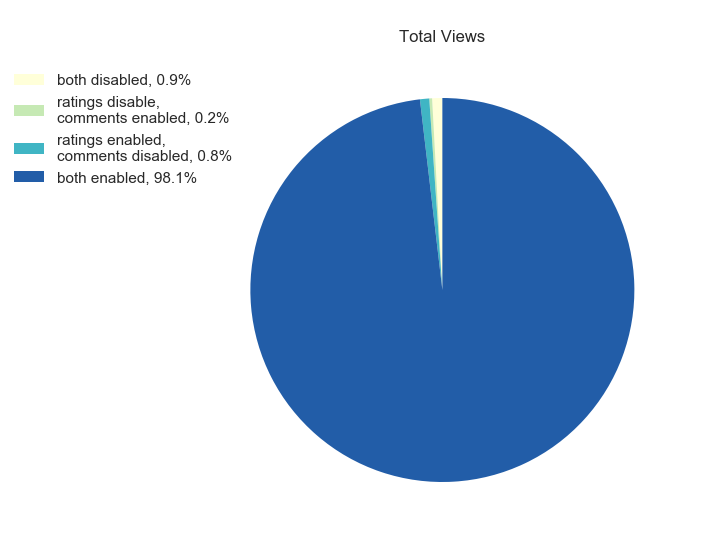

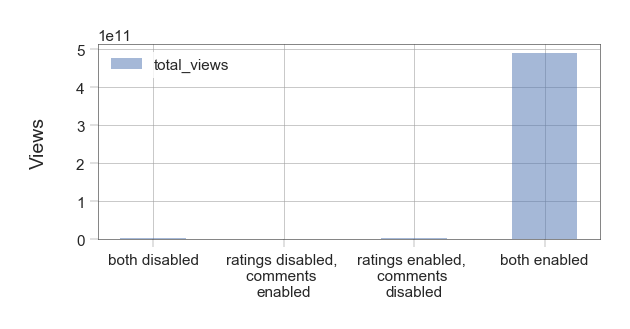

Ratio of total number of views on videos with both comments and ratings disabled to total number of views on videos 
with both ratings and comments enabled =  0.008683448502212093
This implies that, 
number of views on videos with both comments and ratings disabled < number of views on videos with both comments and ratings enabled


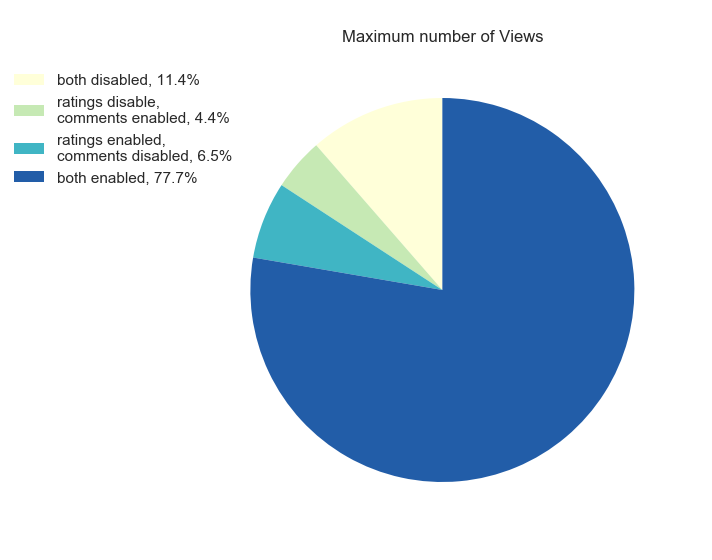

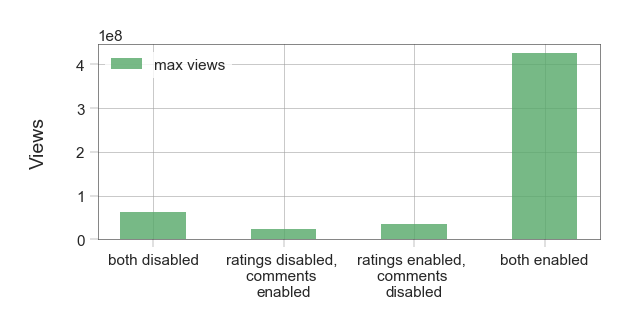

Ratio of max number of views on videos with both comments and ratings disabled to max number of views on videos 
with both ratings and comments enabled =  0.1468378050584913
This implies that, 
max number of views on videos with both comments and ratings disabled < max number of views on videos with 
both comments and ratings enabled.


In [56]:
d1_sum = d1['views'].sum()
d2_sum = d2['views'].sum() 
d3_sum = d3['views'].sum()
d4_sum = d4['views'].sum()
size222 = [d1_sum, d2_sum, d3_sum, d4_sum]

fig2, ax2 = plt.subplots(figsize=(6, 5))
fig2.subplots_adjust(0.3,0.1,1.1,1.09)
ax2.set_prop_cycle("color", [theme(1. * i / len(size222)) for i in range(len(size222))])

_, _ = ax2.pie(size222, startangle=90)

ax1.axis('equal')

total = sum(size222)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels2, size222)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Total Views')
plt.show()
fig, ax = plt.subplots() 

index = np.arange(4) 
bar_width = 0.50 
opacity = 0.5
rects1 = plt.bar(index, size222, bar_width, alpha=opacity, color='b', label='total_views')

plt.xticks(index, ('both disabled', 'ratings disabled, \ncomments \nenabled', 'ratings enabled, \ncomments \ndisabled', 'both enabled'))
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.show()
print("Ratio of total number of views on videos with both comments and ratings disabled to total number of views on videos \nwith both ratings and comments enabled = ", d1_sum/d4_sum)
print("This implies that, \nnumber of views on videos with both comments and ratings disabled < number of views on videos with both comments and ratings enabled")

size2222 = [d1['views'].max(), d2['views'].max(), d3['views'].max(), d4['views'].max()]
fig2, ax2 = plt.subplots(figsize=(6, 5))
fig2.subplots_adjust(0.3,0.1,1.1,1.09)
ax2.set_prop_cycle("color", [theme(1. * i / len(size2222)) for i in range(len(size2222))])

_, _ = ax2.pie(size2222, startangle=90)

ax1.axis('equal')

total = sum(size2222)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total) * 100) for l, s in zip(labels2, size2222)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)
plt.title('Maximum number of Views')
plt.show()
rects1 = plt.bar(index, size2222, bar_width, alpha=0.8, color='g', label='max views')

plt.xticks(index, ('both disabled', 'ratings disabled, \ncomments \nenabled', 'ratings enabled, \ncomments \ndisabled', 'both enabled'))
plt.ylabel('Views')
plt.legend()
plt.tight_layout() 
plt.show()
print("Ratio of max number of views on videos with both comments and ratings disabled to max number of views on videos \nwith both ratings and comments enabled = ", d1['views'].max()/d4['views'].max())
print("This implies that, \nmax number of views on videos with both comments and ratings disabled < max number of views on videos with \nboth comments and ratings enabled.")


In [57]:
print("Analysis reveals that the hypothesis that user participation garners more views holds true")

Analysis reveals that the hypothesis that user participation garners more views holds true


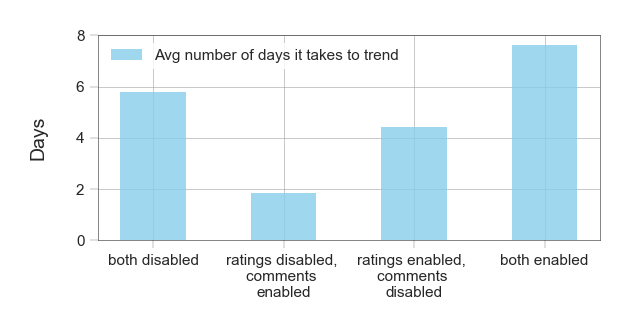

In [58]:
from datetime import date 
import seaborn as seabornInstance

tt_both =d1['TimetoTrend'].mean()
tt_rat_com =d2['TimetoTrend'].mean()
tt_com_rat =d3['TimetoTrend'].mean()
tt_both_en =d4['TimetoTrend'].mean()

pp = (tt_both, tt_rat_com, tt_com_rat, tt_both_en)
rects1 = plt.bar(index, pp, bar_width, alpha=0.8, color='skyblue', label='Avg number of days it takes to trend')

plt.xticks(index, ('both disabled', 'ratings disabled, \ncomments \nenabled', 'ratings enabled, \ncomments \ndisabled', 'both enabled'))
plt.ylabel('Days')
plt.legend()
plt.tight_layout() 
plt.show()


# Analysis of videos based on titles

In [59]:
import warnings
from collections import Counter
import datetime
import json
import pandas as pd

In [60]:
df = pd.read_csv("YoutubeData.csv")

In [61]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

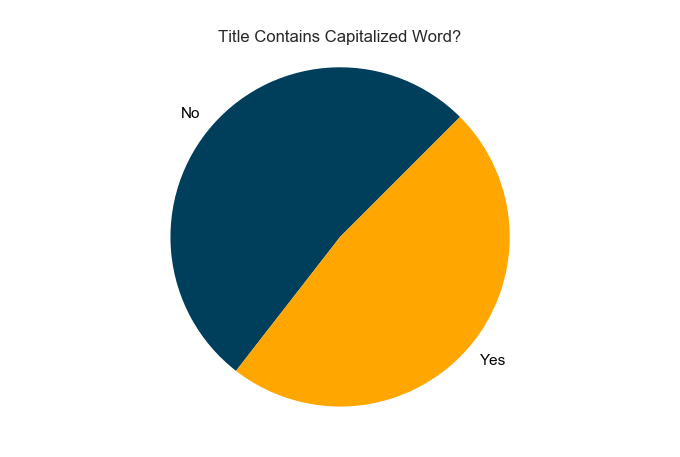

In [62]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
_ = ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], 
           colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
_ = ax.axis('equal')
_ = ax.set_title('Title Contains Capitalized Word?')

In [63]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.52
True    0.48
Name: contains_capitalized, dtype: float64

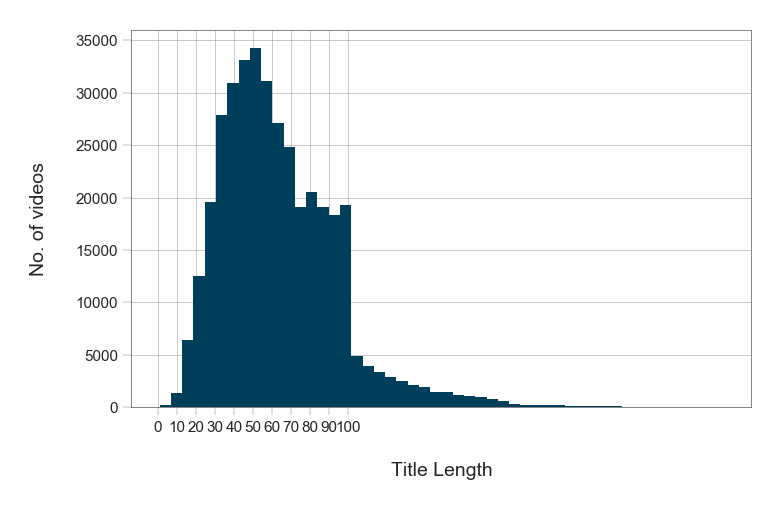

In [64]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
_ = sns.distplot(df["title_length"], kde=False, rug=False, 
                 color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="Title Length", ylabel="No. of videos", xticks=range(0, 110, 10))

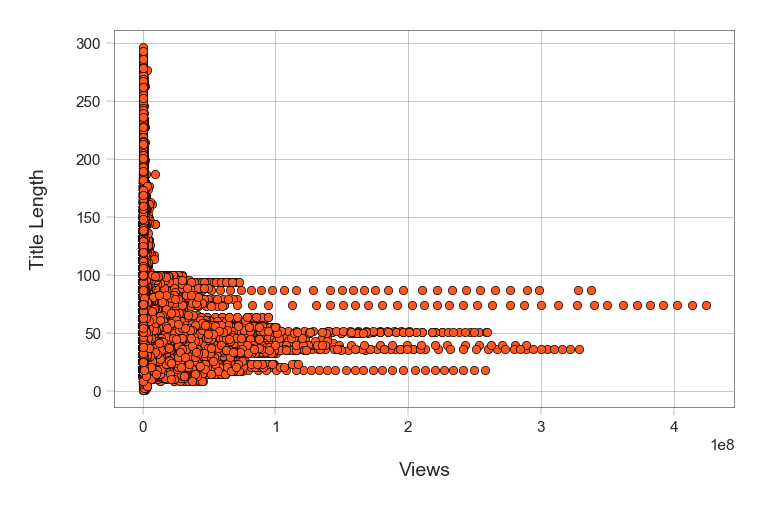

In [65]:
fig, ax = plt.subplots()
_ = ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
_ = ax.set(xlabel="Views", ylabel="Title Length")

In [66]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(20)

[('-', 114594),
 ('|', 110541),
 ('2018', 27992),
 ('The', 22449),
 ('de', 20671),
 ('&', 15091),
 ('a', 10835),
 ('/', 10805),
 ('the', 10802),
 ('Episode', 10244),
 ('in', 9396),
 ('A', 9178),
 ('of', 8553),
 ('Video)', 8540),
 ('2017', 8327),
 ('2', 8078),
 ('to', 7844),
 ('Trailer', 7552),
 ('(Official', 7543),
 ('\x8bã', 7518)]

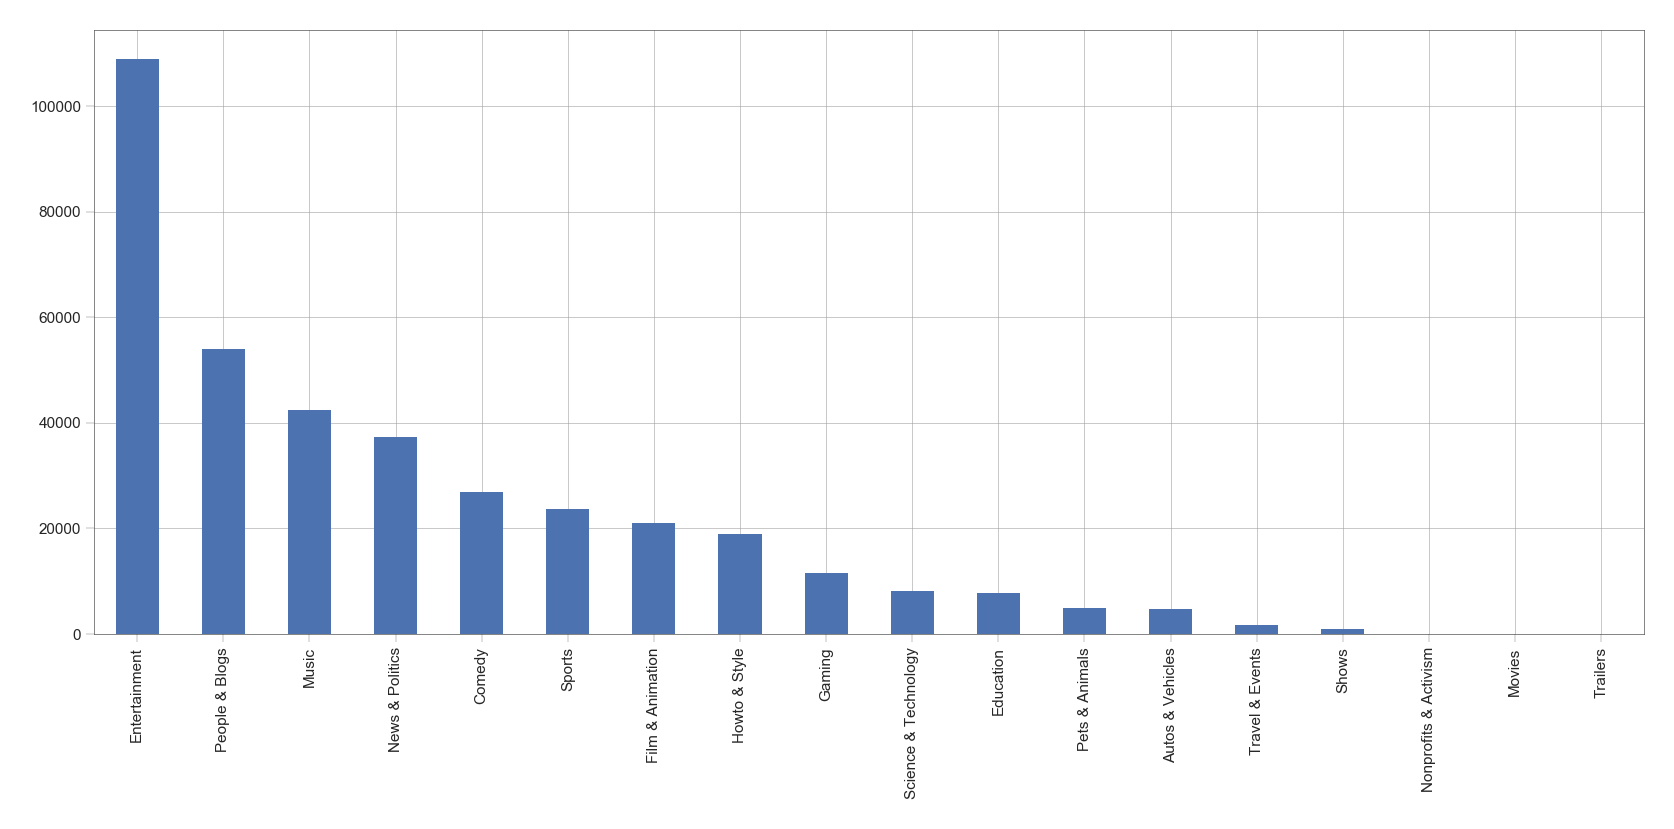

In [67]:
channel_category = df['category_name'].value_counts()
channel_category
channel_category.plot(kind = 'bar', figsize = (20,8))

In [68]:
entertainment_df = df.loc[df['category_name'] == 'Entertainment']
entertainment_df

video_id trending_date  \
2       UOgNUOKYXiA    2018-05-13   
14           #NAME?    2018-06-01   
15      8F7C_ZoWDeQ    2018-04-03   
21      Ab4dvhYl3d4    2018-05-01   
23      OT5oOdLhBBo    2018-06-01   
...             ...           ...   
375930  pzazgzLtuc8    2018-02-06   
375932  u2bnmn_yuAw    2017-11-30   
375933  k5wc9V7ggVg    2018-04-07   
375935  Ay_RF_YrYeM    2017-12-14   
375940  XkVwqEdYlNA    2017-12-14   

                                                    title  \
2       Durga | Full Ep 1068 | 11th May 2018 | Odia Se...   
14      Nenjam Marappathillai | 31st May to 1st June 2...   
15      Sin tu mirada | Lucrecia explotÃ³ contra Isaur...   
21      Berlin - Tag & Nacht - Chaos in der Kinderwuns...   
23      Alemanes Exploran la CDMX (De Verdad es como c...   
...                                                   ...   
375930  ì¤ë§í¸í°ì ì³ë¬¼ì ë¶ì¼ë©´ ê·¸ëë¡ ...   
375932  வாணி ராணி - VAANI RANI -  Episode 1430 - 29/11...   
375933  Adam Ruins Everything - The Misleading Story o...   
375935  ÐÑÑÑÐµ Ð»Ð°Ð¹ÑÑ
Ð°ÐºÐ¸. Ð¡Ð°Ð¼ÑÐµ Ð±ÐµÑ...   
375940  The Last Jedi Cast Touches Bearded Dragons & O...   

                   channel_title publish_date  category_id publish_time  \
2                      Tarang TV   2018-05-12           24     06:00:01   
14              Vijay Television   2018-05-31           24     04:54:52   
15         Franco-Leymas Oficial   2018-04-02           24     23:51:43   
21          Berlin - Tag & Nacht   2018-04-30           24     18:00:01   
23                    WeroWeroTV   2018-05-31           24     23:04:05   
...                          ...          ...          ...          ...   
375930  Dr. Fire ë¥í°íì´ì´   2018-02-03           24     02:53:19   
375932               RadaanMedia   2017-11-29           24     16:30:01   
375933                     truTV   2018-04-02           24     16:59:58   
375935               Max Maximov   2017-12-13           24     16:55:48   
375940               Vanity Fair   2017-12-13           24     17:01:43   

                                                     tags   views  likes  ...  \
2       tarang|"tarang tv"|"tarang tv online"|"tarang ...   87291    340  ...   
14      Star|"Star Vijay TV"|"Vijay TV"|"Vijay"|"Redef...  532711   1287  ...   
15      Sin tu mirada|"SIn tu mirada Lucrecia"|"Sin tu...   52128    197  ...   
21      berlin - tag & nacht|"berlin tag und nacht"|"b...  127009   5438  ...   
23      cdmx|"alemanes"|"alemanes exploran"|"exploran"...   23602   2481  ...   
...                                                   ...     ...    ...  ...   
375930  ì¤ë§í¸í°|"í¸ëí°"|"ê°¤ë­ì"|"ì¼ì±"|...  571968   5660  ...   
375932  Vaani rani|"rani"|"Radhika in funny character"...  291132   1384  ...   
375933  “truTv|"Shows”"|"”truTV"|"New"|"Series”"|"epis...  693408  10857  ...   
375935  Ð»Ð°Ð¹ÑÑ
Ð°ÐºÐ¸|"ÑÐ¼ÐµÑÐ½ÑÐµ Ð»Ð°Ð¹ÑÑ
Ð°Ð...   61775   3849  ...   
375940  star wars|"john boyega"|"gwendoline christie"|...  299914  15112  ...   

        comment_count                                  thumbnail_link  \
2                  31  https://i.ytimg.com/vi/UOgNUOKYXiA/default.jpg   
14                134  https://i.ytimg.com/vi/-S3T5EArIbU/default.jpg   
15                 10  https://i.ytimg.com/vi/8F7C_ZoWDeQ/default.jpg   
21                456  https://i.ytimg.com/vi/Ab4dvhYl3d4/default.jpg   
23                593  https://i.ytimg.com/vi/OT5oOdLhBBo/default.jpg   
...               ...                                             ...   
375930           1598  https://i.ytimg.com/vi/pzazgzLtuc8/default.jpg   
375932            149  https://i.ytimg.com/vi/u2bnmn_yuAw/default.jpg   
375933           2183  https://i.ytimg.com/vi/k5wc9V7ggVg/default.jpg   
375935            321  https://i.ytimg.com/vi/Ay_RF_YrYeM/default.jpg   
375940           1119  https://i.ytimg.com/vi/XkVwqEdYlNA/default.jpg   

       comments_disabled  ratings_disabled  video_error_or_removed  \
2           

In [69]:
df.corr()

category_id  views  likes  dislikes  comment_count  \
category_id                    1.00  -0.13  -0.15     -0.03          -0.07   
views                         -0.13   1.00   0.78      0.42           0.51   
likes                         -0.15   0.78   1.00      0.45           0.79   
dislikes                      -0.03   0.42   0.45      1.00           0.71   
comment_count                 -0.07   0.51   0.79      0.71           1.00   
comments_disabled              0.03  -0.01  -0.03     -0.01          -0.03   
ratings_disabled               0.02  -0.01  -0.03     -0.01          -0.02   
video_error_or_removed        -0.03   0.01   0.01      0.01           0.00   
contains_capitalized          -0.00  -0.03  -0.00     -0.01           0.01   
title_length                   0.07  -0.08  -0.13     -0.04          -0.09   

                        comments_disabled  ratings_disabled  \
category_id                          0.03              0.02   
views                               -0.01             -0.01   
likes                               -0.03             -0.03   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.29   
ratings_disabled                     0.29              1.00   
video_error_or_removed              -0.00             -0.00   
contains_capitalized                -0.04             -0.03   
title_length                         0.02              0.06   

                        video_error_or_removed  contains_capitalized  \
category_id                              -0.03                 -0.00   
views                                     0.01                 -0.03   
likes                                     0.01                 -0.00   
dislikes                                  0.01                 -0.01   
comment_count                             0.00                  0.01   
comments_disabled                        -0.00                 -0.04   
ratings_disabled                         -0.00                 -0.03   
video_error_or_removed                    1.00                 -0.01   
contains_capitalized                     -0.01                  1.00   
title_length                             -0.02                  0.08   

                        title_length  
category_id                     0.07  
views                          -0.08  
likes                          -0.13  
dislikes                       -0.04  
comment_count                  -0.09  
comments_disabled               0.02  
ratings_disabled                0.06  
video_error_or_removed         -0.02  
contains_capitalized            0.08  
title_length                    1.00

In [70]:
peopleblogs_df = df.loc[df['category_name'] == 'People & Blogs']
peopleblogs_df

video_id trending_date  \
6       TbjwGvdRIpQ    2017-12-25   
8       CN5FfG4buIk    2018-04-04   
10      6RyOsIseJbk    2017-11-17   
18      soJvon28BIc    2018-03-10   
19      BrlpU99lGzI    2018-04-28   
...             ...           ...   
375934  WVyvjF7Lr3s    2018-05-10   
375937  65Cd7v_v5o0    2017-12-28   
375938  oYz9h6r586c    2018-02-06   
375939  b8V_5KGyLr0    2018-06-05   
375941  qn5QAS7XQlU    2018-05-21   

                                                    title  \
6       ÐÐÐ ÐÐ«Ð¢Ð¬ Ð¡Ð¢ÐÐÐ¬ÐÐÐ ÐÐÐÐÐ Ð...   
8                                                  è±è¦   
10                                             Reading #3   
18      LIVE 2018.03.09 ãç¬ãã³ã³ã ãå°å®®æµ...   
19          Hank Azaria: 'The Right Thing To Do' With Apu   
...                                                   ...   
375934  Infinity War Cast Goes Crazy with Thanos' Glov...   
375937                          [ TR ] Pi Pa Po Bing Bäng   
375938  ì£¼ì§ì° ê¸°ì ë°ê·¼í ì¤ì²´ ìê³  ì ë§...   
375939  நாயகி புரொமோ இன்று 04/06/18 | Naayagi Promo fo...   
375941  18ë
5ì20ì¼ íì¶êµ¬ê° ìë ëë£¨í¹ê³...   

                             channel_title publish_date  category_id  \
6                            Ellena Galant   2017-12-25           22   
8                       ãã¿ãããµã   2018-04-03           22   
10                           John Conforti   2017-11-05           22   
18                            Sanhiro ANN0   2018-03-09           22   
19      The Late Show with Stephen Colbert   2018-04-25           22   
...                                    ...          ...          ...   
375934                        Opaque's Mvs   2018-05-02           22   
375937                      Der Ritter #DR   2017-12-24           22   
375938                    ë¯¼ì£¼ì£¼ì 3.0   2018-02-04           22   
375939                    Deivamagal Today   2018-06-04           22   
375941                         tvëë¼ì    2018-05-20           22   

       publish_time                                               tags  \
6          04:00:00  ÐºÐ°Ðº ÑÑÐ¸Ð»ÑÐ½Ð¾ Ð¾Ð´ÐµÐ²Ð°ÑÑÑÑ Ð·Ð¸Ð...   
8          09:00:00  ãã¿ãã|"ãã¿ãããã¼ã"|"ãã³ï¼...   
10         20:43:48  Rick Astley|"Never Gonna Give You Up"|"funny w...   
18         20:32:43                        å°å®®æµ©ä¿¡|"ç¸ç°å¨äº"   
19         07:35:00  The Late Show|"Late Show"|"Stephen Colbert"|"S...   
...             ...                                                ...   
375934     20:31:23  Avengers|"Avengers Infinity War"|"Infinity War...   
375937     21:55:57                                             [none]   
375938     11:00:02  ì£¼ì§ì°|"ê¸°ì"|"ë°ê·¼í"|"ì´ëª
ë°"|"50...   
375939     15:32:41  naayagi|"vikatan new serial"|"naayagi new seri...   
375941     10:58:14                                             [none]   

         views  likes  ...  comment_count  \
6         5896    733  ...             59   
8         8160    585  ...             91   
10      435355   4994  ...            196   
18        2824      0  ...              0   
19      713670   5428  ...           3933   
...        ...    ...  ...            ...   
375934  149575   6631  ...            322   
375937    4104    121  ...              1   
375938  122878    943  ...              0   
375939   51497    144  ...             12   
375941   49743   2727  ...            290   

                                           thumbnail_link comments_disabled  \
6          https://i.ytimg.com/vi/TbjwGvdRIpQ/default.jpg             False   
8          https://i.ytimg.com/vi/CN5FfG4buIk/default.jpg             False   
10         https://i.ytimg.com/vi/6RyOsIseJbk/default.jpg             False   
18         https://i.ytimg.com/vi/soJvon28BIc/default.jpg             False   
19         https://i.ytimg.com/vi/BrlpU99lGzI/default.jpg             False   
...                                                   ...       

In [71]:
music_df = df.loc[df['category_name'] == 'Music']
music_df

video_id trending_date  \
7       ItL6vcUrpUs    2017-12-22   
9       Ph54wQG8ynk    2018-03-16   
12      tCXGJQYZ9JA    2018-03-14   
24      Ia2WpQVP8lI    2017-11-14   
30      J_CFBjAyPWE    2018-01-30   
...             ...           ...   
375868  LsoLEjrDogU    2018-01-05   
375872  TfGEiN3qFyY    2017-12-17   
375881  cH4E_t3m3xM    2017-11-19   
375919  PUvVjWR3zTQ    2017-12-20   
375925  IIyZuKN2j7U    2018-01-29   

                                                    title  \
7       MACKLEMORE FEAT DAVE B & TRAVIS THOMPSON - COR...   
9                      Camila Cabello - Never Be the Same   
12                                Taylor Swift - Delicate   
24      DJ Hamida feat. Orchestre Tiiwtiiw - Les Maroc...   
30                           Red Velvet 레드벨벳 'Bad Boy' MV   
...                                                   ...   
375868  Bruno Mars - Finesse (Remix) [Feat. Cardi B] [...   
375872  Bryant Myers x De La Ghetto x Darell x Almight...   
375881                  Selena Gomez, Marshmello - Wolves   
375919    Sufjan Stevens - Tonya Harding (Official Audio)   
375925  Cardi B Talks Grammy Nomination, JAY-Z, Engage...   

                  channel_title publish_date  category_id publish_time  \
7                Macklemore LLC   2017-12-21           10     17:00:20   
9             CamilaCabelloVEVO   2018-03-08           10     14:00:01   
12              TaylorSwiftVEVO   2018-03-12           10     01:15:10   
24             DJHAMIDAOFFICIEL   2017-11-11           10     20:37:40   
30                       SMTOWN   2018-01-29           10     09:00:02   
...                         ...          ...          ...          ...   
375868               Bruno Mars   2018-01-04           10     04:49:43   
375872             Bryant Myers   2017-12-15           10     16:17:49   
375881          SelenaGomezVEVO   2017-11-18           10     16:00:02   
375919  Asthmatic Kitty Records   2017-12-06           10     11:58:45   
375925                Billboard   2018-01-28           10     05:26:55   

                                                     tags     views    likes  \
7       Mackelmore|"Thrift Shop"|"Cant Hold Us"|"Can't...    408491    34582   
9       camila cabello|"camila"|"camila full album"|"h...  14937243   683251   
12      Taylor Swift|"Delicate"|"Big"|"Machine"|"Recor...  24262331  1249399   
24      DJ hamida"|"TiiwTiiw"|"maroc"|"lion de l'atlas...    457870    18399   
30      Red Velvet|"레드벨벳"|"Bad Boy"|"The Perfect Red V...   7385982   749347   
...                                                   ...       ...      ...   
375868  Bruno Mars|"Finesse"|"Cardi B"|"Finesse Remix"...  12882641   925695   
375872  bryant Myers|"Bryant"|"Meyers"|"Bryant Meyers"...   1356989    86626   
375881  Selena|"Gomez"|"Marshmello"|"Wolves"|"Intersco...   2959054   415046   
375919            tonya harding|"sufjan stevens"|"sufjan"    514389     7161   
375925  Billboard|"billboard channel"|"official"|"bill...    301710     7115   

        ...  comment_count                                  thumbnail_link  \
7       ...           1911  https://i.ytimg.com/vi/ItL6vcUrpUs/default.jpg   
9       ...          47859  https://i.ytimg.com/vi/Ph54wQG8ynk/default.jpg   
12      ...         121243  https://i.ytimg.com/vi/tCXGJQYZ9JA/default.jpg   
24      ...            790  https://i.ytimg.com/vi/Ia2WpQVP8lI/default.jpg   
30      ...          93264  https://i.ytimg.com/vi/J_CFBjAyPWE/default.jpg   
...     ...            ...                                             ...   
375868  ...          70909  https://i.ytimg.com/vi/LsoLEjrDogU/default.jpg   
375872  ...           7323  https://i.ytimg.com/vi/TfGEiN3qFyY/default.jpg   
375881  ...          30393  https://i.ytimg.com/vi/cH4E_t3m3xM/default.jpg   
375919  ...            619  https://i.ytimg.com/vi/PUvVjWR3zTQ/default.jpg   
375925  ...           2351  https://i.ytimg.com/vi/IIyZuKN2j7U/default.jpg   

       comments_disabled  ratings_disabled  vi

# Analysis of videos based on categories

In [72]:
data=pd.read_csv('YoutubeData.csv')

In [73]:
data = data[data['category_name'].notna()]

In [74]:
unique_regions=pd.unique(data['region'])

In [75]:
unique_categories=pd.unique(data['category_name'])

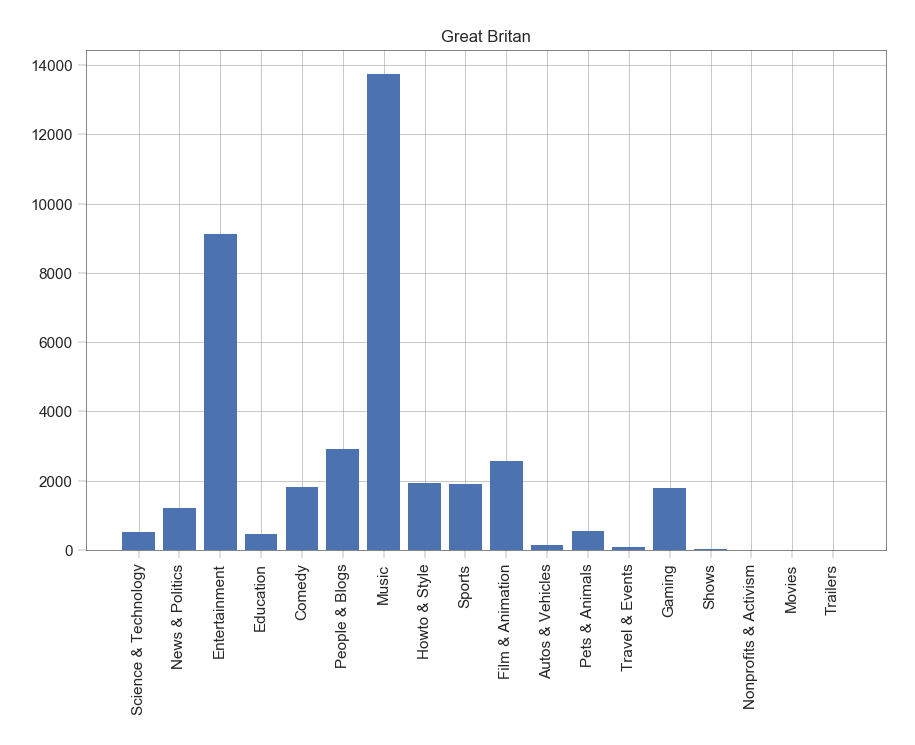

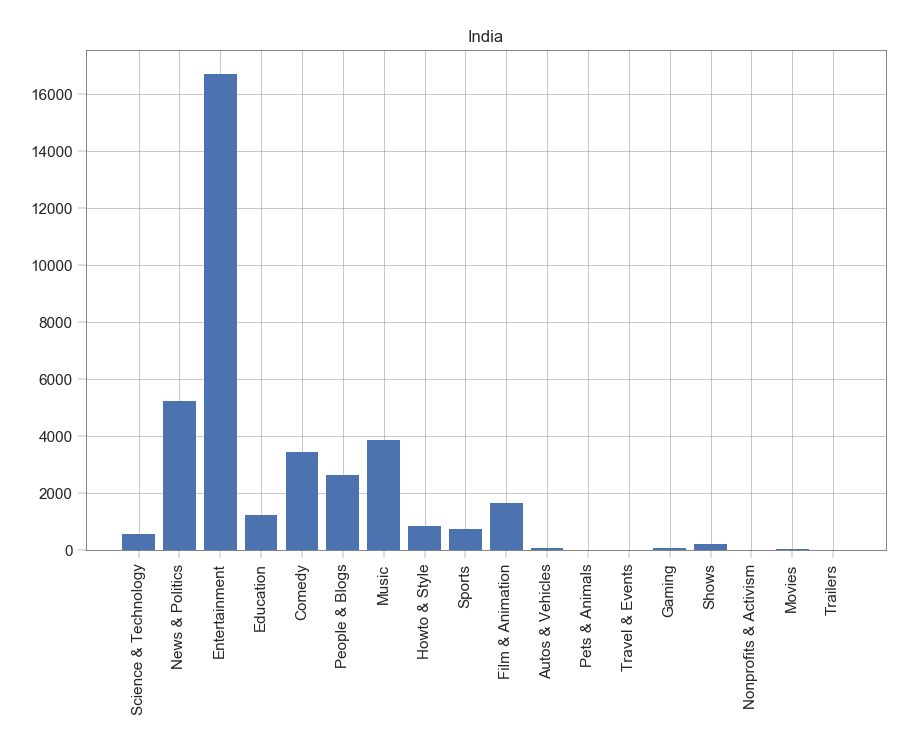

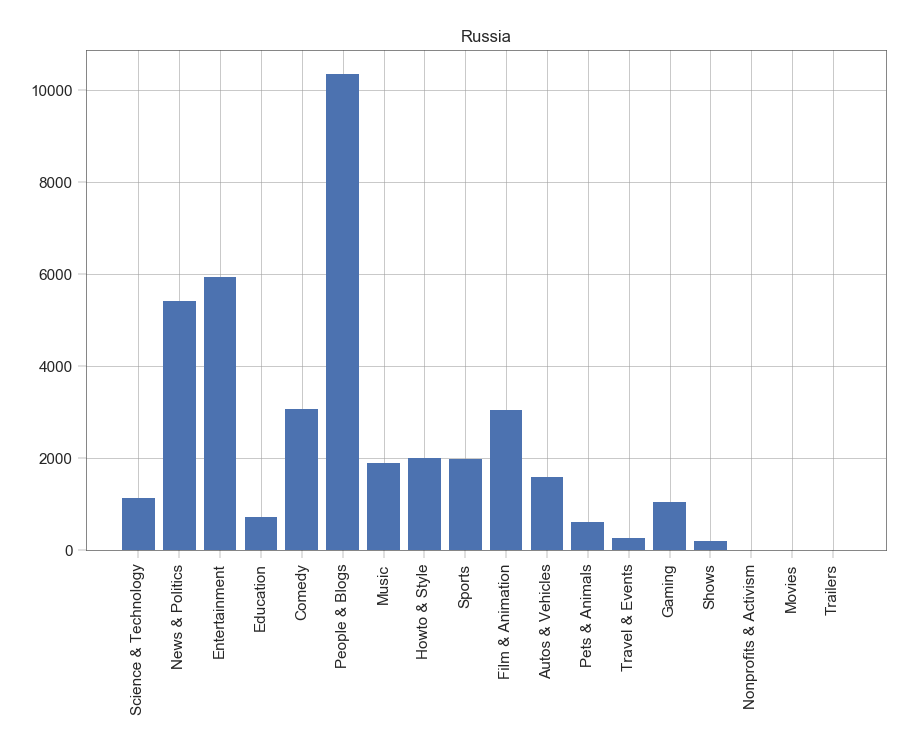

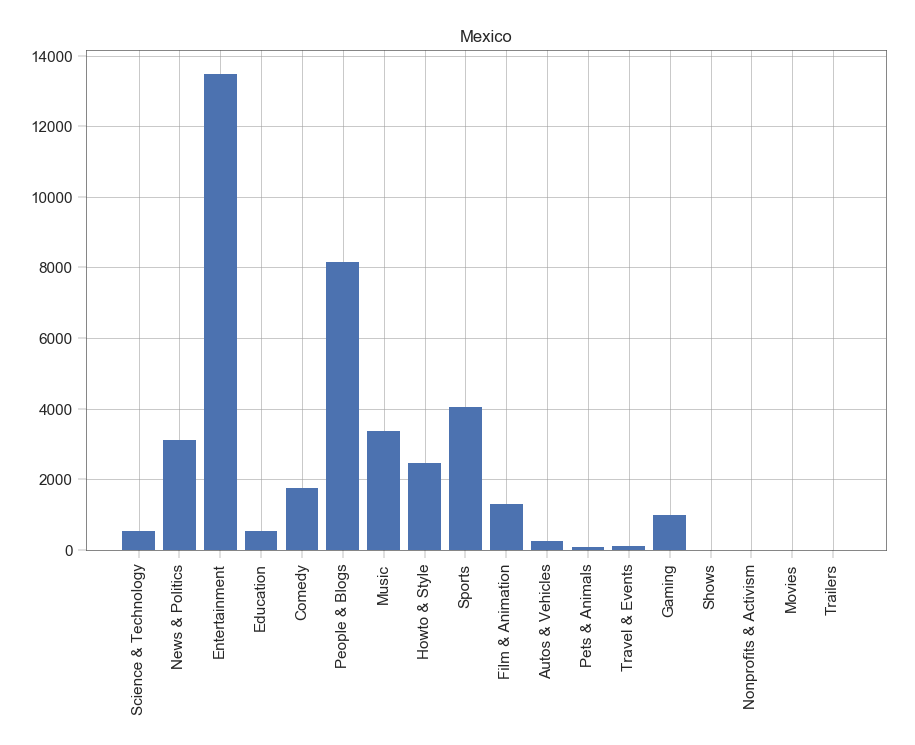

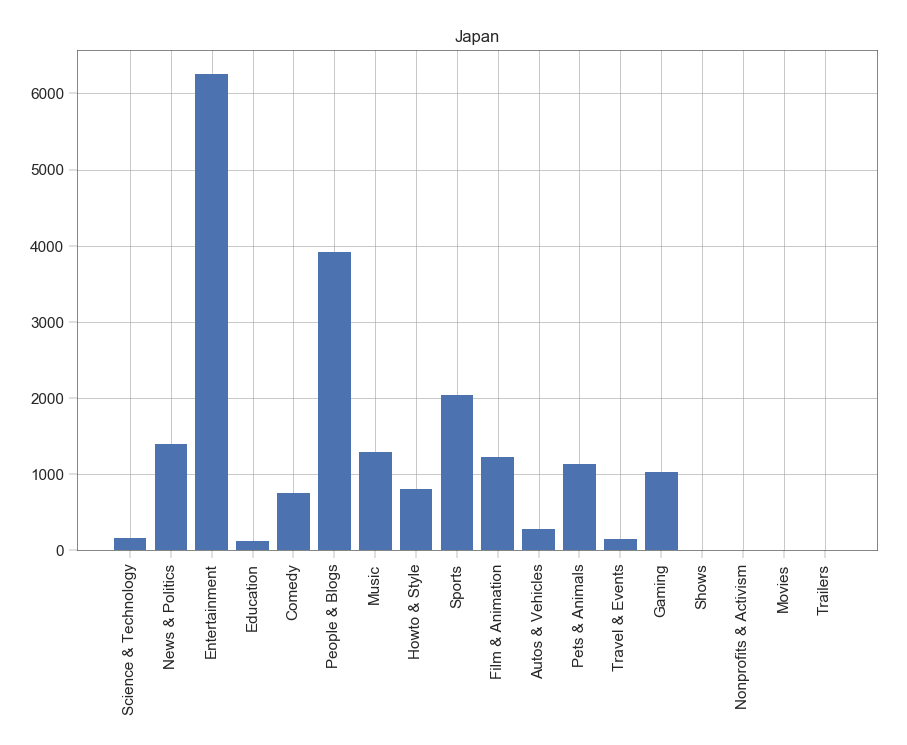

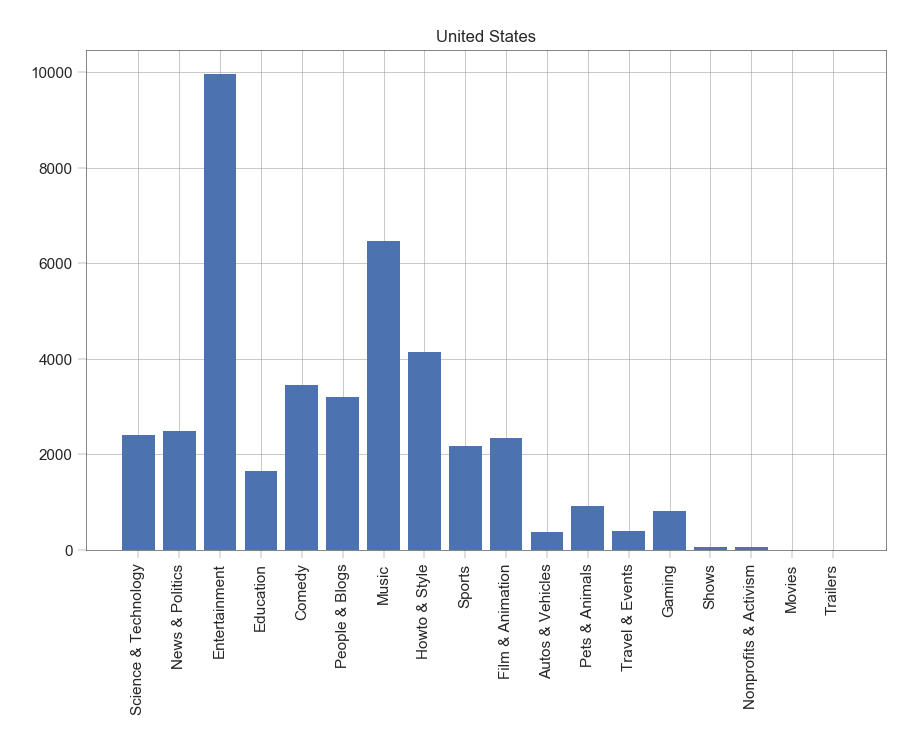

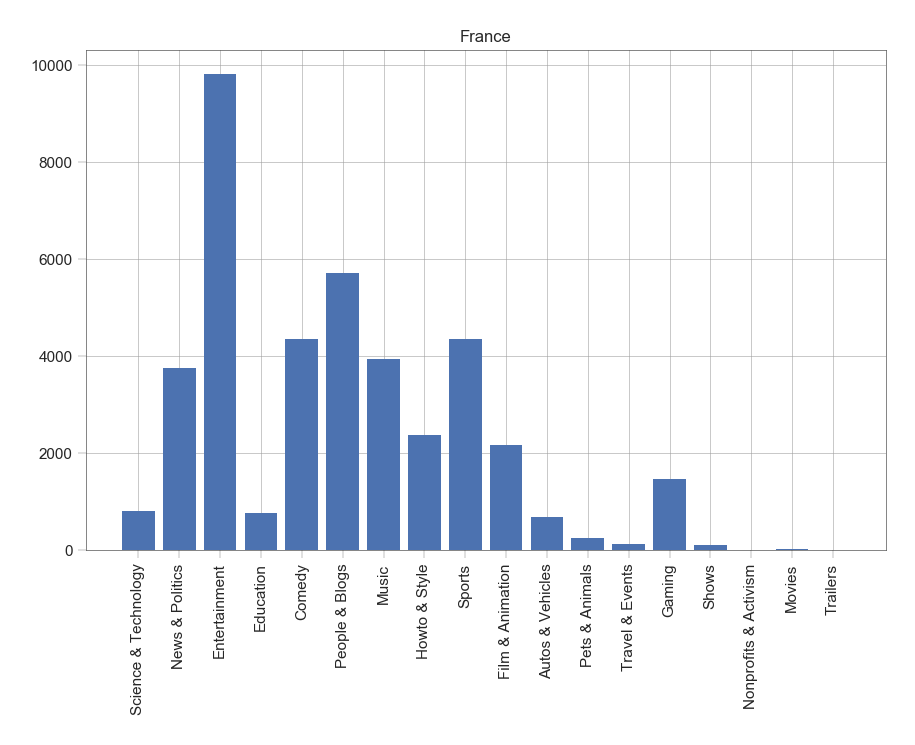

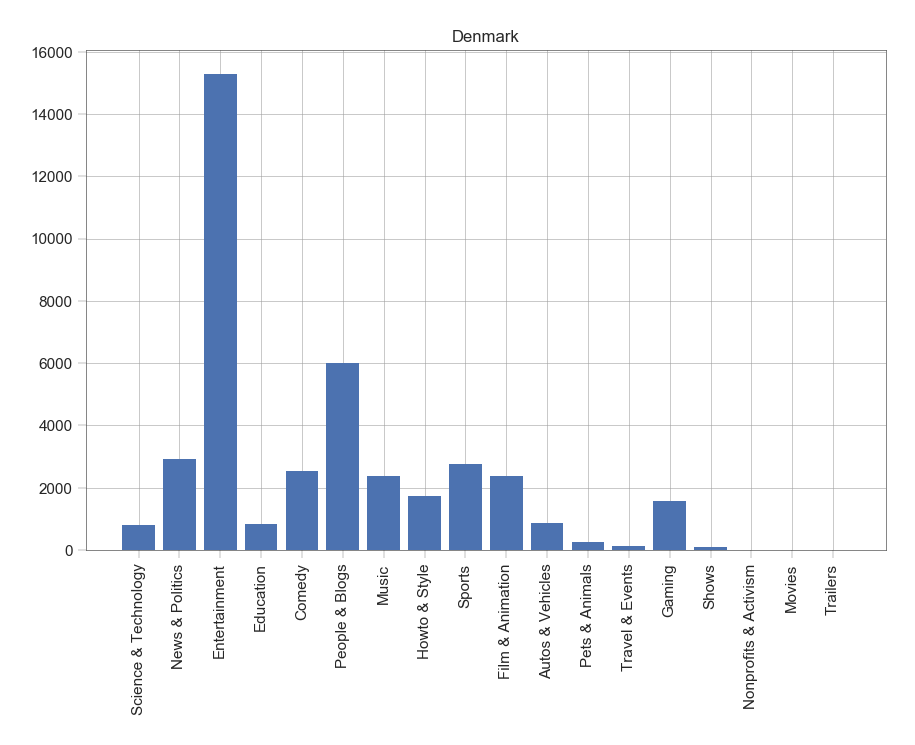

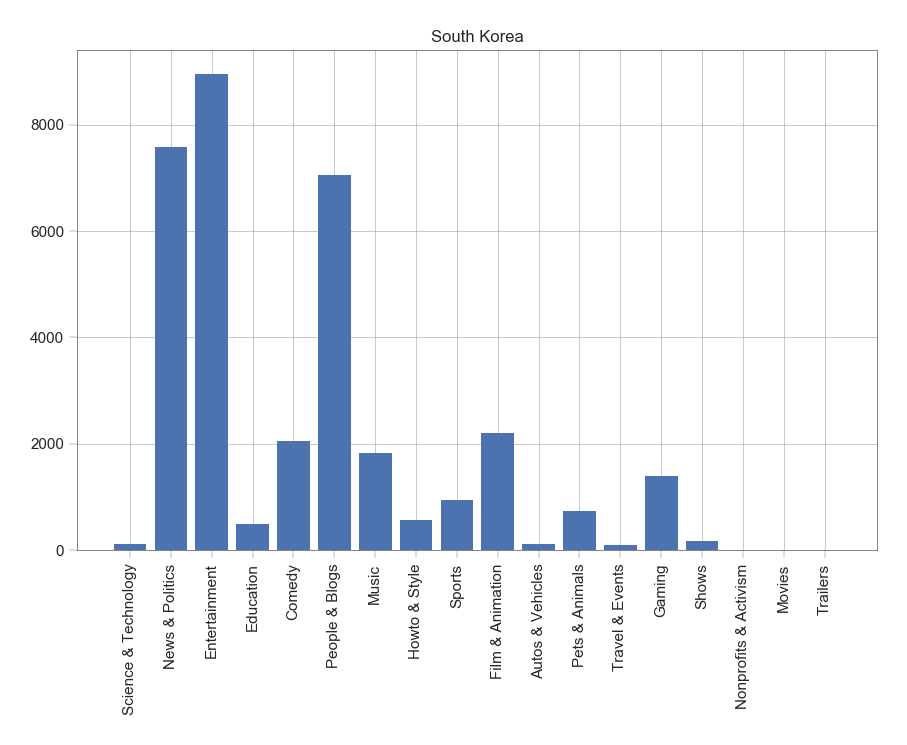

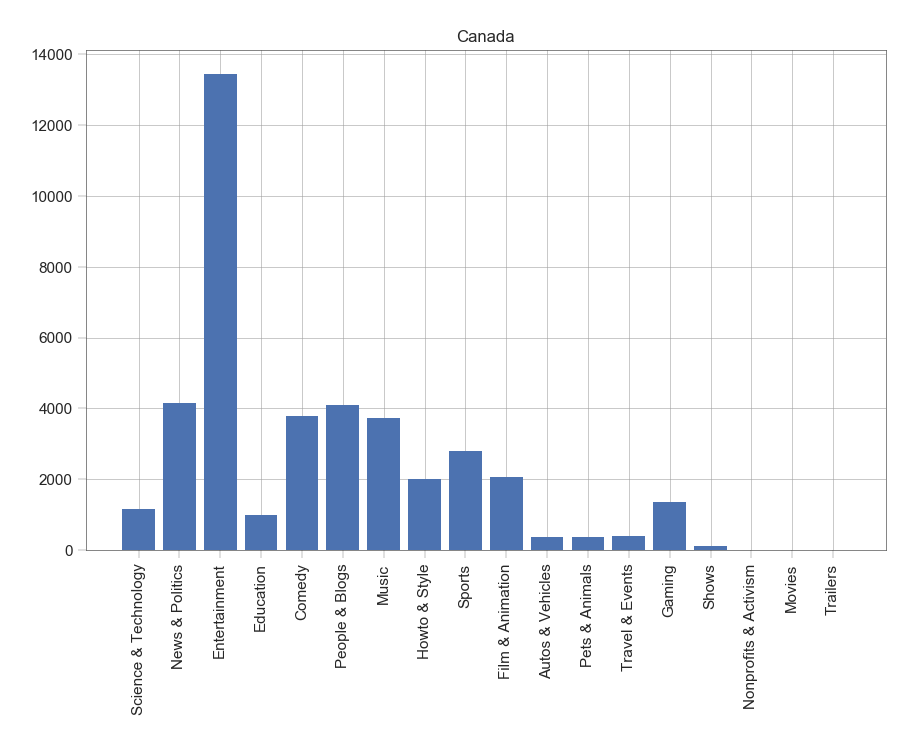

In [76]:
labels = unique_categories
#size=[]
for x in unique_regions:
    size=[]
    for y in unique_categories:
        rslt_df = data[data['region'] == x]
        rslt_df=rslt_df[rslt_df['category_name']==y]
        size.append(rslt_df.shape[0])
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.title(x)
    plt.xticks(rotation=90)
    ax.bar(unique_categories,size)
    plt.show()

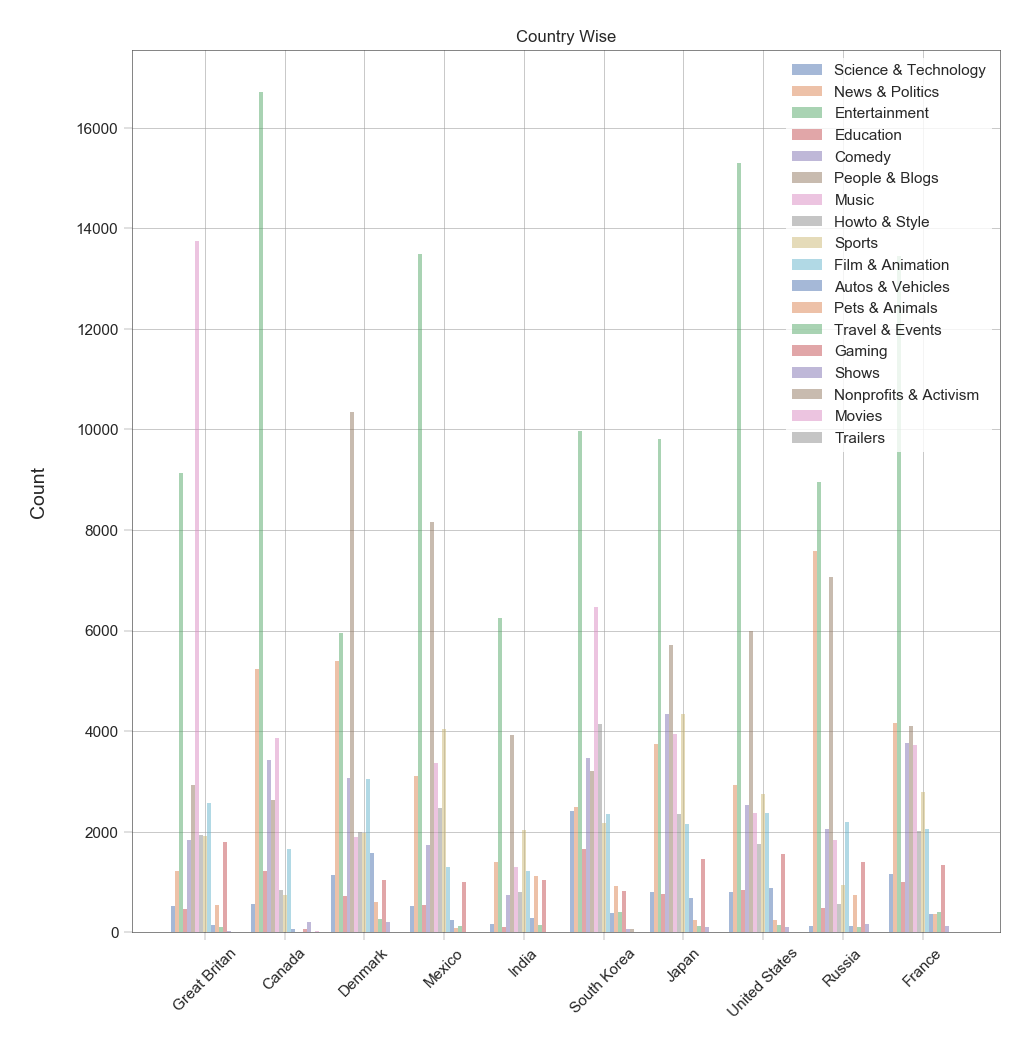

In [77]:
listt=[]
for y in unique_categories:
    temp=[]
    for x in unique_regions:
        rslt_df = data[data['region'] == x]
        rslt_df=rslt_df[rslt_df['category_name']==y]
        temp.append(rslt_df.shape[0])
    listt.append(temp)

fig, ax = plt.subplots(figsize=(10,10)) 
index = np.arange(10) 
bar_width = 0.05 
opacity = 0.5

i=0
reacts=[0]*18
for y in unique_categories:
    reacts[i]=plt.bar(index,listt[i],bar_width,alpha=opacity,label=y)
    index=index+bar_width
    i=i+1




plt.xticks(index-0.5, ('Great Britan', 'Canada', 'Denmark', 'Mexico', 'India' ,'South Korea', 'Japan',
 'United States' ,'Russia', 'France'), rotation=45)
plt.ylabel('Count')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

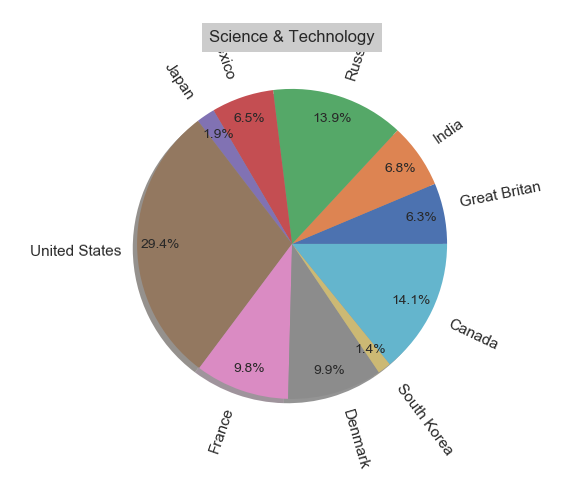

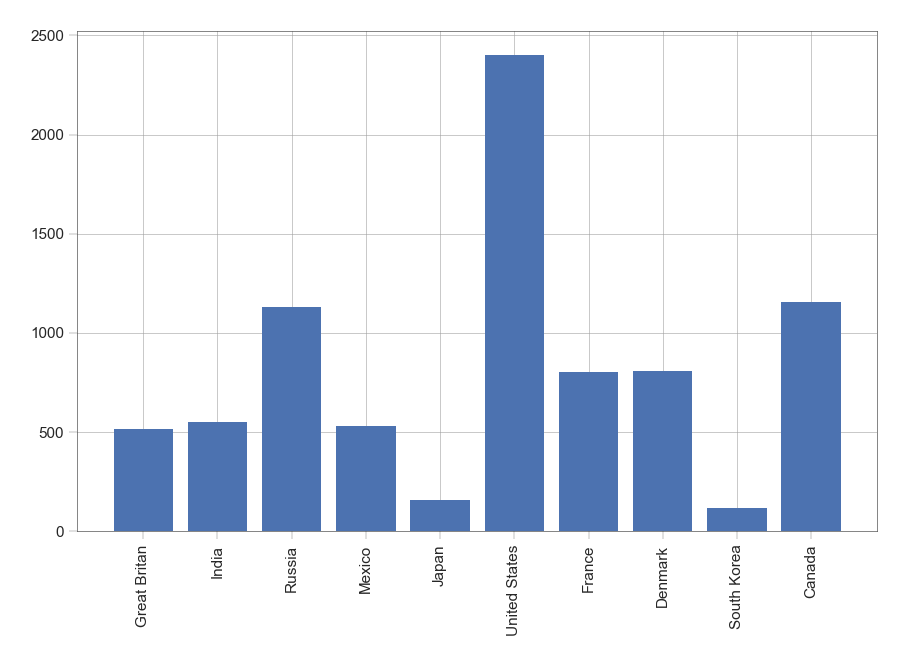

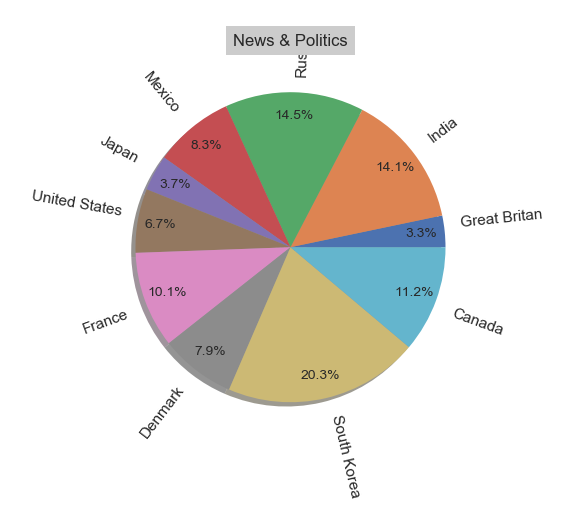

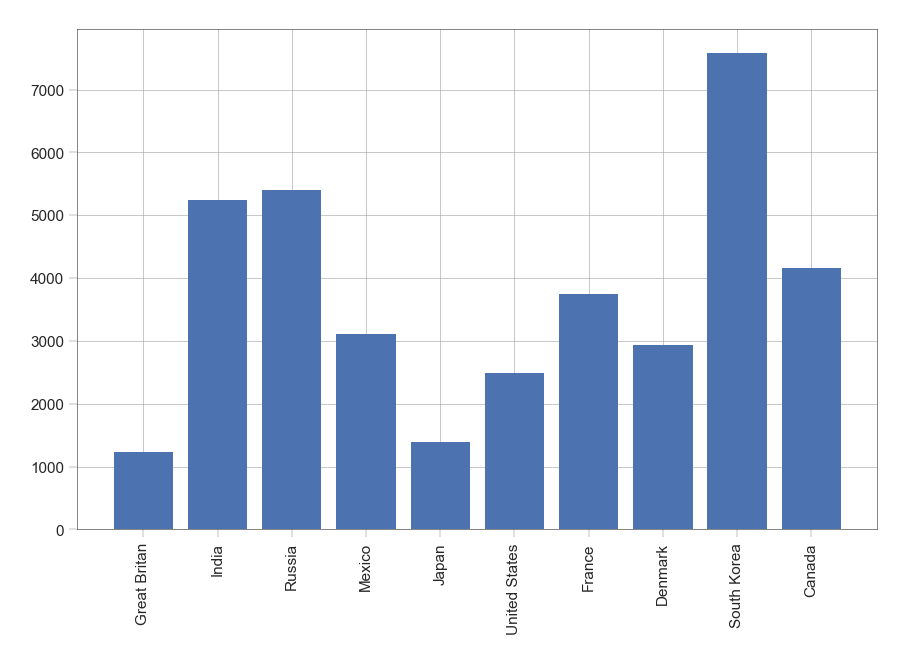

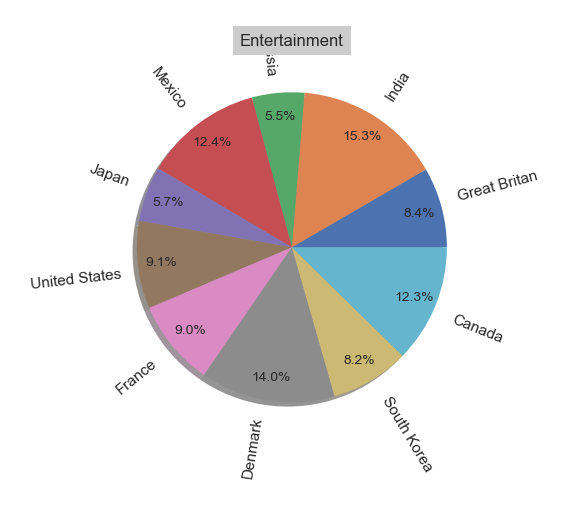

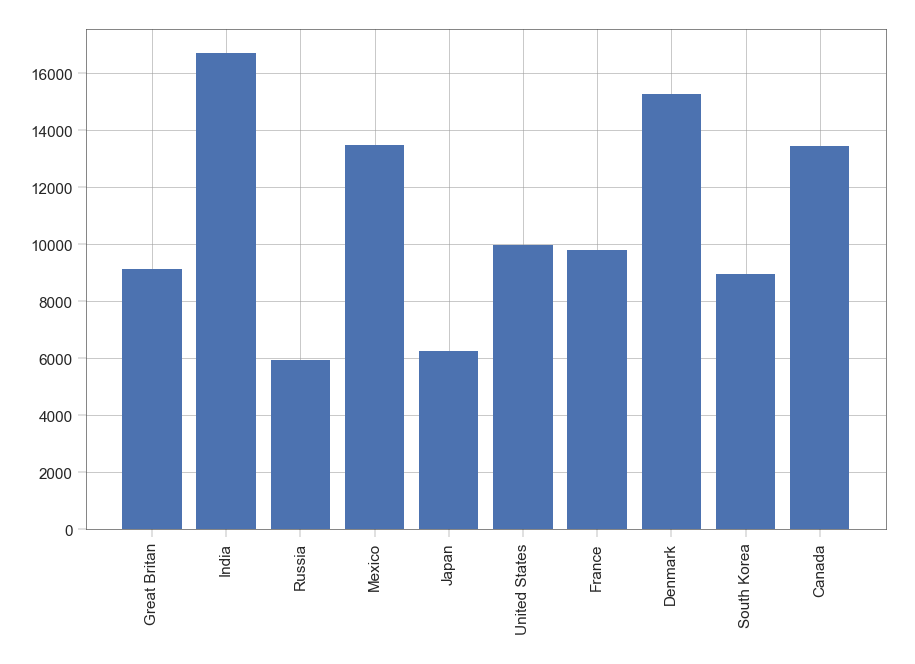

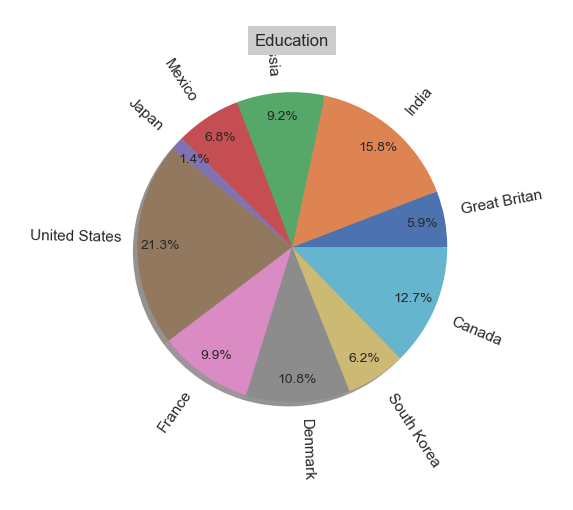

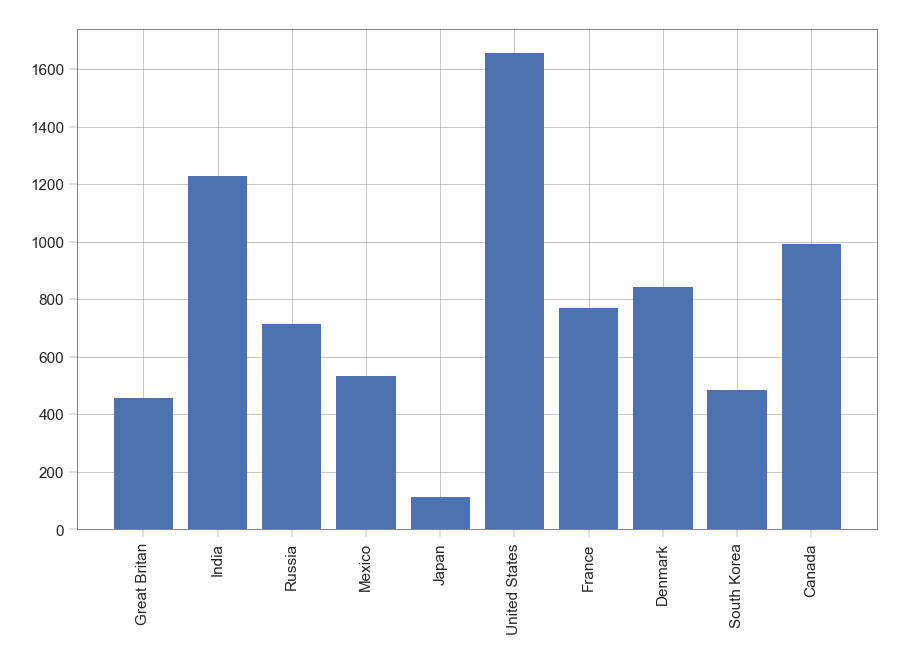

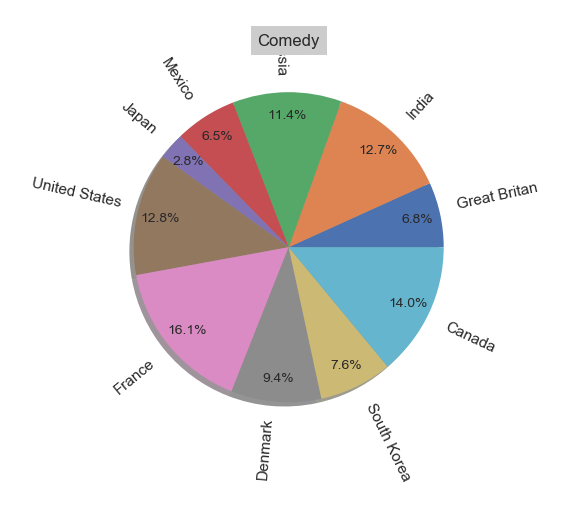

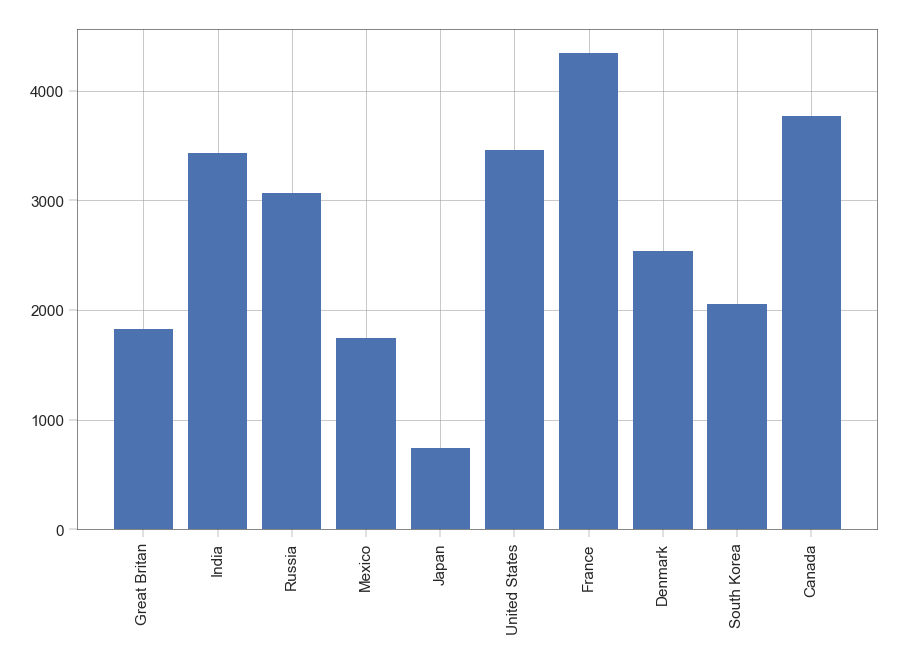

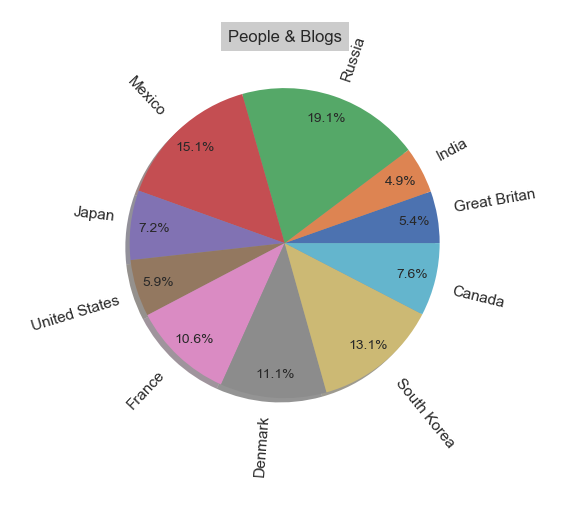

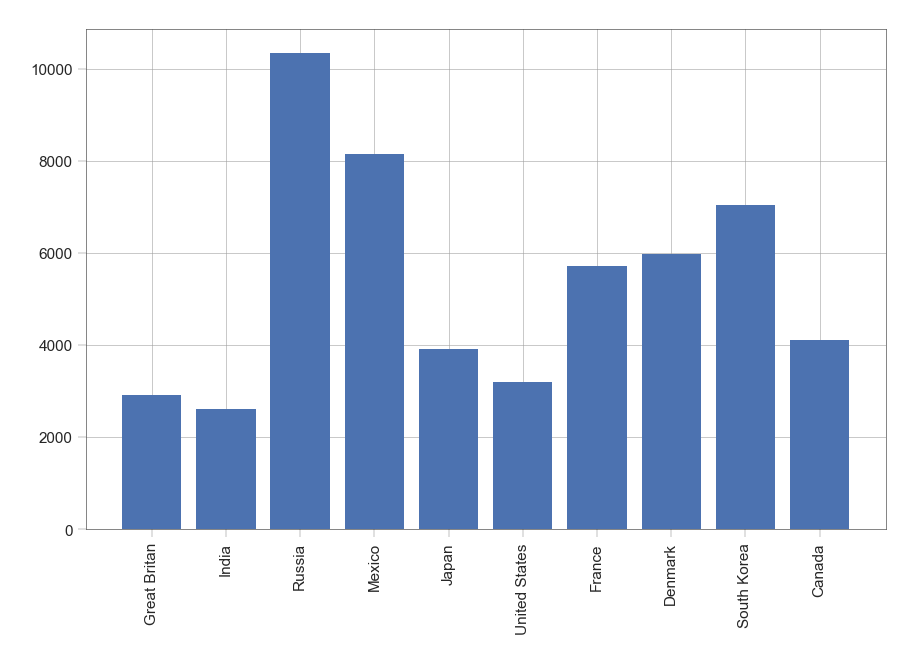

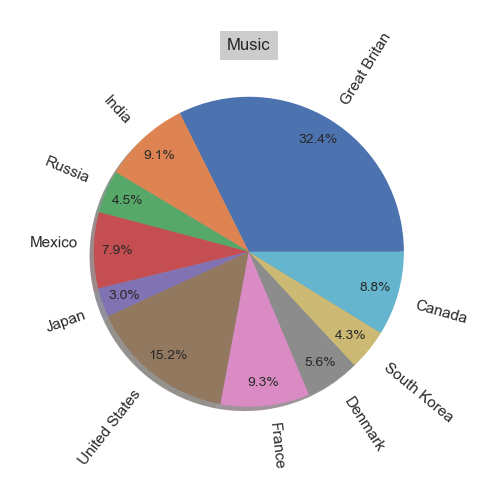

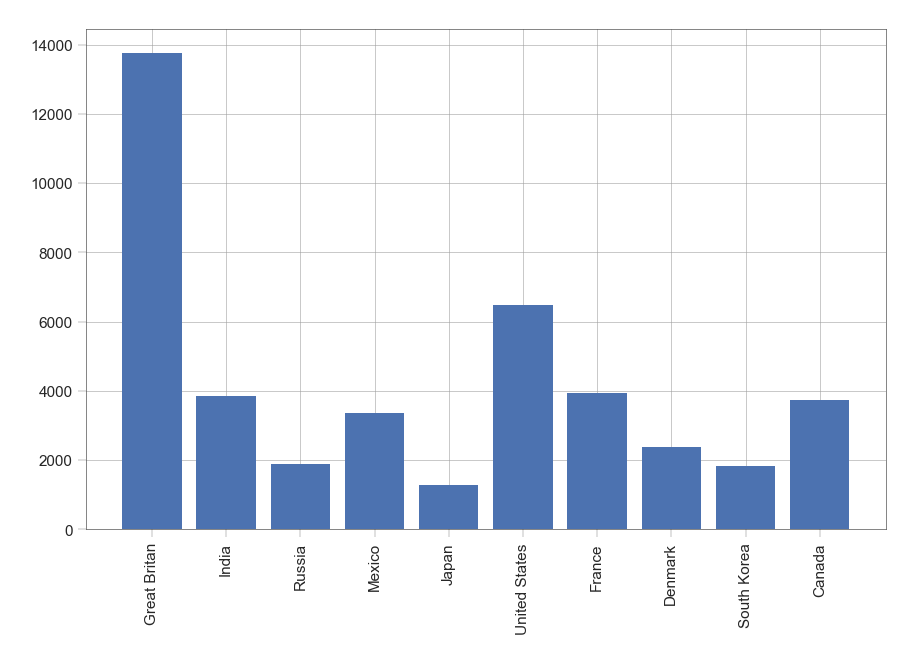

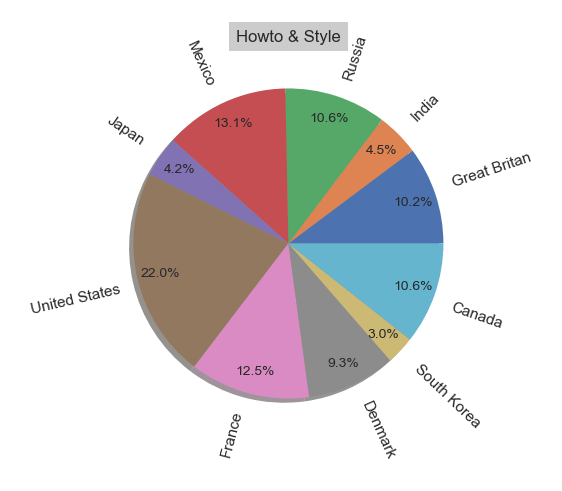

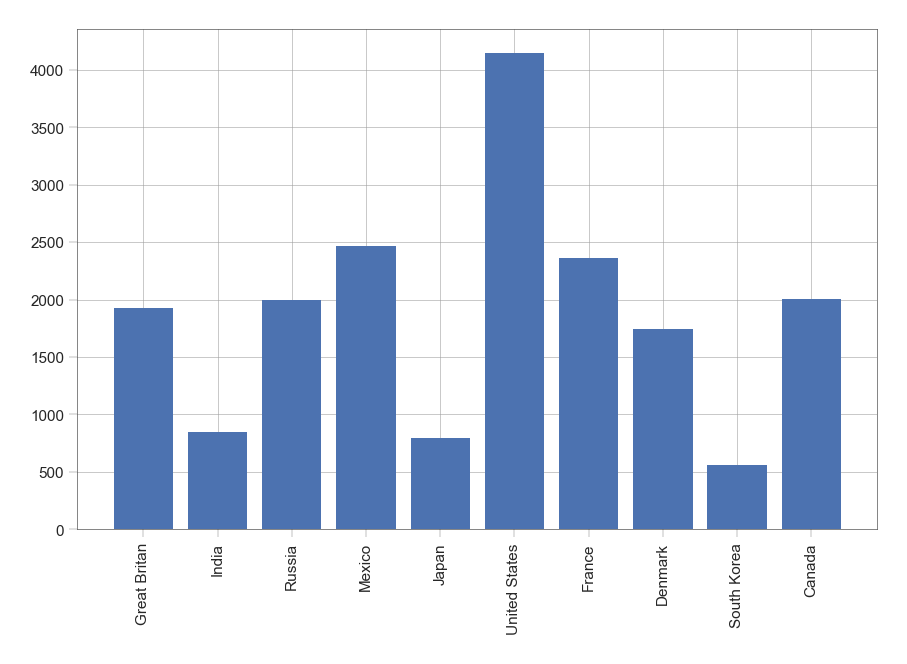

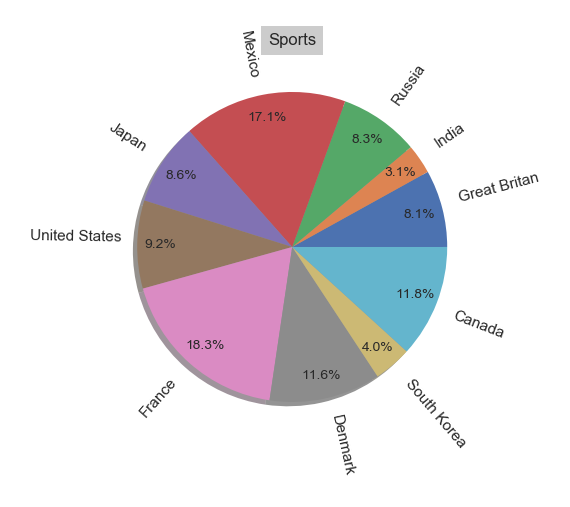

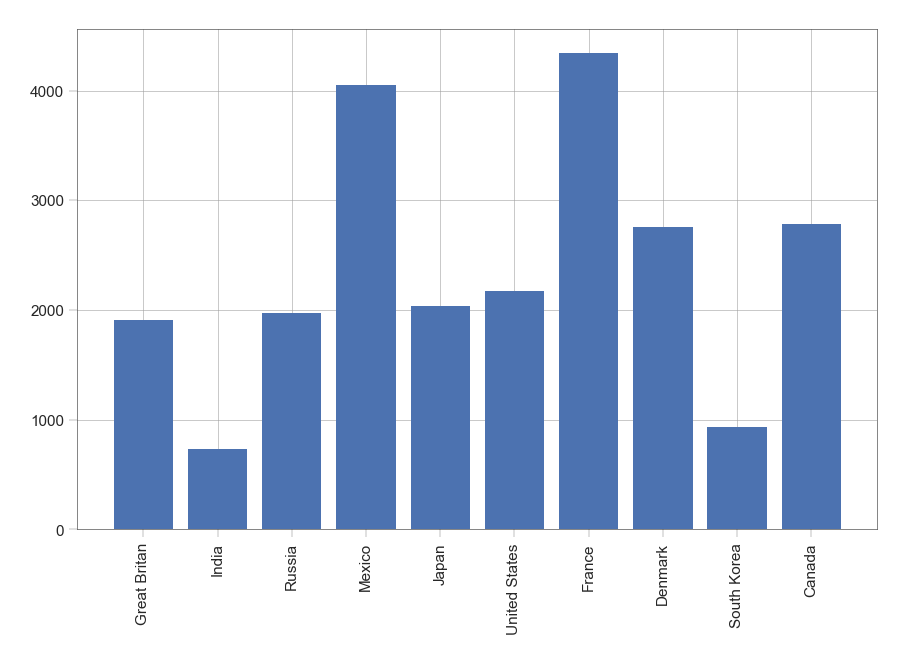

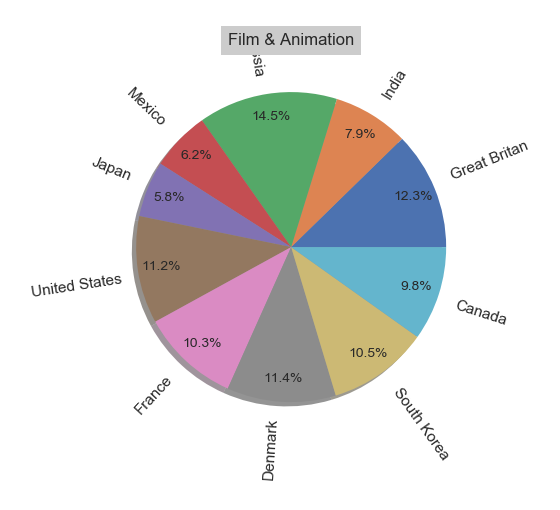

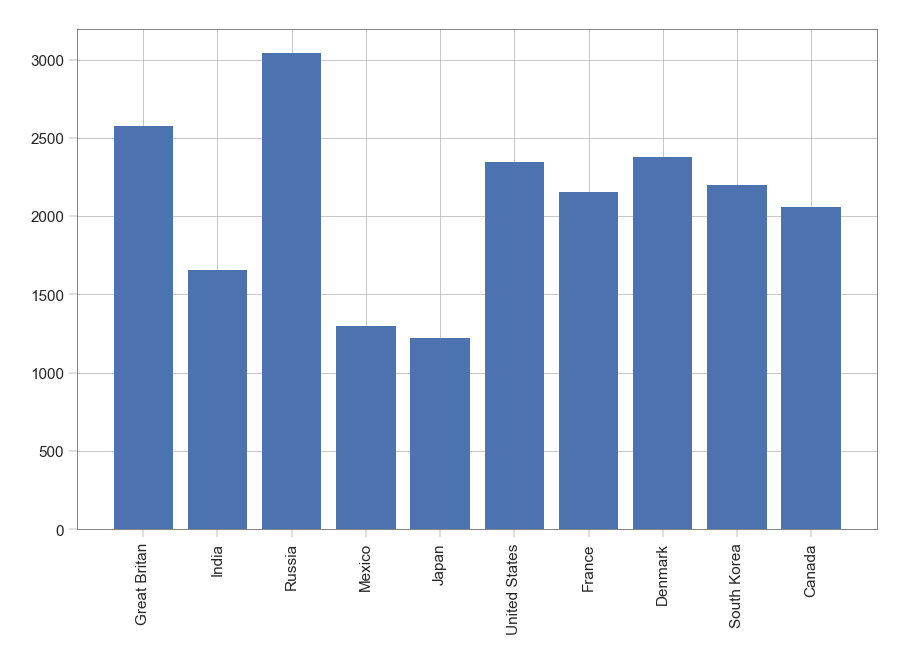

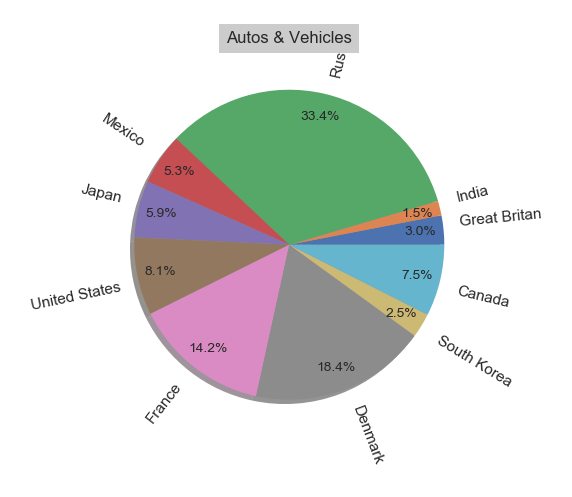

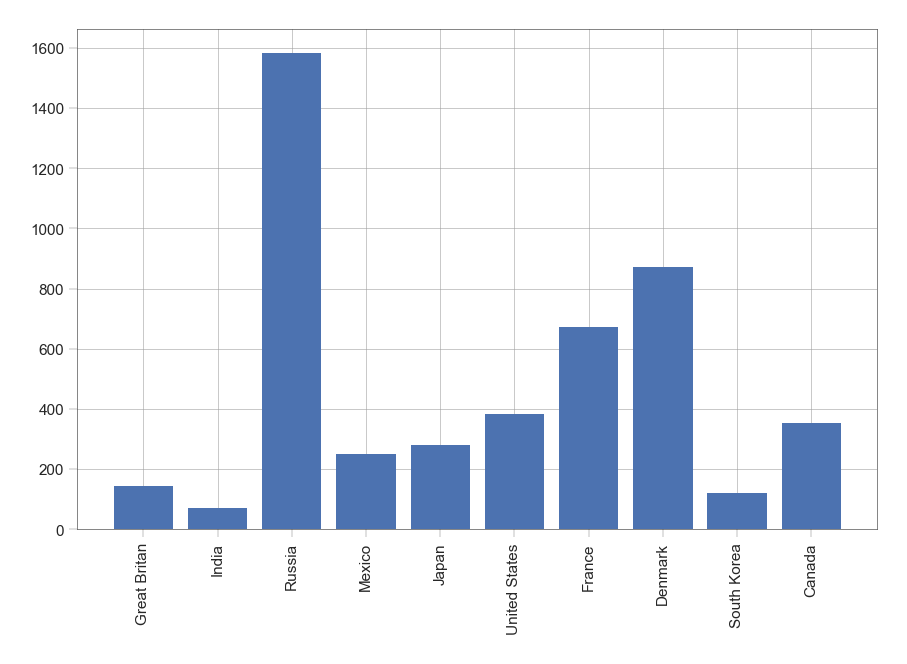

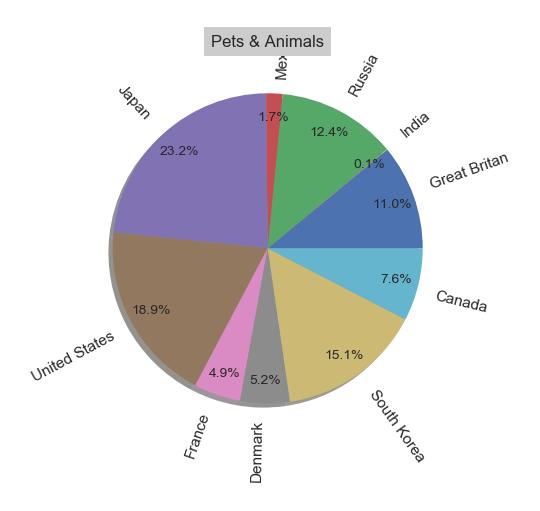

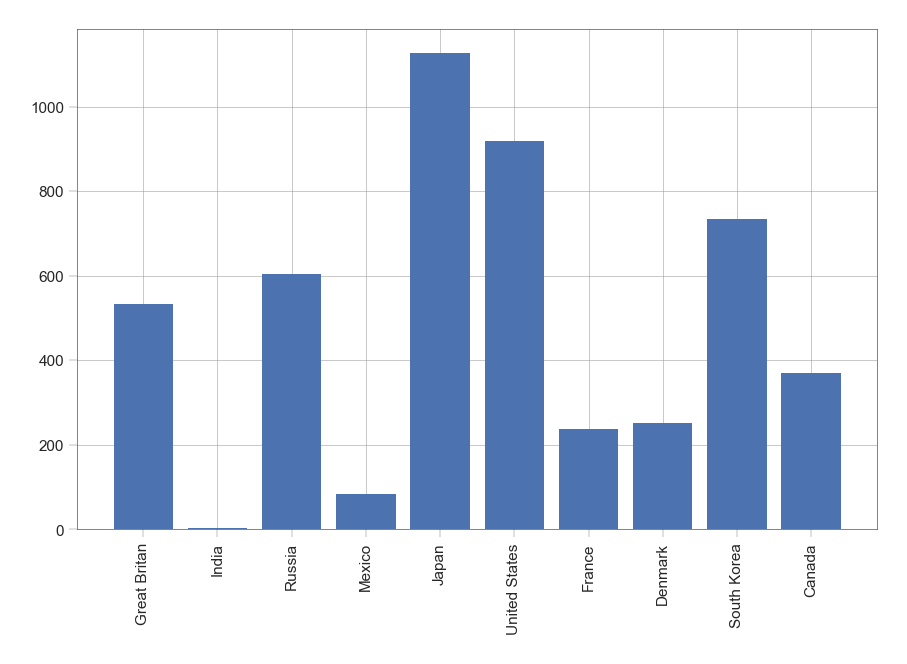

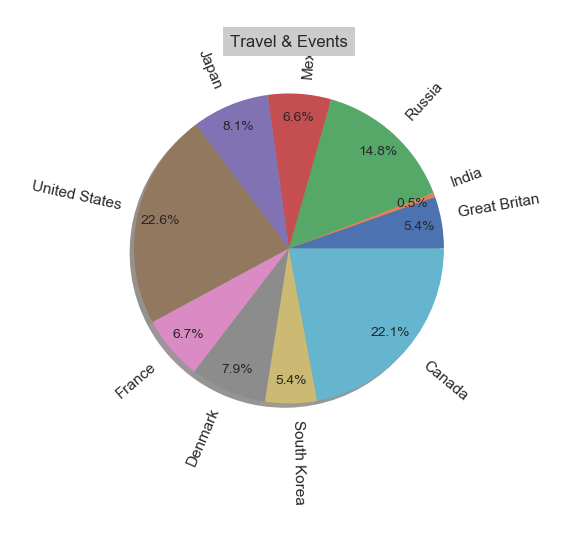

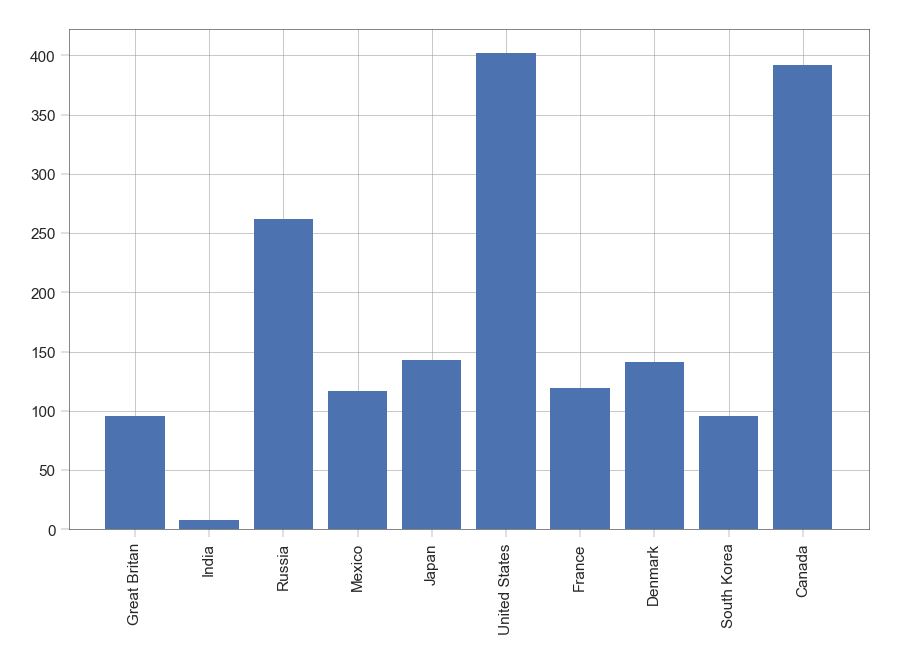

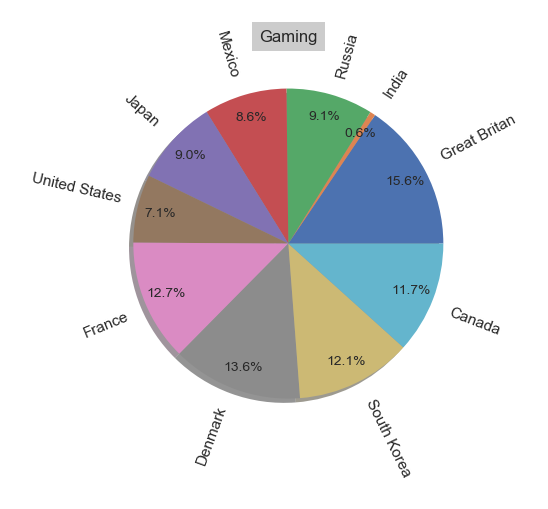

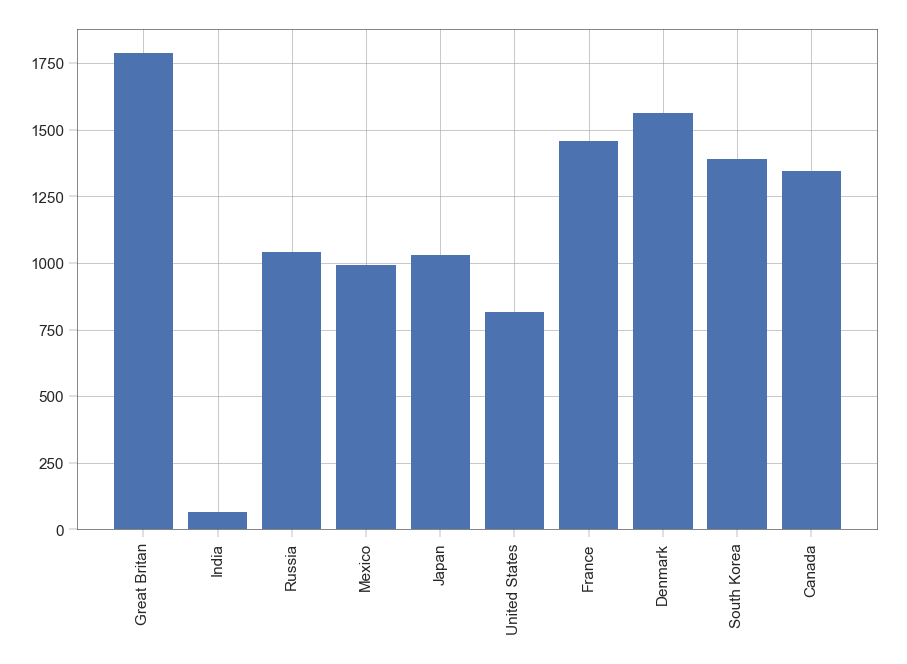

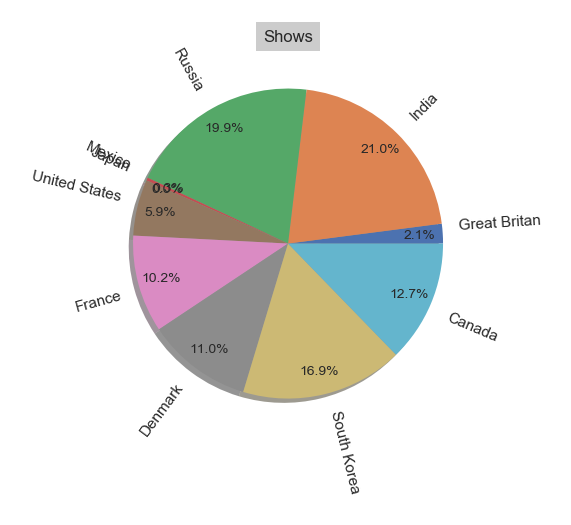

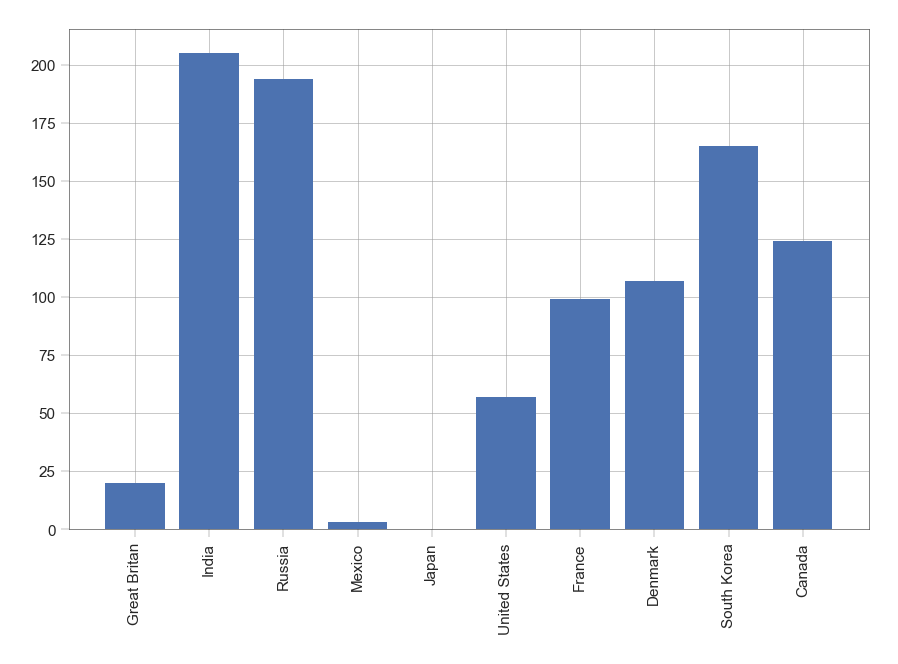

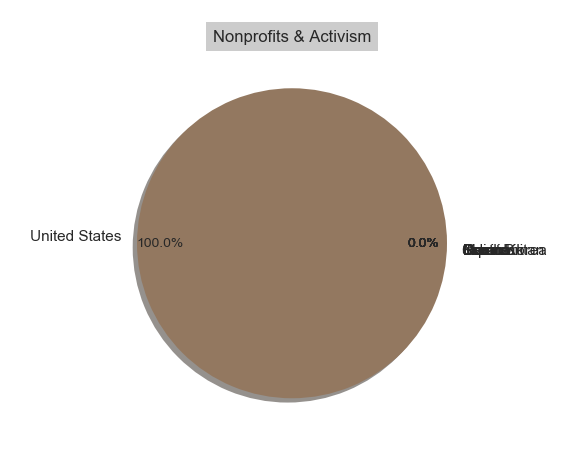

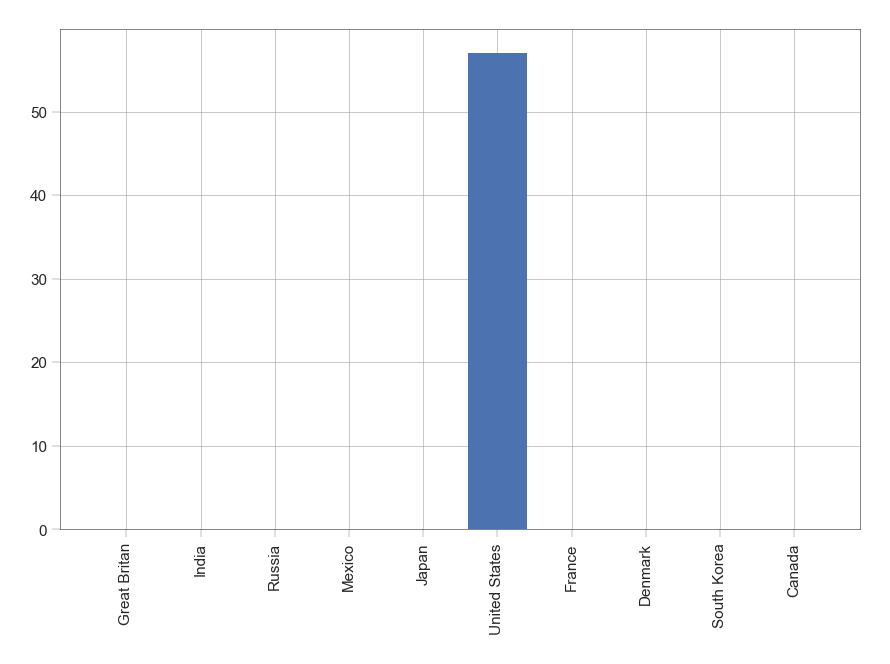

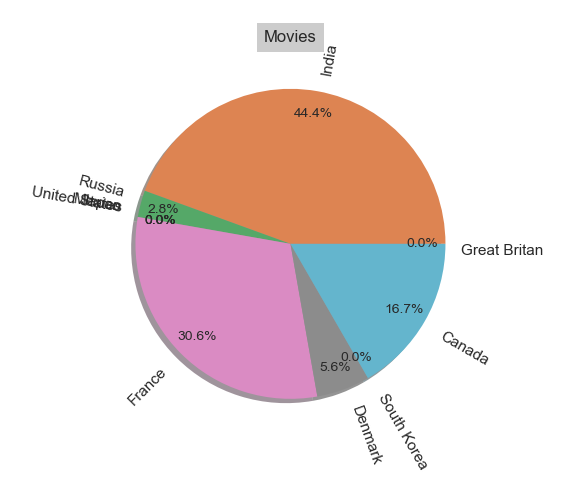

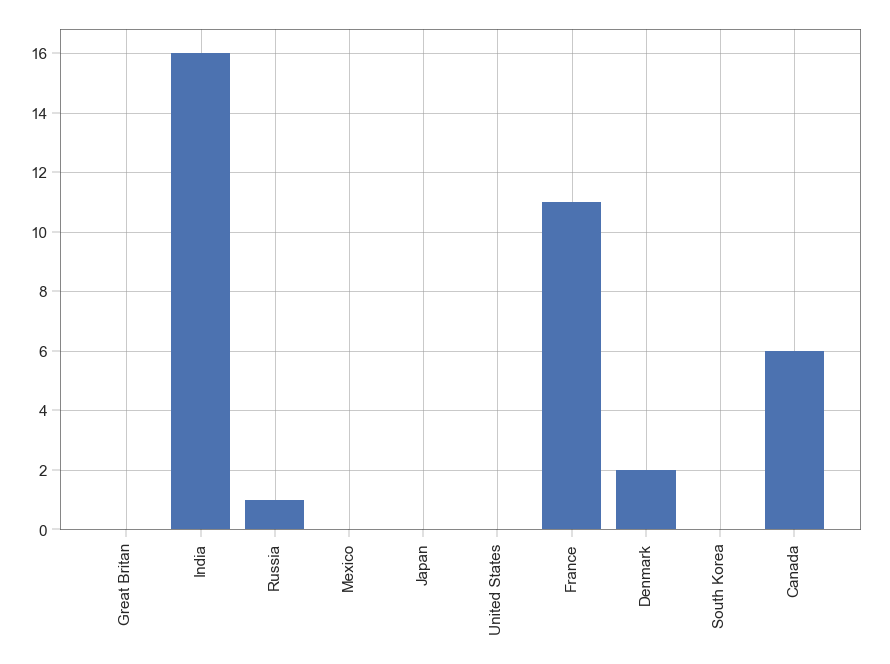

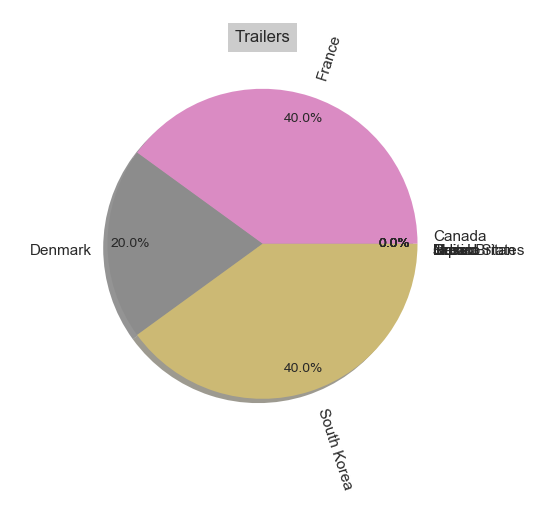

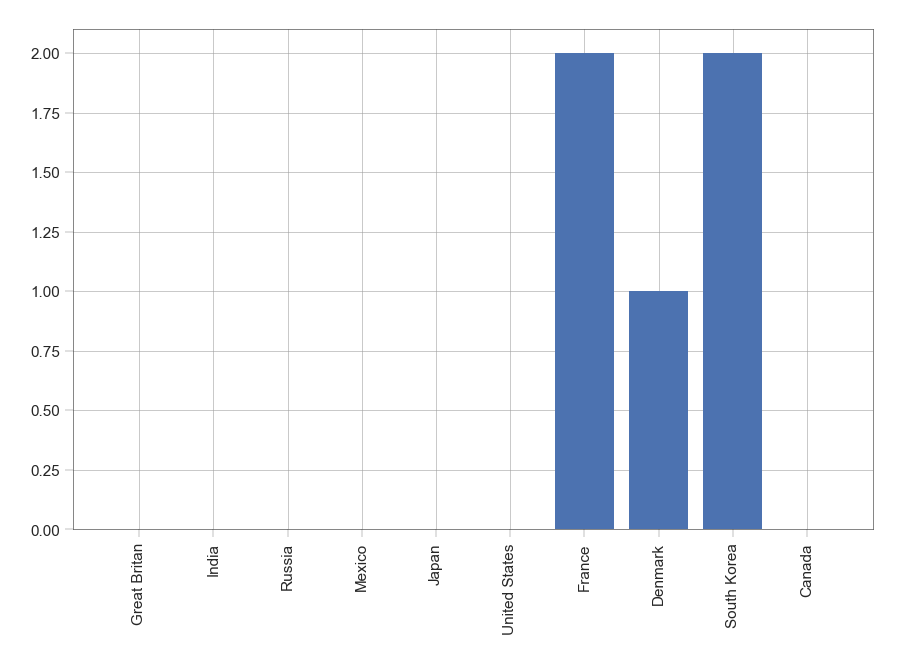

In [78]:
labels = unique_regions

for x in unique_categories:
    size=[]
    for y in unique_regions:
        rslt_df = data[data['region'] == y]
        rslt_df=rslt_df[rslt_df['category_name']==x]
        size.append(rslt_df.shape[0])
    explode =[0]*10
    fig1, ax1 = plt.subplots(figsize=(5,6))
    plt.pie(size,
        labels=unique_regions,
        shadow= True,
        explode=explode,
        radius=1,
        rotatelabels=True,
        autopct='%1.1f%%',
        pctdistance=0.85
        )
    plt.title(x, bbox={'facecolor':'0.8', 'pad':5})
    
    

    plt.show()
    
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    plt.xticks(rotation=90)
    ax.bar(unique_regions,size)
    plt.show()

/Users/purvagulati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


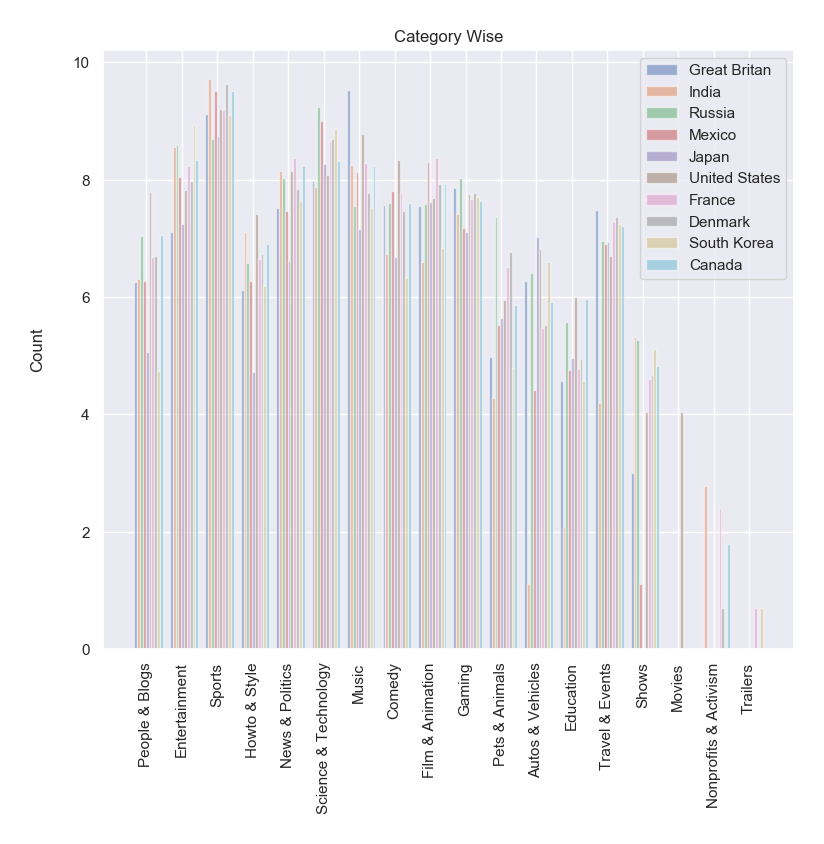

In [133]:
listt=[]
for x in unique_regions:
    temp=[]
    for y in unique_categories:
        rslt_df = data[data['region'] == x]
        rslt_df=rslt_df[rslt_df['category_name']==y]
        temp.append(rslt_df.shape[0])
    listt.append(temp)

fig, ax = plt.subplots(figsize=(8,8)) 
index = np.arange(18) 
bar_width = 0.08 
opacity = 0.5

i=0
reacts=[0]*10
for x in unique_regions:
    reacts[i]=plt.bar(index,np.log(listt[i]),bar_width,alpha=opacity,label=x)
    index=index+bar_width
    i=i+1



plt.xticks(index-0.5, ('People & Blogs' ,'Entertainment', 'Sports' ,'Howto & Style',
 'News & Politics' ,'Science & Technology', 'Music' ,'Comedy',
 'Film & Animation' ,'Gaming' ,'Pets & Animals', 'Autos & Vehicles',
 'Education' ,'Travel & Events' ,'Shows', 'Movies' ,'Nonprofits & Activism'
 ,'Trailers'), rotation=90)
plt.ylabel('Count')
plt.legend()
plt.tight_layout() 
plt.title("Category Wise")
plt.show()

# Analysis based on Tag Count

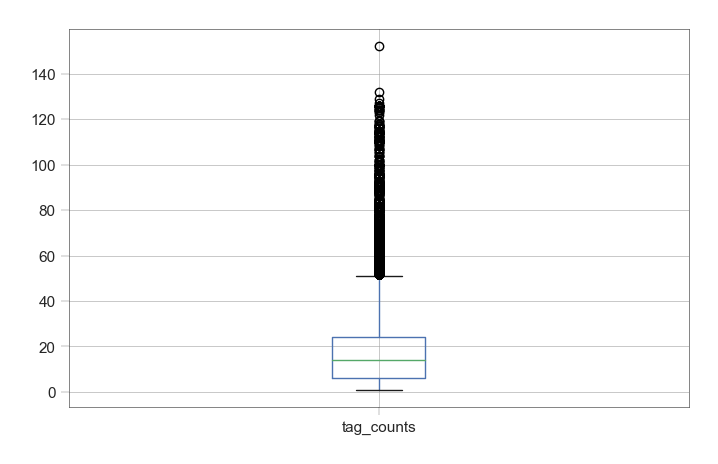

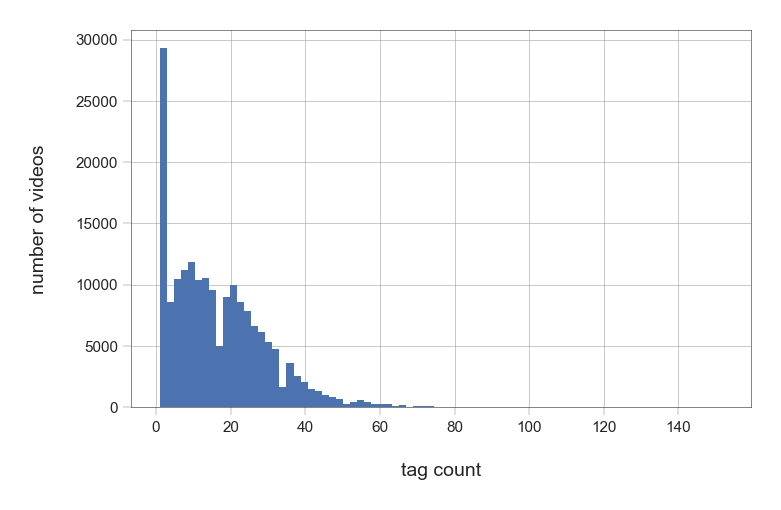

In [80]:
### Preliminary Data Cleaning to remove data which are not relevant to us
data = data[data['video_error_or_removed'] == False] ###Remove video with error
data = data[data['comments_disabled'] == False] ###Remove video that does not allow comment/ratings(likes/dislikes)
data = data[data['ratings_disabled'] == False]

data_id_date = data.loc[:,['video_id','tags']].drop_duplicates()
### Creating a new column which tells us the number of tags that the video has. 
data_id_date['tag_counts'] = data_id_date['tags'].str.split("|").apply(len)
data_id_date['tag_counts'].plot.box()
plt.show()
data_id_date['tag_counts'].hist(bins=80)
plt.xlabel('tag count')
plt.ylabel('number of videos')
plt.show()

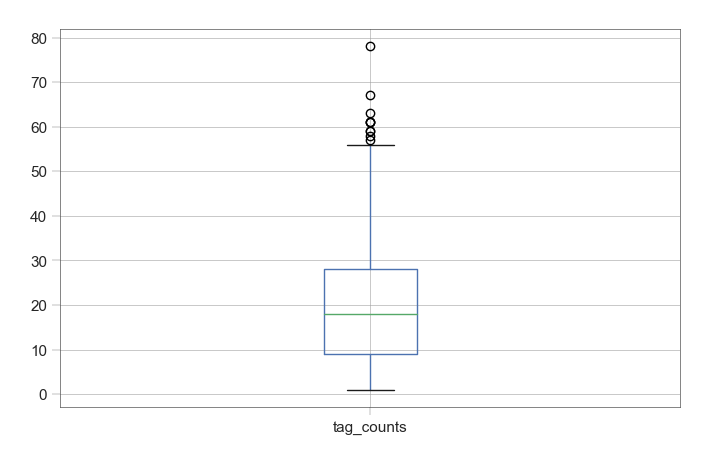

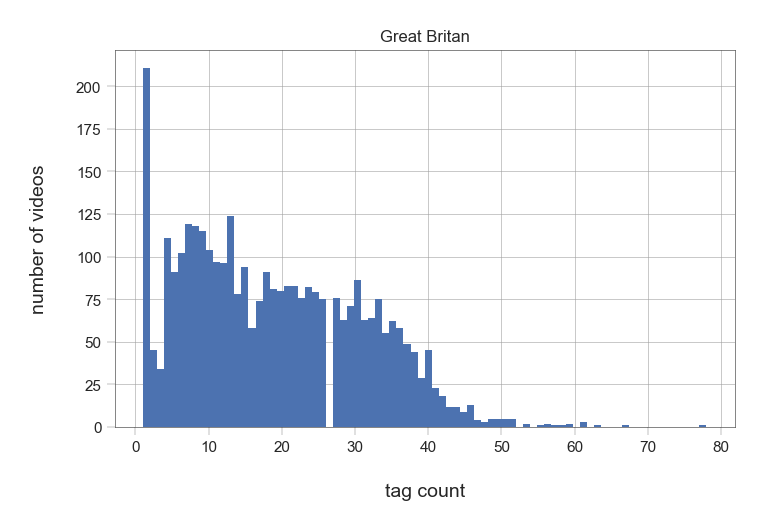

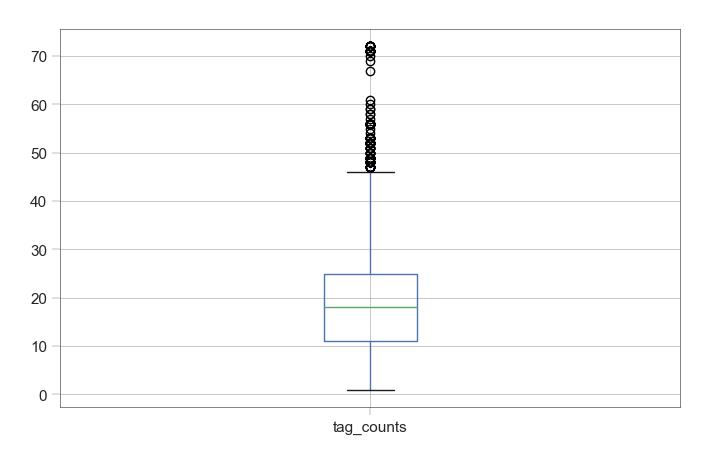

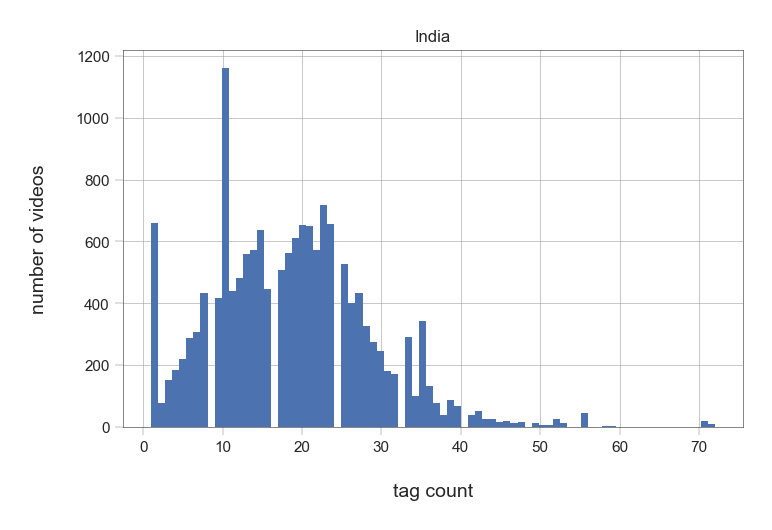

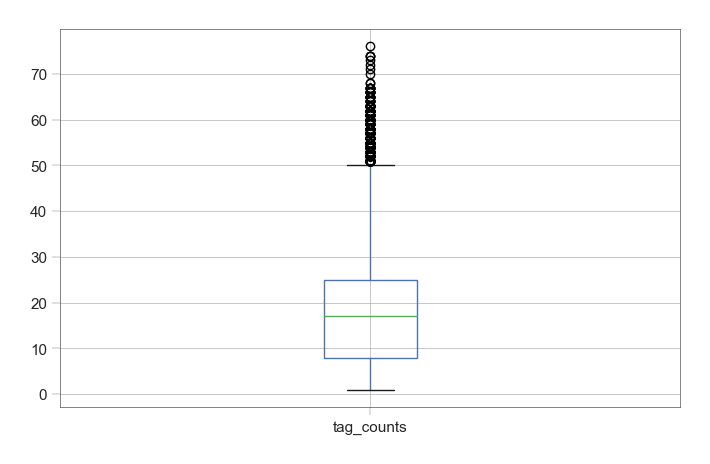

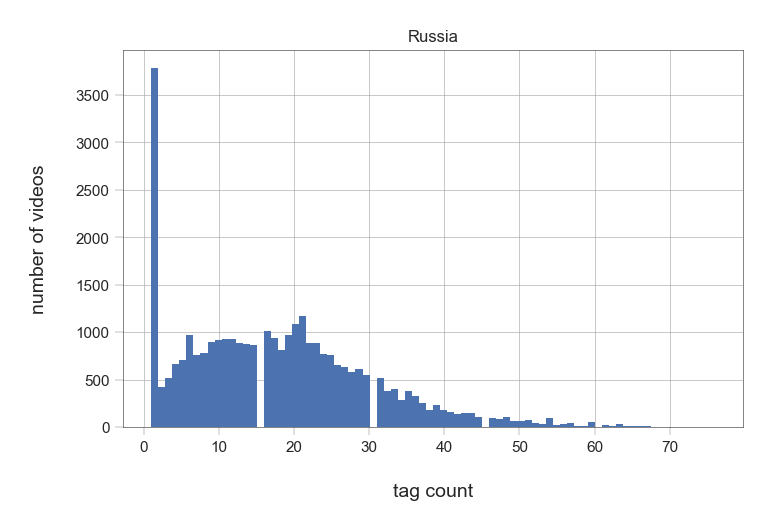

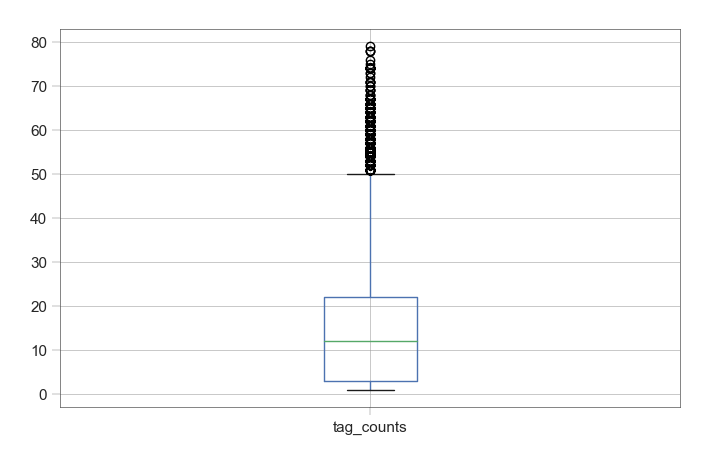

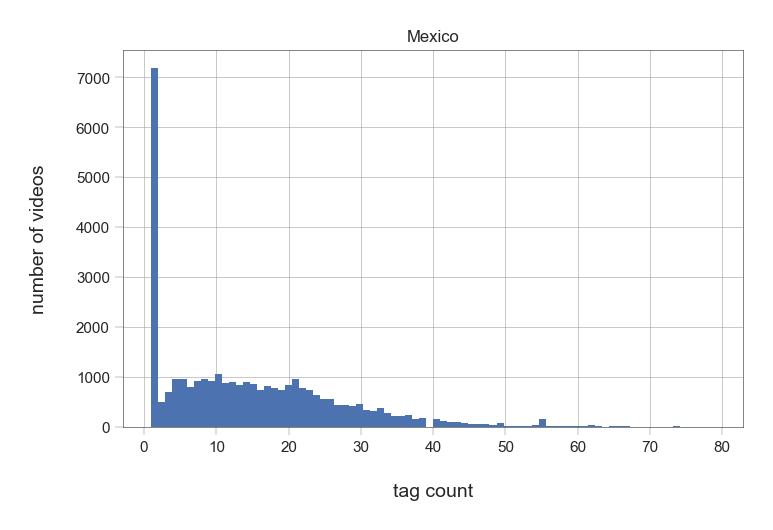

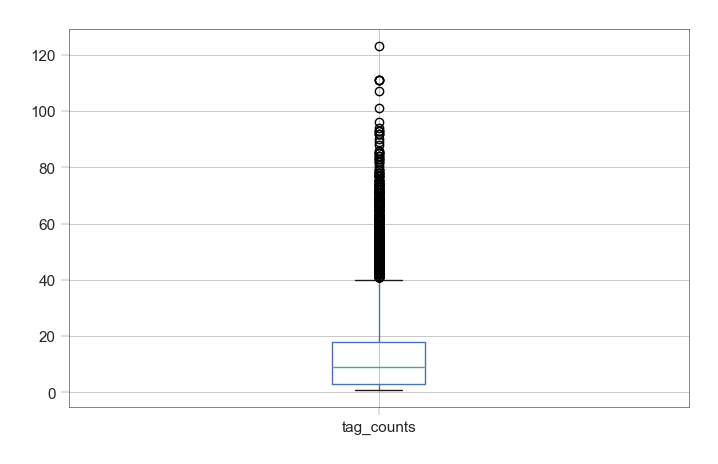

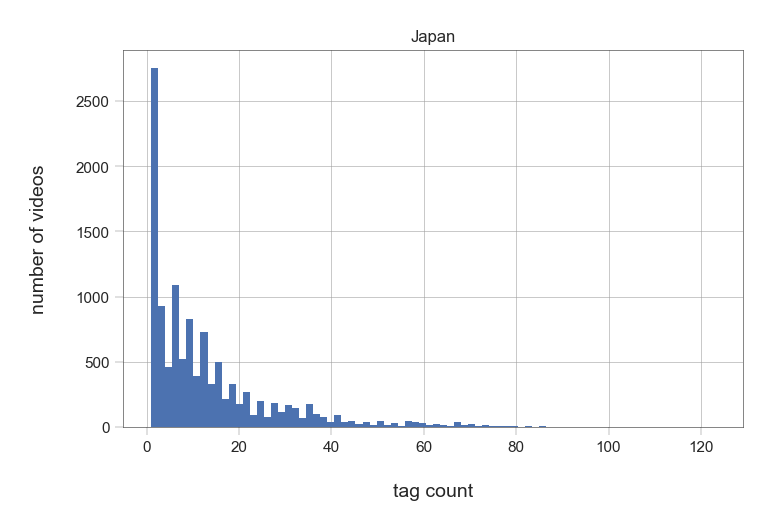

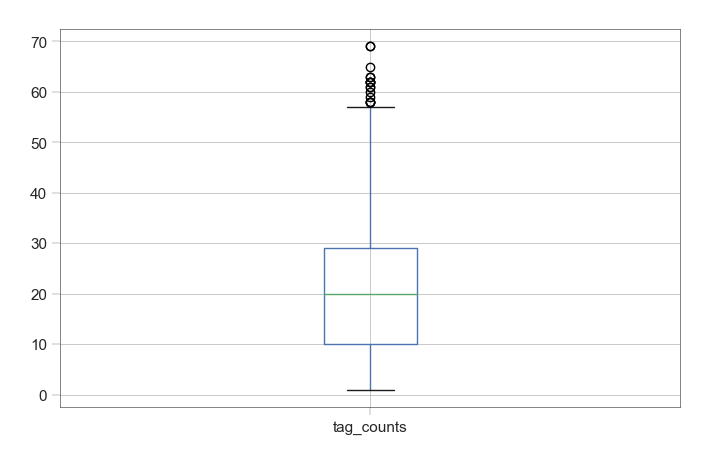

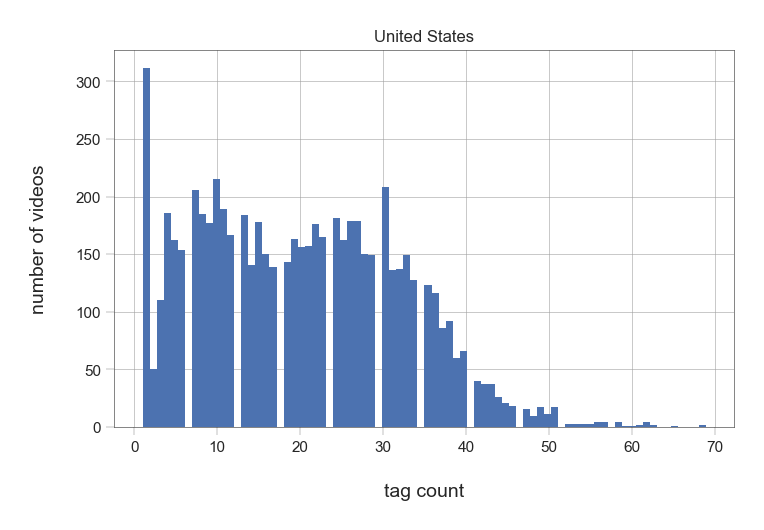

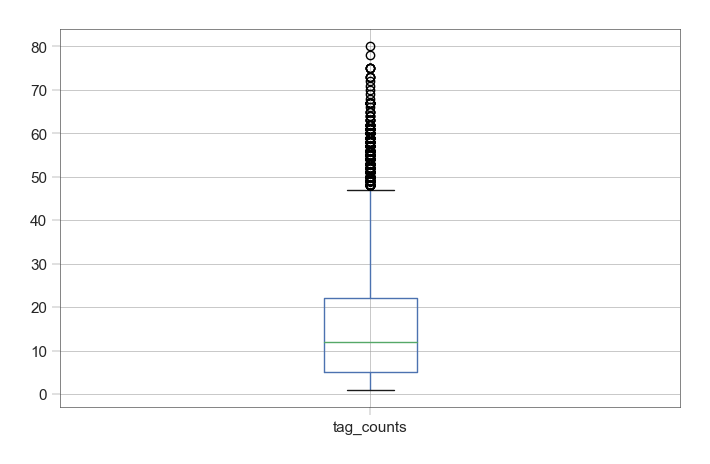

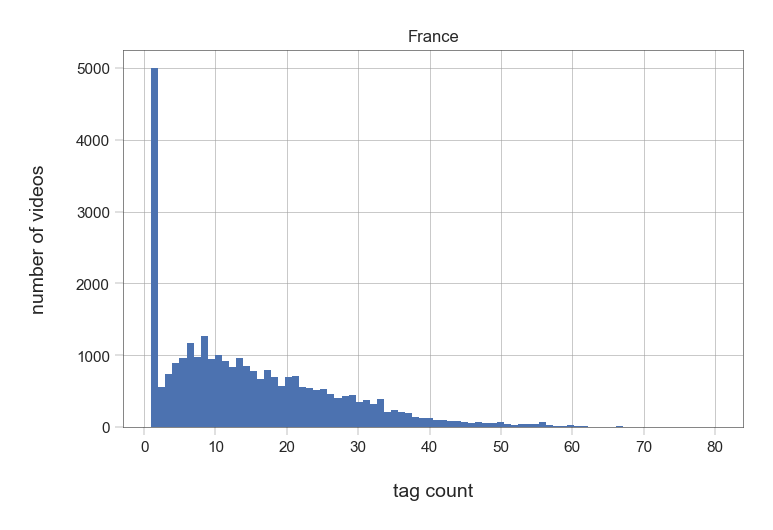

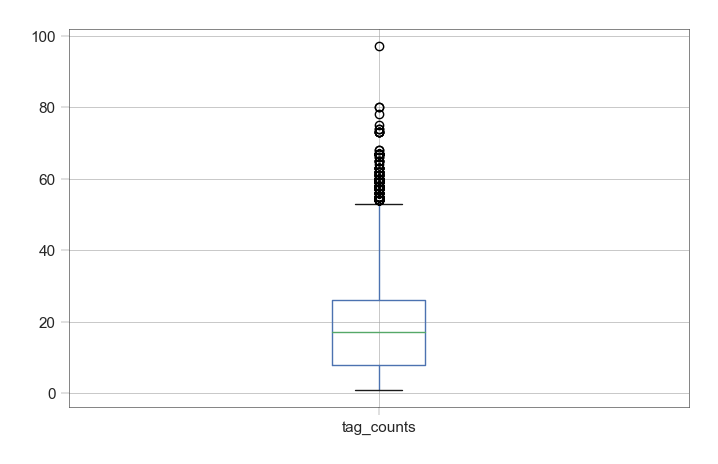

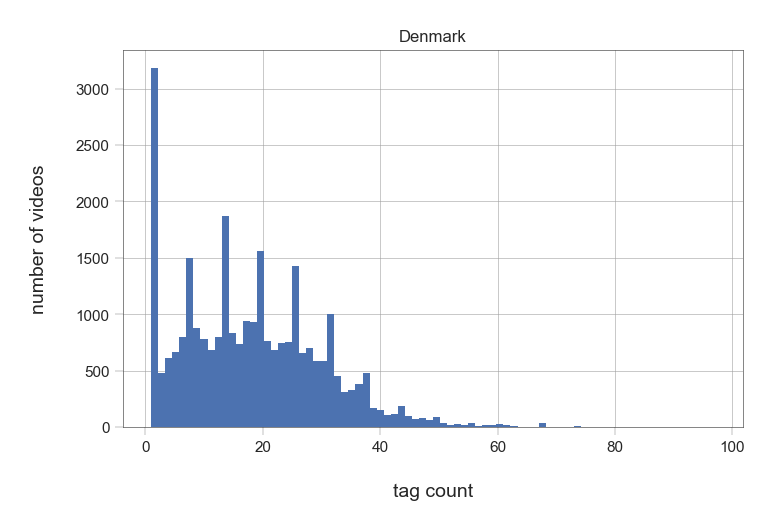

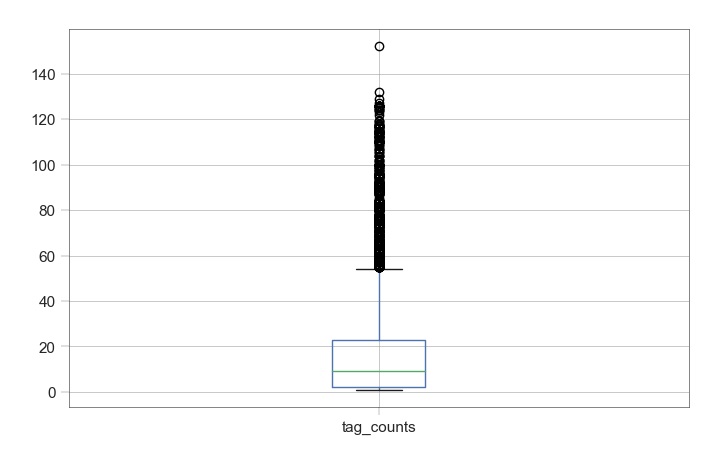

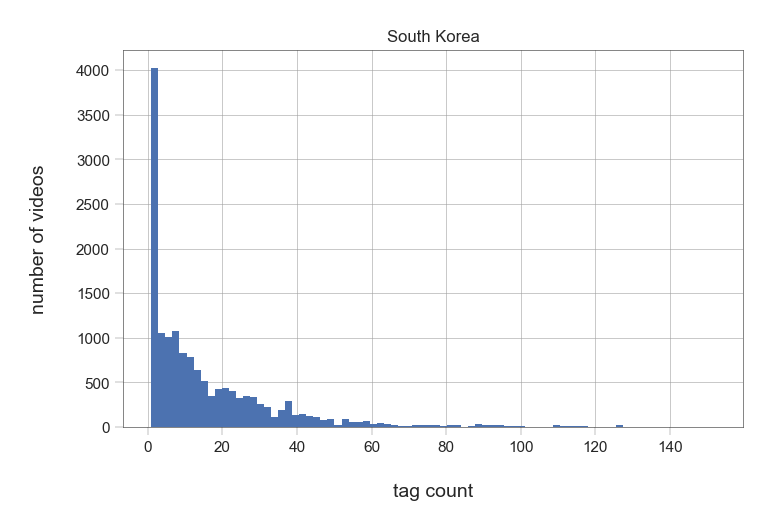

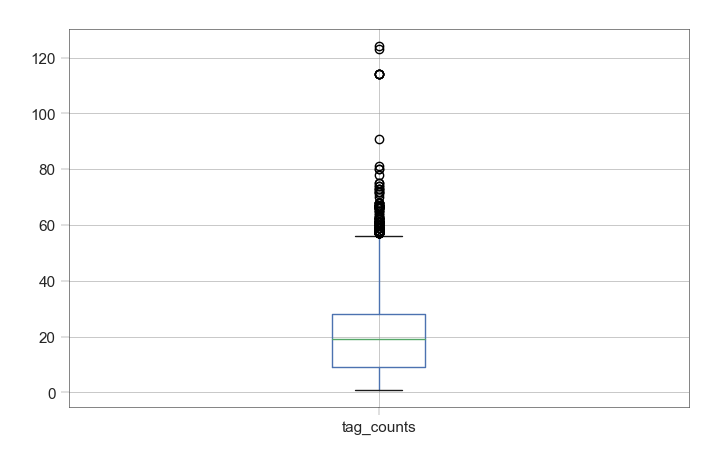

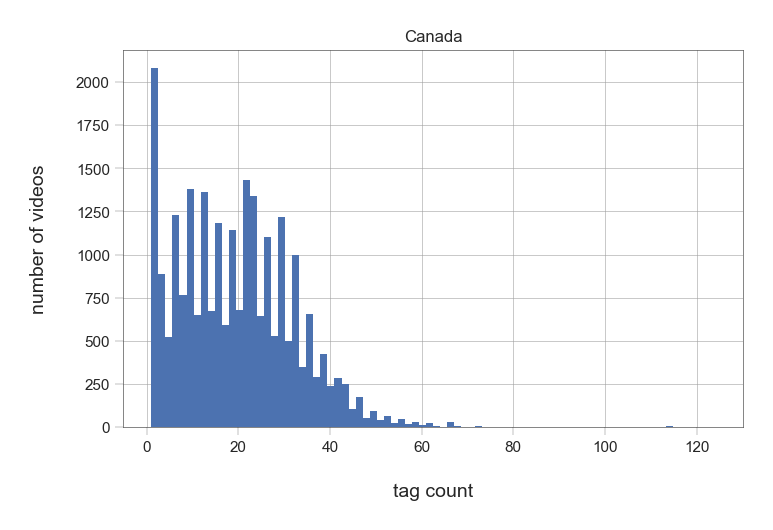

In [81]:
#country-wise tag count
for x in unique_regions:
    temp=data[data['region'] == x]
    data_id_date = temp.loc[:,['video_id','tags']].drop_duplicates()
    ### Creating a new column which tells us the number of tags that the video has. 
    data_id_date['tag_counts'] = data_id_date['tags'].str.split("|").apply(len)
    data_id_date['tag_counts'].plot.box()
    plt.show()
    data_id_date['tag_counts'].hist(bins=80)
    plt.title(x)
    plt.xlabel('tag count')
    plt.ylabel('number of videos')
    plt.show()

# Top 10 tag counts on the videos

In [82]:
data['tag_counts'] = data['tags'].str.split("|").apply(len)
rel_col = ['video_id','views','tag_counts','tags','title']
df = data[rel_col].groupby(['video_id'])
data_t = [] 

# Editing the data such that we are able to loop through each tag in each column
for vid_id,rows in df:
    
    data_t.append([vid_id,rows['title'].values[0],rows['tags'].values[0].split("|"),rows['tag_counts'].values[0]])

# Creating new dataframe with the following columns
df = pd.DataFrame(data_t, columns = ['Video ID', 'Title','Tags','Tag Counts'])
dic_freq = {}
dic_trendsum = {}
dic_trendsum_weighted = {}
# Looping through the rows
for index, row in df.iterrows():
    # Looping through each tag
    for item in row['Tags']:
        if item in dic_freq:
            dic_freq[item] = dic_freq[item] + 1
        else:
            dic_freq[item] = 1

            
tag_df = pd.DataFrame([dic_freq]).T
tag_df.columns = ['word_freq']

In [83]:
import operator
sorted_d = dict( sorted(dic_freq.items(), key=operator.itemgetter(1),reverse=True))

In [84]:
import itertools
out = dict(itertools.islice(sorted_d.items(), 11))
print(str(out))

{'[none]': 22340, '"2018"': 5303, '"funny"': 4054, '"comedy"': 3023, '"news"': 2603, '"2017"': 2475, '"video"': 1982, '"show"': 1811, '"television"': 1689, '"tv"': 1512, '"music"': 1442}


In [85]:
for x in unique_regions:
    temp=data[data['region']==x]
    temp.head()
    
    rel_col = ['video_id','views','tag_counts','tags','title','region']
    df = temp[rel_col].groupby(['video_id'])
    data_t = [] 

In [86]:
for x in unique_regions:
    temp=data[data['region'] == x]
    temp.head()
    
    rel_col = ['video_id','views','tag_counts','tags','title']
    df = temp[rel_col].groupby(['video_id'])
    data_t = [] 

    # Editing the data such that we are able to loop through each tag in each column
    for vid_id,rows in df:
        data_t.append([vid_id,rows['title'].values[0],rows['tags'].values[0].split("|"),rows['tag_counts'].values[0]])

    # Creating new dataframe with the following columns
    df = pd.DataFrame(data_t, columns = ['Video ID', 'Title','Tags','Tag Counts'])
    
    
    dic_freq = {}
    # Looping through the rows
    for index, row in df.iterrows():
        # Looping through each tag
        for item in row['Tags']:
            if item in dic_freq:
                dic_freq[item] = dic_freq[item] + 1
            else:
                dic_freq[item] = 1
       
            
    tag_df = pd.DataFrame([dic_freq]).T
    tag_df.columns = ['word_freq']
    sorted_d = dict( sorted(dic_freq.items(), key=operator.itemgetter(1),reverse=True))
    out = dict(itertools.islice(sorted_d.items(), 11))
    print(x+"->")
    print(str(out))

Great Britan->
{'"funny"': 315, '"comedy"': 256, '"music"': 194, '[none]': 172, '"humor"': 161, '"interview"': 147, '"comedian"': 136, '"video"': 131, '"celebrities"': 127, '"jokes"': 126, '"funny video"': 125}
India->
{'"television"': 965, '"show"': 942, '"serial"': 919, '"full episode"': 909, '"daily soap"': 872, '"watch online"': 865, '"comedy"': 785, '"funny"': 776, '[none]': 588, '"Zee5"': 506, '"hindi"': 440}
Russia->
{'[none]': 3084, '"Ñ\x8eÐ¼Ð¾Ñ\x80"': 1338, '"2018"': 1257, '"Ð¾Ð±Ð·Ð¾Ñ\x80"': 1245, '"Ð½Ð¾Ð²Ð¾Ñ\x81Ñ\x82Ð¸"': 1176, '"Ð¿Ð¾Ð»Ð¸Ñ\x82Ð¸ÐºÐ°"': 1164, '"Ð¿Ñ\x83Ñ\x82Ð¸Ð½"': 839, '"Ð\xa0Ð¾Ñ\x81Ñ\x81Ð¸Ñ\x8f"': 790, '"Ð¿Ñ\x80Ð¸ÐºÐ¾Ð»Ñ\x8b"': 753, '"Ñ\x80Ð¾Ñ\x81Ñ\x81Ð¸Ñ\x8f"': 744, '"Ñ\x82Ð¾Ð¿"': 633}
Mexico->
{'[none]': 6332, '"2018"': 1273, '"mexico"': 929, '"noticias"': 808, '"tv azteca"': 617, '"2017"': 580, '"de"': 575, '"amor"': 546, '"video"': 539, '"espaÃ±ol"': 528, '"viral"': 510}
Japan->
{'[none]': 1870, '"ã\x81\x8aã\x82\x82ã\x81\x97ã\x82\x8d"': 385, '"æ\x96\x99ç\

# Analysis of a video based on Publish Time

In [87]:
data = pd.read_csv("YoutubeData.csv")

In [88]:
time = pd.to_datetime(data['publish_time'])

In [89]:
data['hour'] = time.dt.hour

In [90]:
ca = data[data['region']=="Canada"]
ind = data[data['region']=="India"]
gb = data[data['region']=="Great Britan"]
ger = data[data['region']=="Germany"]
mex = data[data['region']=="Mexico"]
us = data[data['region']=="United States"]
fr = data[data['region']=="France"]
jpn = data[data['region']=="Japan"]
kr = data[data['region']=="South Korea"]
ru = data[data['region']=="Russia"]

Here,we first analyse the no. of uploads all over the world in 4 different time slots with the help of a piechart


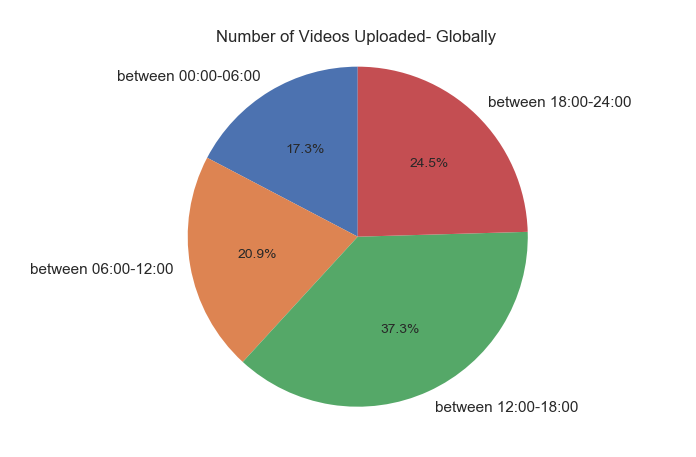

Analysis of data shows that maximum videos all over the world are uploaded b/w the times slot of 12:00-18:00


In [91]:
print("Here,we first analyse the no. of uploads all over the world in 4 different time slots with the help of a piechart")
labels=['between 00:00-06:00','between 06:00-12:00','between 12:00-18:00','between 18:00-24:00']
d1 = data[(data['publish_time']<'06:00:00')  & (data['publish_time']>'00:00:00')]
d2 = data[(data['publish_time']<'12:00:00') & (data['publish_time']>'06:00:00')]
d3 = data[(data['publish_time']<'18:00:00') & (data['publish_time']>'12:00:00')]
d4 = data[(data['publish_time']<'23:59:59') & (data['publish_time']>'18:00:00')]
size=(d1.shape[0], d2.shape[0], d3.shape[0], d4.shape[0])
fig1, ax1 = plt.subplots() 
ax1.pie(size, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of Videos Uploaded- Globally')
plt.show()
print("Analysis of data shows that maximum videos all over the world are uploaded b/w the times slot of 12:00-18:00")

In [92]:
size1 = (ca[(ca['publish_time']<'06:00:00')  & (ca['publish_time']>'00:00:00')].shape[0], ind[(ind['publish_time']<'06:00:00')  & (ind['publish_time']>'00:00:00')].shape[0],gb[(gb['publish_time']<'06:00:00')  & (gb['publish_time']>'00:00:00')].shape[0],mex[(mex['publish_time']<'06:00:00')  & (mex['publish_time']>'00:00:00')].shape[0],us[(us['publish_time']<'06:00:00')  & (us['publish_time']>'00:00:00')].shape[0],fr[(fr['publish_time']<'06:00:00')  & (fr['publish_time']>'00:00:00')].shape[0],jpn[(jpn['publish_time']<'06:00:00')  & (jpn['publish_time']>'00:00:00')].shape[0],kr[(kr['publish_time']<'06:00:00')  & (kr['publish_time']>'00:00:00')].shape[0],ru[(ru['publish_time']<'06:00:00')  & (ru['publish_time']>'00:00:00')].shape[0],ger[(ger['publish_time']<'06:00:00')  & (ger['publish_time']>'00:00:00')].shape[0])
print(size1)

(7714, 7434, 8223, 14132, 7115, 2526, 3688, 7774, 3609, 0)


In [93]:
size2 = (ca[(ca['publish_time']<'12:00:00')  & (ca['publish_time']>'06:00:00')].shape[0], ind[(ind['publish_time']<'12:00:00')  & (ind['publish_time']>'06:00:00')].shape[0],gb[(gb['publish_time']<'12:00:00')  & (gb['publish_time']>'06:00:00')].shape[0],mex[(mex['publish_time']<'12:00:00')  & (mex['publish_time']>'06:00:00')].shape[0],us[(us['publish_time']<'12:00:00')  & (us['publish_time']>'06:00:00')].shape[0],fr[(fr['publish_time']<'12:00:00')  & (fr['publish_time']>'06:00:00')].shape[0],jpn[(jpn['publish_time']<'12:00:00')  & (jpn['publish_time']>'06:00:00')].shape[0],kr[(kr['publish_time']<'12:00:00')  & (kr['publish_time']>'06:00:00')].shape[0],ru[(ru['publish_time']<'12:00:00')  & (ru['publish_time']>'06:00:00')].shape[0], ger[(ger['publish_time']<'12:00:00')  & (ger['publish_time']>'06:00:00')].shape[0])
print(size2)

(4110, 12696, 5130, 2857, 3989, 7001, 8562, 14854, 10948, 0)


In [94]:
size3 = (ca[(ca['publish_time']<'18:00:00')  & (ca['publish_time']>'12:00:00')].shape[0], ind[(ind['publish_time']<'18:00:00')  & (ind['publish_time']>'12:00:00')].shape[0],gb[(gb['publish_time']<'18:00:00')  & (gb['publish_time']>'12:00:00')].shape[0],mex[(mex['publish_time']<'18:00:00')  & (mex['publish_time']>'12:00:00')].shape[0],us[(us['publish_time']<'18:00:00')  & (us['publish_time']>'12:00:00')].shape[0],fr[(fr['publish_time']<'18:00:00')  & (fr['publish_time']>'12:00:00')].shape[0],jpn[(jpn['publish_time']<'18:00:00')  & (jpn['publish_time']>'12:00:00')].shape[0],kr[(kr['publish_time']<'18:00:00')  & (kr['publish_time']>'12:00:00')].shape[0],ru[(ru['publish_time']<'18:00:00')  & (ru['publish_time']>'12:00:00')].shape[0],ger[(ger['publish_time']<'18:00:00')  & (ger['publish_time']>'12:00:00')].shape[0])
print(size3)

(15124, 14089, 15286, 7767, 16981, 19353, 5719, 8657, 18028, 0)


In [95]:
size4 = (ca[(ca['publish_time']<'24:00:00')  & (ca['publish_time']>'18:00:00')].shape[0], ind[(ind['publish_time']<'24:00:00')  & (ind['publish_time']>'18:00:00')].shape[0],gb[(gb['publish_time']<'24:00:00')  & (gb['publish_time']>'18:00:00')].shape[0],mex[(mex['publish_time']<'24:00:00')  & (mex['publish_time']>'18:00:00')].shape[0],us[(us['publish_time']<'24:00:00')  & (us['publish_time']>'18:00:00')].shape[0],fr[(fr['publish_time']<'24:00:00')  & (fr['publish_time']>'18:00:00')].shape[0],jpn[(jpn['publish_time']<'24:00:00')  & (jpn['publish_time']>'18:00:00')].shape[0],kr[(kr['publish_time']<'24:00:00')  & (kr['publish_time']>'18:00:00')].shape[0],ru[(ru['publish_time']<'24:00:00')  & (ru['publish_time']>'18:00:00')].shape[0],ger[(ger['publish_time']<'24:00:00')  & (ger['publish_time']>'18:00:00')].shape[0])
print(size4)

(13739, 3085, 10133, 15552, 12582, 11715, 2478, 3100, 8027, 0)


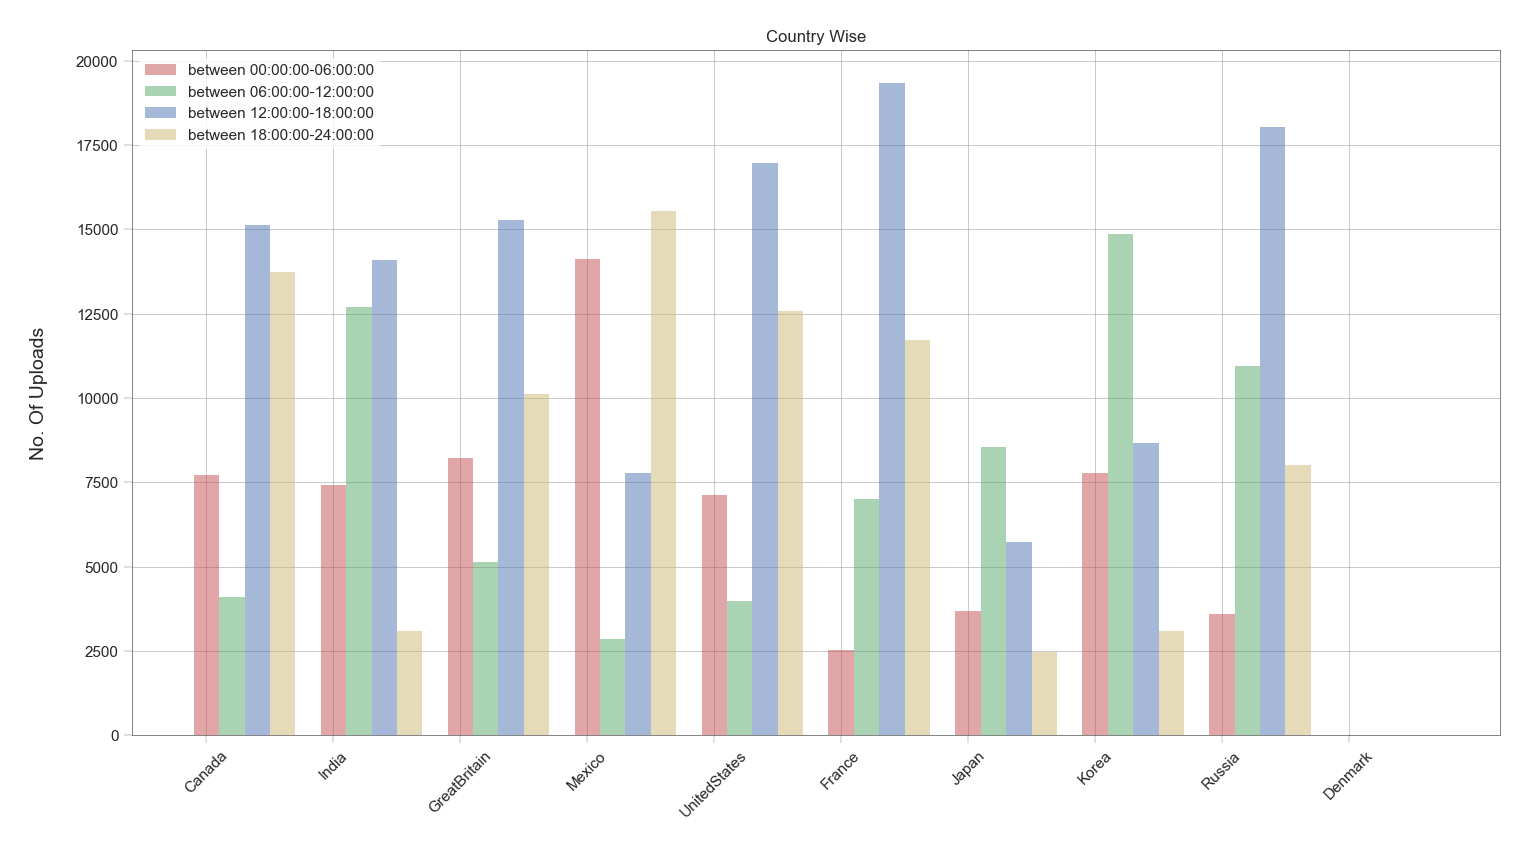

In [96]:
fig, ax = plt.subplots(figsize=(15,8)) 
index = np.arange(10) 
bar_width = 0.2
opacity = 0.5

rects1 = plt.bar(index, size1, bar_width, alpha=opacity, color='r', label='between 00:00:00-06:00:00')
rects2 = plt.bar(index + bar_width, size2, bar_width, alpha=opacity, color='g', label='between 06:00:00-12:00:00')
rects3 = plt.bar(index + 2*bar_width, size3, bar_width, alpha=opacity, color='b', label='between 12:00:00-18:00:00')
rects4 = plt.bar(index + 3*bar_width,size4 , bar_width, alpha=opacity, color='y', label='between 18:00:00-24:00:00')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia','Denmark'), rotation=45)
plt.ylabel('No. Of Uploads')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

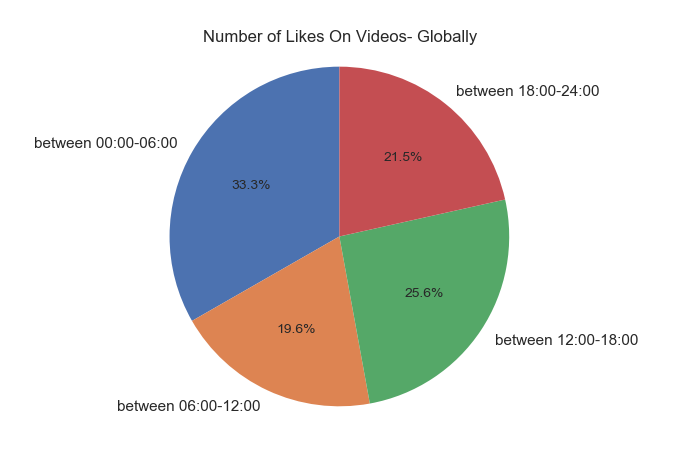

In [97]:
l = d1['likes'].mean()
w = d2['likes'].mean()
e = d3['likes'].mean()
r = d4['likes'].mean()
a = (l,w,e,r)
fig1, ax1 = plt.subplots() 
ax1.pie(a, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of Likes On Videos- Globally')
plt.show()

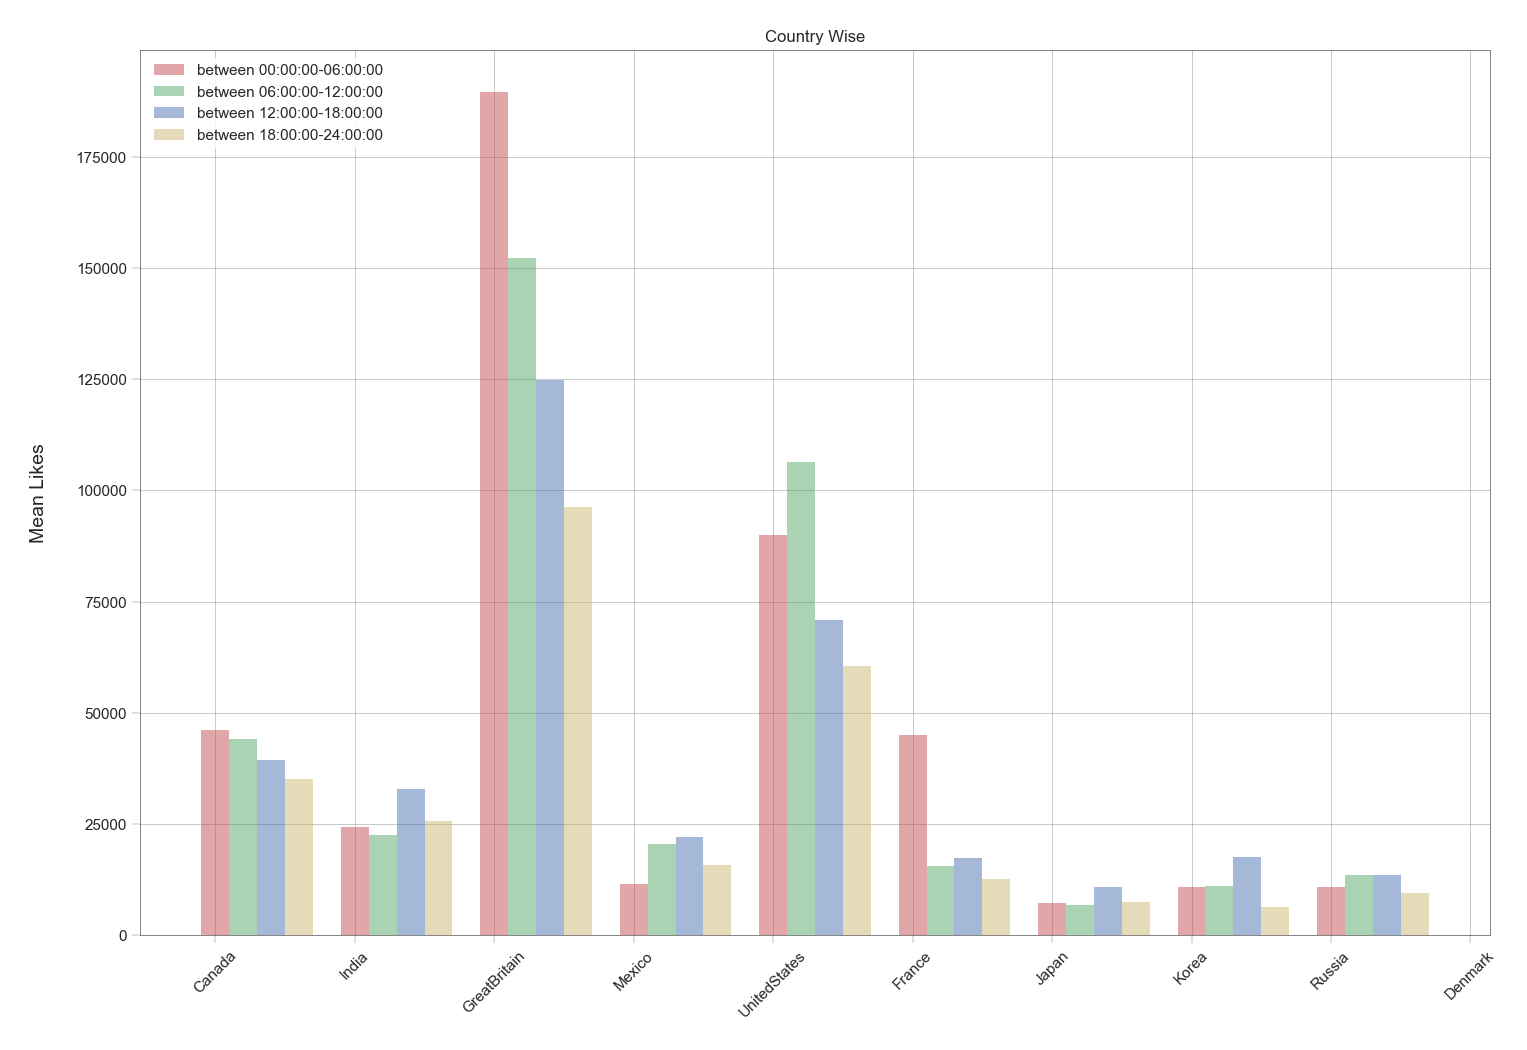

In [98]:
a1 =ca[(ca['publish_time']<'06:00:00')  & (ca['publish_time']>'00:00:00')]['likes'].mean();
b1 = ind[(ind['publish_time']<'06:00:00')  & (ind['publish_time']>'00:00:00')]['likes'].mean();
c1 =gb[(gb['publish_time']<'06:00:00')  & (gb['publish_time']>'00:00:00')]['likes'].mean()
d11 =mex[(mex['publish_time']<'06:00:00')  & (mex['publish_time']>'00:00:00')]['likes'].mean()
e1 = us[(us['publish_time']<'06:00:00')  & (us['publish_time']>'00:00:00')]['likes'].mean()
f1 = fr[(fr['publish_time']<'06:00:00')  & (fr['publish_time']>'00:00:00')]['likes'].mean()
g1 = jpn[(jpn['publish_time']<'06:00:00')  & (jpn['publish_time']>'00:00:00')]['likes'].mean()
h1 =kr[(kr['publish_time']<'06:00:00')  & (kr['publish_time']>'00:00:00')]['likes'].mean()
i1 =ru[(ru['publish_time']<'06:00:00')  & (ru['publish_time']>'00:00:00')]['likes'].mean()
j1 = ger[(ger['publish_time']<'06:00:00')  & (ger['publish_time']>'00:00:00')]['likes'].mean()

ans1 = (a1,b1, c1, d11, e1, f1 , g1, h1 , i1, j1)


a2=ca[(ca['publish_time']<'12:00:00')  & (ca['publish_time']>'06:00:00')]['likes'].mean()
b2=ind[(ind['publish_time']<'12:00:00')  & (ind['publish_time']>'06:00:00')]['likes'].mean()
c2=gb[(gb['publish_time']<'12:00:00')  & (gb['publish_time']>'06:00:00')]['likes'].mean()
d22=mex[(mex['publish_time']<'12:00:00')  & (mex['publish_time']>'06:00:00')]['likes'].mean()
e2=us[(us['publish_time']<'12:00:00')  & (us['publish_time']>'06:00:00')]['likes'].mean()
f2=fr[(fr['publish_time']<'12:00:00')  & (fr['publish_time']>'06:00:00')]['likes'].mean()
g2=jpn[(jpn['publish_time']<'12:00:00')  & (jpn['publish_time']>'06:00:00')]['likes'].mean()
h2=kr[(kr['publish_time']<'12:00:00')  & (kr['publish_time']>'06:00:00')]['likes'].mean()
i2=ru[(ru['publish_time']<'12:00:00')  & (ru['publish_time']>'06:00:00')]['likes'].mean()
j2=ger[(ger['publish_time']<'12:00:00')  & (ger['publish_time']>'06:00:00')]['likes'].mean()

ans2 = (a2,b2, c2, d22, e2, f2 , g2, h2 , i2, j2)


a3=ca[(ca['publish_time']<'18:00:00')  & (ca['publish_time']>'12:00:00')]['likes'].mean()
b3=ind[(ind['publish_time']<'18:00:00')  & (ind['publish_time']>'12:00:00')]['likes'].mean()
c3=gb[(gb['publish_time']<'18:00:00')  & (gb['publish_time']>'12:00:00')]['likes'].mean()
d33=mex[(mex['publish_time']<'18:00:00')  & (mex['publish_time']>'12:00:00')]['likes'].mean()
e3=us[(us['publish_time']<'18:00:00')  & (us['publish_time']>'12:00:00')]['likes'].mean()
f3=fr[(fr['publish_time']<'18:00:00')  & (fr['publish_time']>'12:00:00')]['likes'].mean()
g3=jpn[(jpn['publish_time']<'18:00:00')  & (jpn['publish_time']>'12:00:00')]['likes'].mean()
h3=kr[(kr['publish_time']<'18:00:00')  & (kr['publish_time']>'12:00:00')]['likes'].mean()
i3=ru[(ru['publish_time']<'18:00:00')  & (ru['publish_time']>'12:00:00')]['likes'].mean()
j3=ger[(ger['publish_time']<'18:00:00')  & (ger['publish_time']>'12:00:00')]['likes'].mean()

ans3 = (a3,b3, c3, d33, e3, f3 , g3, h3 , i3, j3)


a4=ca[(ca['publish_time']<'24:00:00')  & (ca['publish_time']>'18:00:00')]['likes'].mean()
b4=ind[(ind['publish_time']<'24:00:00')  & (ind['publish_time']>'18:00:00')]['likes'].mean()
c4=gb[(gb['publish_time']<'24:00:00')  & (gb['publish_time']>'18:00:00')]['likes'].mean()
d44=mex[(mex['publish_time']<'24:00:00')  & (mex['publish_time']>'18:00:00')]['likes'].mean()
e4=us[(us['publish_time']<'24:00:00')  & (us['publish_time']>'18:00:00')]['likes'].mean()
f4=fr[(fr['publish_time']<'24:00:00')  & (fr['publish_time']>'18:00:00')]['likes'].mean()
g4=jpn[(jpn['publish_time']<'24:00:00')  & (jpn['publish_time']>'18:00:00')]['likes'].mean()
h4=kr[(kr['publish_time']<'24:00:00')  & (kr['publish_time']>'18:00:00')]['likes'].mean()
i4=ru[(ru['publish_time']<'24:00:00')  & (ru['publish_time']>'18:00:00')]['likes'].mean()
j4=ger[(ger['publish_time']<'24:00:00')  & (ger['publish_time']>'18:00:00')]['likes'].mean()

ans4 = (a4,b4, c4, d44, e4, f4 , g4, h4, i4, j4)

fig, ax = plt.subplots(figsize=(15,10)) 
index = np.arange(10) 
bar_width = 0.2
opacity = 0.5
rects1 = plt.bar(index, ans1, bar_width, alpha=opacity, color='r', label='between 00:00:00-06:00:00')
rects2 = plt.bar(index + bar_width, ans2, bar_width, alpha=opacity, color='g', label='between 06:00:00-12:00:00')
rects3 = plt.bar(index + 2*bar_width, ans3, bar_width, alpha=opacity, color='b', label='between 12:00:00-18:00:00')
rects4 = plt.bar(index + 3*bar_width,ans4 , bar_width, alpha=opacity, color='y', label='between 18:00:00-24:00:00')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia','Denmark'), rotation=45)
plt.ylabel('Mean Likes')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

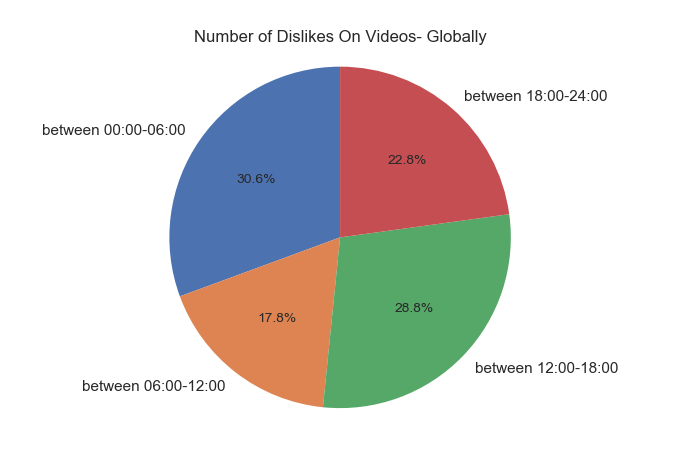

In [99]:
l = d1['dislikes'].mean()
w = d2['dislikes'].mean()
e = d3['dislikes'].mean()
r = d4['dislikes'].mean()
a = (l,w,e,r)
fig1, ax1 = plt.subplots() 
ax1.pie(a, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of Dislikes On Videos- Globally')
plt.show()

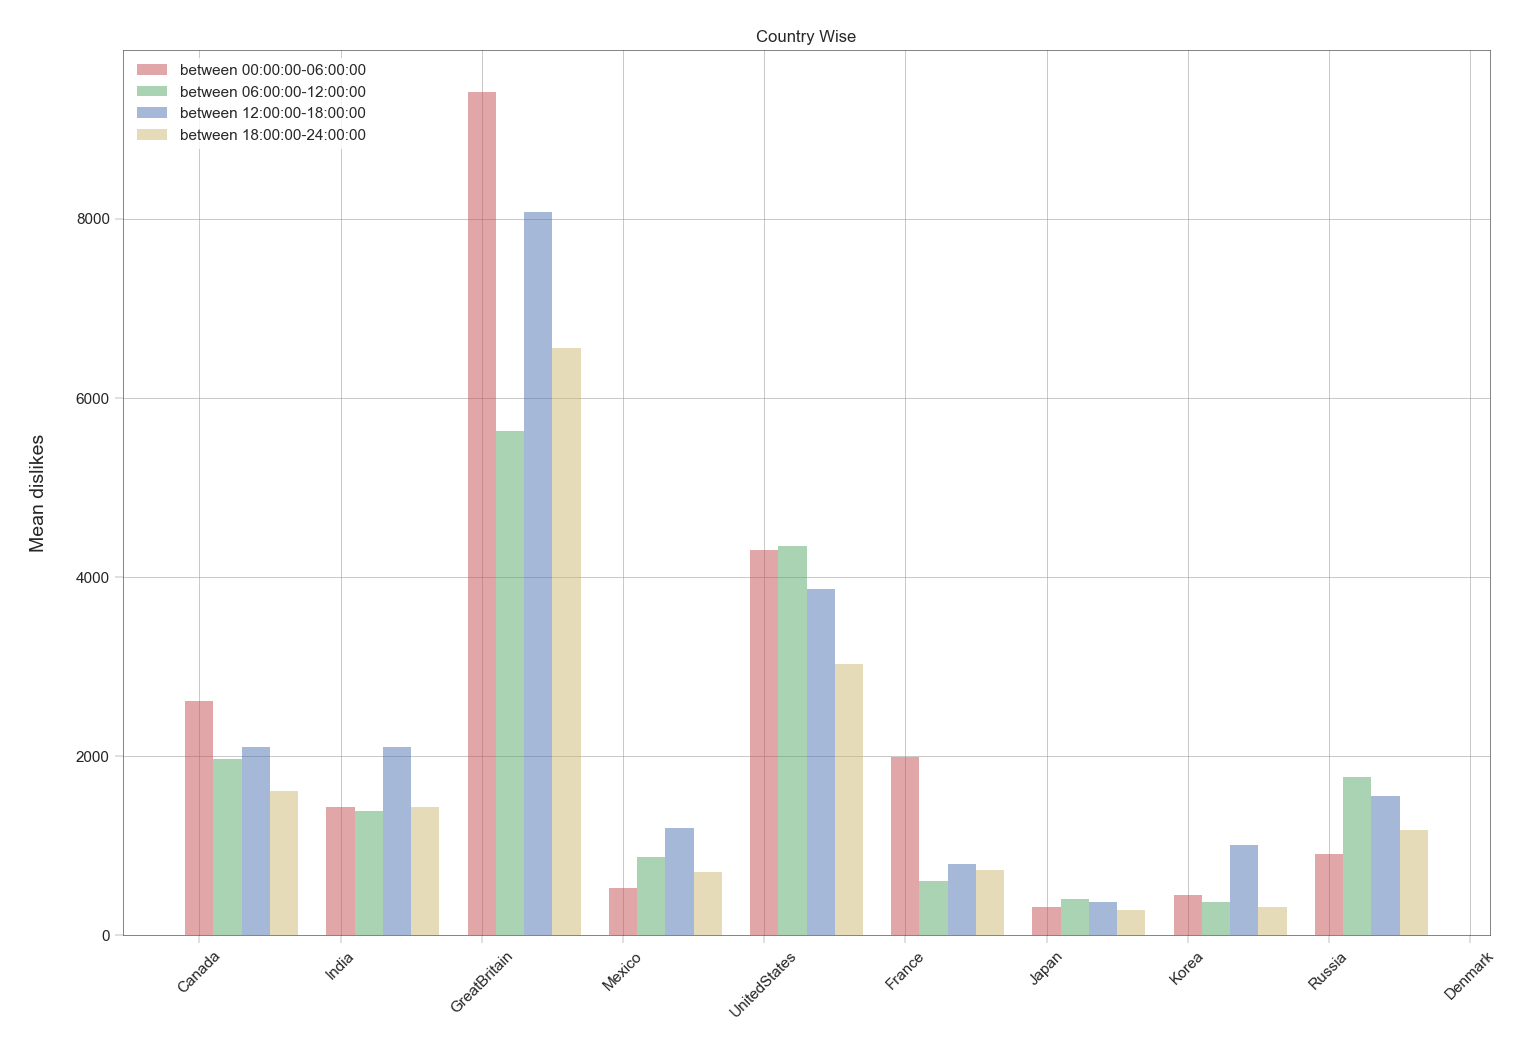

In [100]:
a1 =ca[(ca['publish_time']<'06:00:00')  & (ca['publish_time']>'00:00:00')]['dislikes'].mean();
b1 = ind[(ind['publish_time']<'06:00:00')  & (ind['publish_time']>'00:00:00')]['dislikes'].mean();
c1 =gb[(gb['publish_time']<'06:00:00')  & (gb['publish_time']>'00:00:00')]['dislikes'].mean()
d11 =mex[(mex['publish_time']<'06:00:00')  & (mex['publish_time']>'00:00:00')]['dislikes'].mean()
e1 = us[(us['publish_time']<'06:00:00')  & (us['publish_time']>'00:00:00')]['dislikes'].mean()
f1 = fr[(fr['publish_time']<'06:00:00')  & (fr['publish_time']>'00:00:00')]['dislikes'].mean()
g1 = jpn[(jpn['publish_time']<'06:00:00')  & (jpn['publish_time']>'00:00:00')]['dislikes'].mean()
h1 =kr[(kr['publish_time']<'06:00:00')  & (kr['publish_time']>'00:00:00')]['dislikes'].mean()
i1 =ru[(ru['publish_time']<'06:00:00')  & (ru['publish_time']>'00:00:00')]['dislikes'].mean()
j1 = ger[(ger['publish_time']<'06:00:00')  & (ger['publish_time']>'00:00:00')]['dislikes'].mean()

ans1 = (a1,b1, c1, d11, e1, f1 , g1, h1 , i1, j1)


a2=ca[(ca['publish_time']<'12:00:00')  & (ca['publish_time']>'06:00:00')]['dislikes'].mean()
b2=ind[(ind['publish_time']<'12:00:00')  & (ind['publish_time']>'06:00:00')]['dislikes'].mean()
c2=gb[(gb['publish_time']<'12:00:00')  & (gb['publish_time']>'06:00:00')]['dislikes'].mean()
d22=mex[(mex['publish_time']<'12:00:00')  & (mex['publish_time']>'06:00:00')]['dislikes'].mean()
e2=us[(us['publish_time']<'12:00:00')  & (us['publish_time']>'06:00:00')]['dislikes'].mean()
f2=fr[(fr['publish_time']<'12:00:00')  & (fr['publish_time']>'06:00:00')]['dislikes'].mean()
g2=jpn[(jpn['publish_time']<'12:00:00')  & (jpn['publish_time']>'06:00:00')]['dislikes'].mean()
h2=kr[(kr['publish_time']<'12:00:00')  & (kr['publish_time']>'06:00:00')]['dislikes'].mean()
i2=ru[(ru['publish_time']<'12:00:00')  & (ru['publish_time']>'06:00:00')]['dislikes'].mean()
j2=ger[(ger['publish_time']<'12:00:00')  & (ger['publish_time']>'06:00:00')]['dislikes'].mean()

ans2 = (a2,b2, c2, d22, e2, f2 , g2, h2 , i2, j2)


a3=ca[(ca['publish_time']<'18:00:00')  & (ca['publish_time']>'12:00:00')]['dislikes'].mean()
b3=ind[(ind['publish_time']<'18:00:00')  & (ind['publish_time']>'12:00:00')]['dislikes'].mean()
c3=gb[(gb['publish_time']<'18:00:00')  & (gb['publish_time']>'12:00:00')]['dislikes'].mean()
d33=mex[(mex['publish_time']<'18:00:00')  & (mex['publish_time']>'12:00:00')]['dislikes'].mean()
e3=us[(us['publish_time']<'18:00:00')  & (us['publish_time']>'12:00:00')]['dislikes'].mean()
f3=fr[(fr['publish_time']<'18:00:00')  & (fr['publish_time']>'12:00:00')]['dislikes'].mean()
g3=jpn[(jpn['publish_time']<'18:00:00')  & (jpn['publish_time']>'12:00:00')]['dislikes'].mean()
h3=kr[(kr['publish_time']<'18:00:00')  & (kr['publish_time']>'12:00:00')]['dislikes'].mean()
i3=ru[(ru['publish_time']<'18:00:00')  & (ru['publish_time']>'12:00:00')]['dislikes'].mean()
j3=ger[(ger['publish_time']<'18:00:00')  & (ger['publish_time']>'12:00:00')]['dislikes'].mean()

ans3 = (a3,b3, c3, d33, e3, f3 , g3, h3 , i3, j3)


a4=ca[(ca['publish_time']<'24:00:00')  & (ca['publish_time']>'18:00:00')]['dislikes'].mean()
b4=ind[(ind['publish_time']<'24:00:00')  & (ind['publish_time']>'18:00:00')]['dislikes'].mean()
c4=gb[(gb['publish_time']<'24:00:00')  & (gb['publish_time']>'18:00:00')]['dislikes'].mean()
d44=mex[(mex['publish_time']<'24:00:00')  & (mex['publish_time']>'18:00:00')]['dislikes'].mean()
e4=us[(us['publish_time']<'24:00:00')  & (us['publish_time']>'18:00:00')]['dislikes'].mean()
f4=fr[(fr['publish_time']<'24:00:00')  & (fr['publish_time']>'18:00:00')]['dislikes'].mean()
g4=jpn[(jpn['publish_time']<'24:00:00')  & (jpn['publish_time']>'18:00:00')]['dislikes'].mean()
h4=kr[(kr['publish_time']<'24:00:00')  & (kr['publish_time']>'18:00:00')]['dislikes'].mean()
i4=ru[(ru['publish_time']<'24:00:00')  & (ru['publish_time']>'18:00:00')]['dislikes'].mean()
j4=ger[(ger['publish_time']<'24:00:00')  & (ger['publish_time']>'18:00:00')]['dislikes'].mean()

ans4 = (a4,b4, c4, d44, e4, f4 , g4, h4, i4, j4)

fig, ax = plt.subplots(figsize=(15,10)) 
index = np.arange(10) 
bar_width = 0.2
opacity = 0.5
rects1 = plt.bar(index, ans1, bar_width, alpha=opacity, color='r', label='between 00:00:00-06:00:00')
rects2 = plt.bar(index + bar_width, ans2, bar_width, alpha=opacity, color='g', label='between 06:00:00-12:00:00')
rects3 = plt.bar(index + 2*bar_width, ans3, bar_width, alpha=opacity, color='b', label='between 12:00:00-18:00:00')
rects4 = plt.bar(index + 3*bar_width,ans4 , bar_width, alpha=opacity, color='y', label='between 18:00:00-24:00:00')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia','Denmark'), rotation=45)
plt.ylabel('Mean dislikes')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

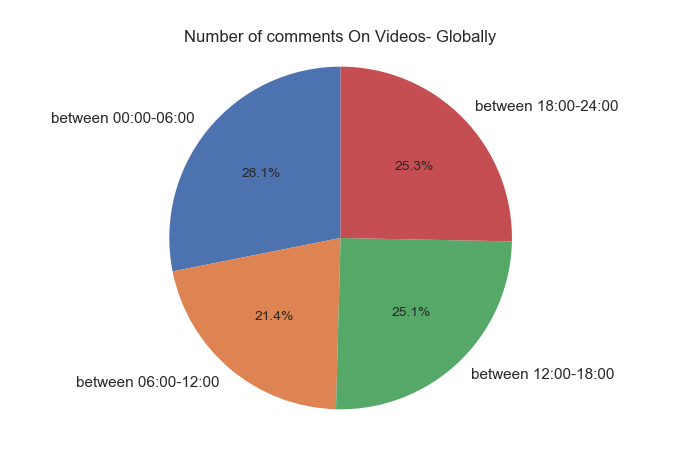

In [101]:
l = d1['comment_count'].mean()
w = d2['comment_count'].mean()
p=  d3['comment_count'].mean()
k = d4['comment_count'].mean()
n = (l,w,p,k)
fig1, ax1 = plt.subplots() 
ax1.pie(n, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.title('Number of comments On Videos- Globally')
plt.show()

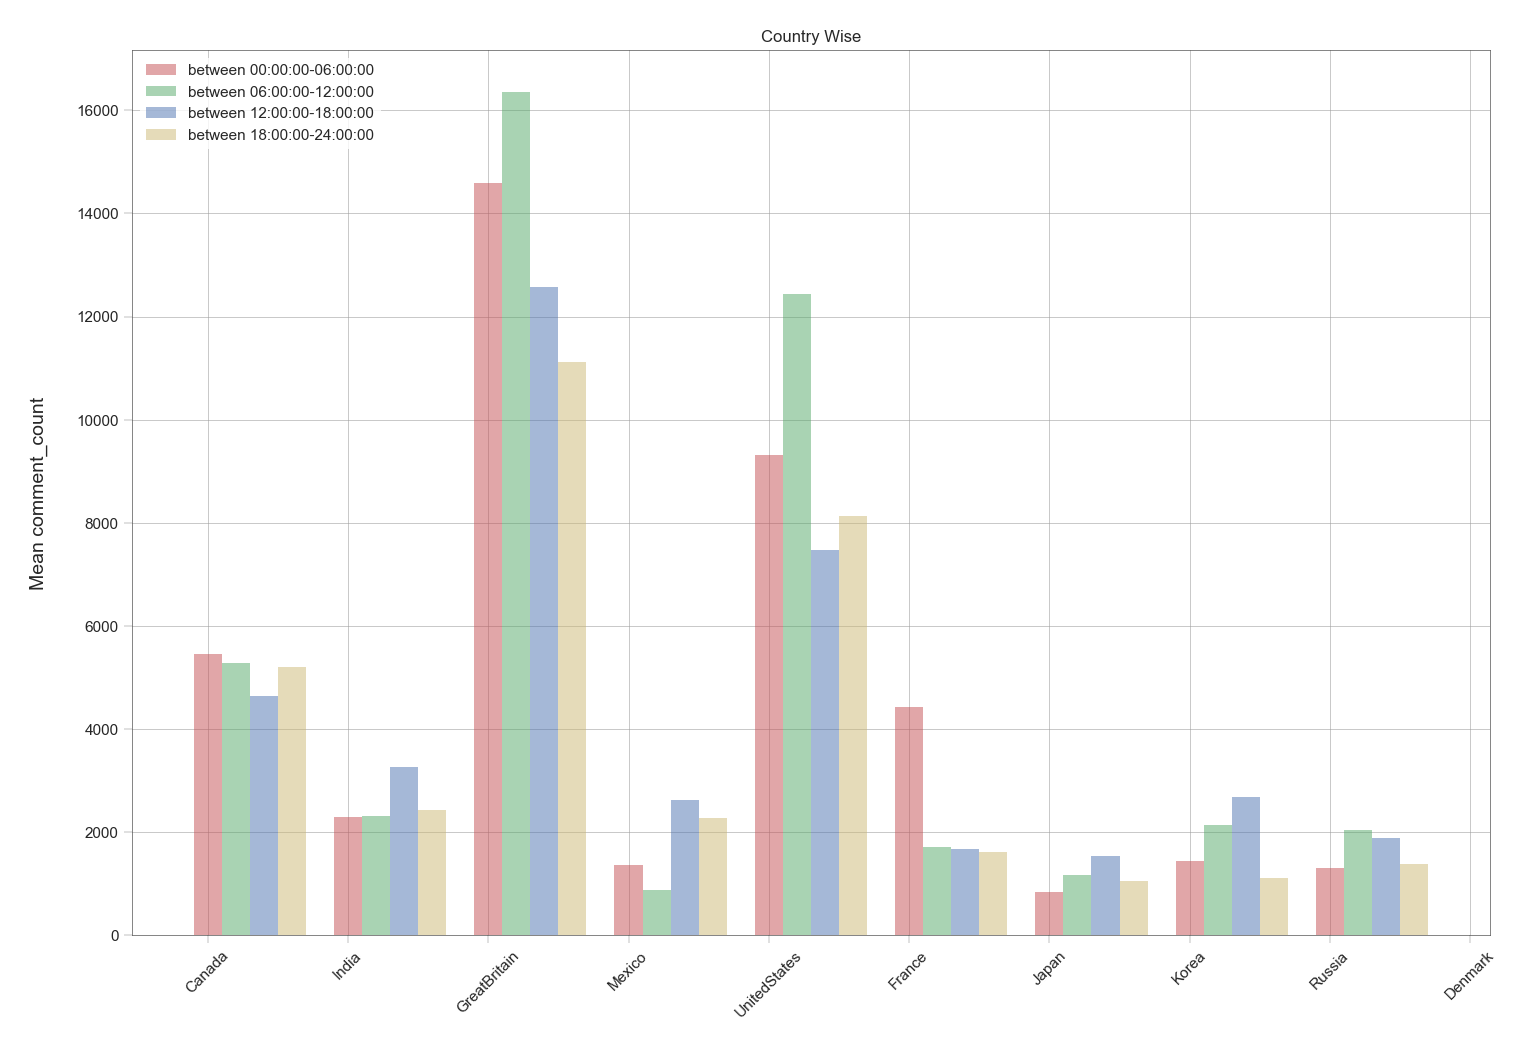

In [102]:
a1 =ca[(ca['publish_time']<'06:00:00')  & (ca['publish_time']>'00:00:00')]['comment_count'].mean();
b1 = ind[(ind['publish_time']<'06:00:00')  & (ind['publish_time']>'00:00:00')]['comment_count'].mean();
c1 =gb[(gb['publish_time']<'06:00:00')  & (gb['publish_time']>'00:00:00')]['comment_count'].mean()
d11 =mex[(mex['publish_time']<'06:00:00')  & (mex['publish_time']>'00:00:00')]['comment_count'].mean()
e1 = us[(us['publish_time']<'06:00:00')  & (us['publish_time']>'00:00:00')]['comment_count'].mean()
f1 = fr[(fr['publish_time']<'06:00:00')  & (fr['publish_time']>'00:00:00')]['comment_count'].mean()
g1 = jpn[(jpn['publish_time']<'06:00:00')  & (jpn['publish_time']>'00:00:00')]['comment_count'].mean()
h1 =kr[(kr['publish_time']<'06:00:00')  & (kr['publish_time']>'00:00:00')]['comment_count'].mean()
i1 =ru[(ru['publish_time']<'06:00:00')  & (ru['publish_time']>'00:00:00')]['comment_count'].mean()
j1 = ger[(ger['publish_time']<'06:00:00')  & (ger['publish_time']>'00:00:00')]['comment_count'].mean()

ans1 = (a1,b1, c1, d11, e1, f1 , g1, h1 , i1, j1)


a2=ca[(ca['publish_time']<'12:00:00')  & (ca['publish_time']>'06:00:00')]['comment_count'].mean()
b2=ind[(ind['publish_time']<'12:00:00')  & (ind['publish_time']>'06:00:00')]['comment_count'].mean()
c2=gb[(gb['publish_time']<'12:00:00')  & (gb['publish_time']>'06:00:00')]['comment_count'].mean()
d2=mex[(mex['publish_time']<'12:00:00')  & (mex['publish_time']>'06:00:00')]['comment_count'].mean()
e2=us[(us['publish_time']<'12:00:00')  & (us['publish_time']>'06:00:00')]['comment_count'].mean()
f2=fr[(fr['publish_time']<'12:00:00')  & (fr['publish_time']>'06:00:00')]['comment_count'].mean()
g2=jpn[(jpn['publish_time']<'12:00:00')  & (jpn['publish_time']>'06:00:00')]['comment_count'].mean()
h2=kr[(kr['publish_time']<'12:00:00')  & (kr['publish_time']>'06:00:00')]['comment_count'].mean()
i2=ru[(ru['publish_time']<'12:00:00')  & (ru['publish_time']>'06:00:00')]['comment_count'].mean()
j2=ger[(ger['publish_time']<'12:00:00')  & (ger['publish_time']>'06:00:00')]['comment_count'].mean()

ans2 = (a2,b2, c2, d22, e2, f2 , g2, h2 , i2, j2)


a3=ca[(ca['publish_time']<'18:00:00')  & (ca['publish_time']>'12:00:00')]['comment_count'].mean()
b3=ind[(ind['publish_time']<'18:00:00')  & (ind['publish_time']>'12:00:00')]['comment_count'].mean()
c3=gb[(gb['publish_time']<'18:00:00')  & (gb['publish_time']>'12:00:00')]['comment_count'].mean()
d33=mex[(mex['publish_time']<'18:00:00')  & (mex['publish_time']>'12:00:00')]['comment_count'].mean()
e3=us[(us['publish_time']<'18:00:00')  & (us['publish_time']>'12:00:00')]['comment_count'].mean()
f3=fr[(fr['publish_time']<'18:00:00')  & (fr['publish_time']>'12:00:00')]['comment_count'].mean()
g3=jpn[(jpn['publish_time']<'18:00:00')  & (jpn['publish_time']>'12:00:00')]['comment_count'].mean()
h3=kr[(kr['publish_time']<'18:00:00')  & (kr['publish_time']>'12:00:00')]['comment_count'].mean()
i3=ru[(ru['publish_time']<'18:00:00')  & (ru['publish_time']>'12:00:00')]['comment_count'].mean()
j3=ger[(ger['publish_time']<'18:00:00')  & (ger['publish_time']>'12:00:00')]['comment_count'].mean()

ans3 = (a3,b3, c3, d33, e3, f3 , g3, h3 , i3, j3)


a4=ca[(ca['publish_time']<'24:00:00')  & (ca['publish_time']>'18:00:00')]['comment_count'].mean()
b4=ind[(ind['publish_time']<'24:00:00')  & (ind['publish_time']>'18:00:00')]['comment_count'].mean()
c4=gb[(gb['publish_time']<'24:00:00')  & (gb['publish_time']>'18:00:00')]['comment_count'].mean()
d44=mex[(mex['publish_time']<'24:00:00')  & (mex['publish_time']>'18:00:00')]['comment_count'].mean()
e4=us[(us['publish_time']<'24:00:00')  & (us['publish_time']>'18:00:00')]['comment_count'].mean()
f4=fr[(fr['publish_time']<'24:00:00')  & (fr['publish_time']>'18:00:00')]['comment_count'].mean()
g4=jpn[(jpn['publish_time']<'24:00:00')  & (jpn['publish_time']>'18:00:00')]['comment_count'].mean()
h4=kr[(kr['publish_time']<'24:00:00')  & (kr['publish_time']>'18:00:00')]['comment_count'].mean()
i4=ru[(ru['publish_time']<'24:00:00')  & (ru['publish_time']>'18:00:00')]['comment_count'].mean()
j4=ger[(ger['publish_time']<'24:00:00')  & (ger['publish_time']>'18:00:00')]['comment_count'].mean()

ans4 = (a4,b4, c4, d44, e4, f4 , g4, h4, i4, j4)

fig, ax = plt.subplots(figsize=(15,10)) 
index = np.arange(10) 
bar_width = 0.2
opacity = 0.5
rects1 = plt.bar(index, ans1, bar_width, alpha=opacity, color='r', label='between 00:00:00-06:00:00')
rects2 = plt.bar(index + bar_width, ans2, bar_width, alpha=opacity, color='g', label='between 06:00:00-12:00:00')
rects3 = plt.bar(index + 2*bar_width, ans3, bar_width, alpha=opacity, color='b', label='between 12:00:00-18:00:00')
rects4 = plt.bar(index + 3*bar_width,ans4 , bar_width, alpha=opacity, color='y', label='between 18:00:00-24:00:00')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia','Denmark'), rotation=45)
plt.ylabel('Mean comment_count')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

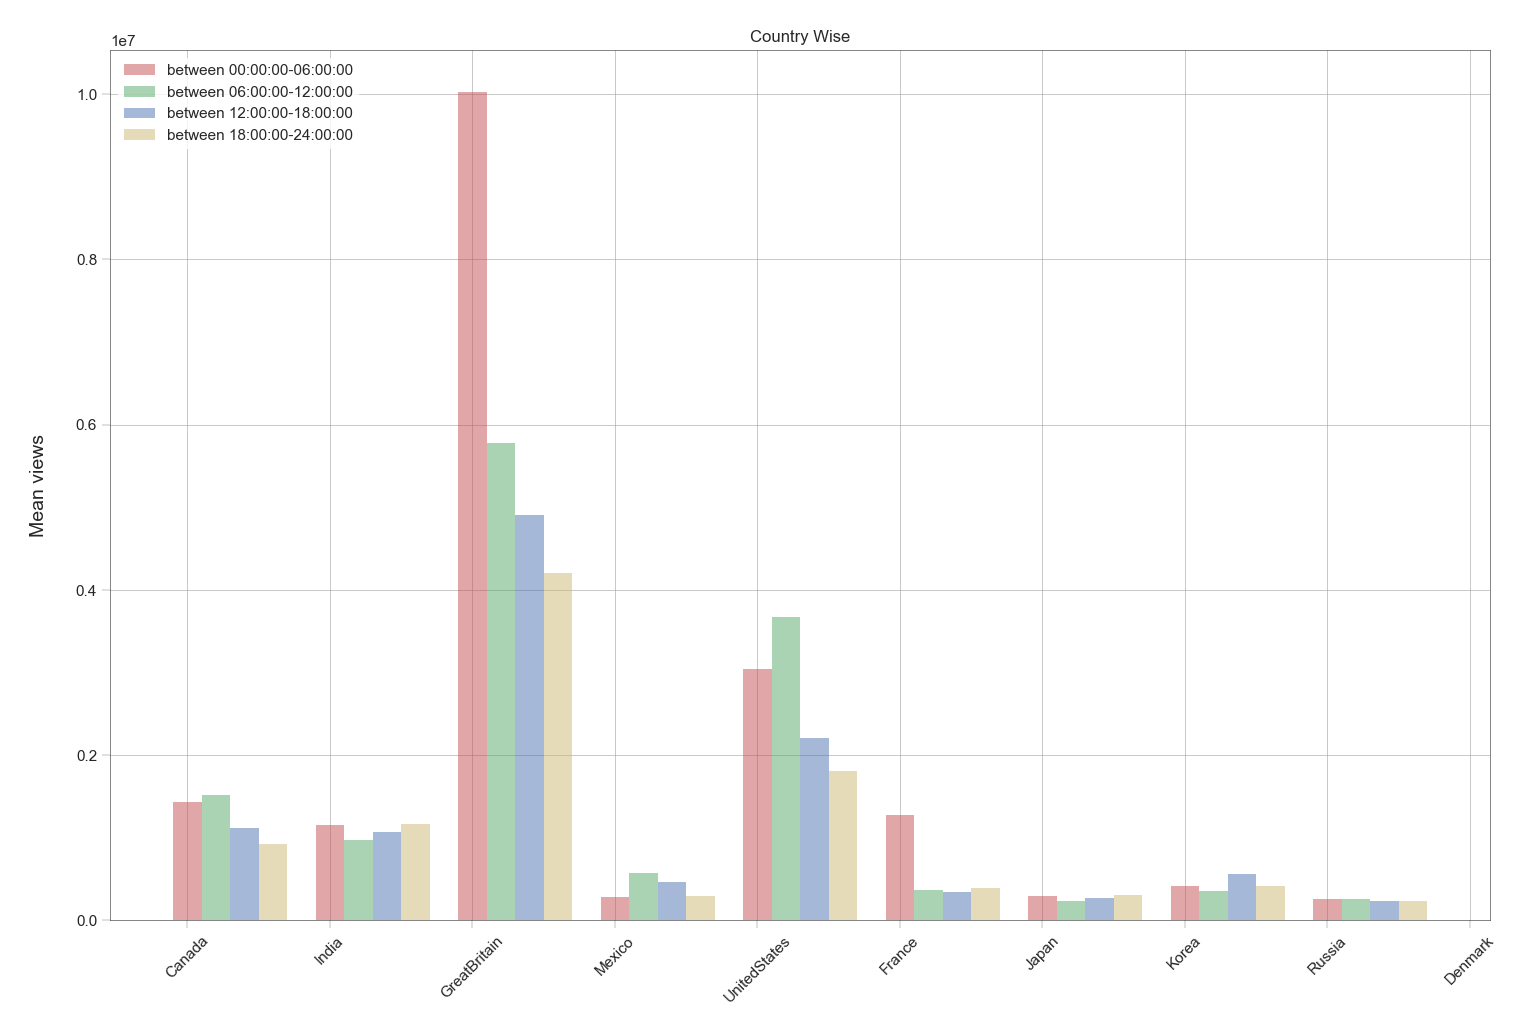

In [103]:
a1 =ca[(ca['publish_time']<'06:00:00')  & (ca['publish_time']>'00:00:00')]['views'].mean();
b1 = ind[(ind['publish_time']<'06:00:00')  & (ind['publish_time']>'00:00:00')]['views'].mean();
c1 =gb[(gb['publish_time']<'06:00:00')  & (gb['publish_time']>'00:00:00')]['views'].mean()
d11 =mex[(mex['publish_time']<'06:00:00')  & (mex['publish_time']>'00:00:00')]['views'].mean()
e1 = us[(us['publish_time']<'06:00:00')  & (us['publish_time']>'00:00:00')]['views'].mean()
f1 = fr[(fr['publish_time']<'06:00:00')  & (fr['publish_time']>'00:00:00')]['views'].mean()
g1 = jpn[(jpn['publish_time']<'06:00:00')  & (jpn['publish_time']>'00:00:00')]['views'].mean()
h1 =kr[(kr['publish_time']<'06:00:00')  & (kr['publish_time']>'00:00:00')]['views'].mean()
i1 =ru[(ru['publish_time']<'06:00:00')  & (ru['publish_time']>'00:00:00')]['views'].mean()
j1 = ger[(ger['publish_time']<'06:00:00')  & (ger['publish_time']>'00:00:00')]['views'].mean()

ans1 = (a1,b1, c1, d11, e1, f1 , g1, h1 , i1, j1)


a2=ca[(ca['publish_time']<'12:00:00')  & (ca['publish_time']>'06:00:00')]['views'].mean()
b2=ind[(ind['publish_time']<'12:00:00')  & (ind['publish_time']>'06:00:00')]['views'].mean()
c2=gb[(gb['publish_time']<'12:00:00')  & (gb['publish_time']>'06:00:00')]['views'].mean()
d22=mex[(mex['publish_time']<'12:00:00')  & (mex['publish_time']>'06:00:00')]['views'].mean()
e2=us[(us['publish_time']<'12:00:00')  & (us['publish_time']>'06:00:00')]['views'].mean()
f2=fr[(fr['publish_time']<'12:00:00')  & (fr['publish_time']>'06:00:00')]['views'].mean()
g2=jpn[(jpn['publish_time']<'12:00:00')  & (jpn['publish_time']>'06:00:00')]['views'].mean()
h2=kr[(kr['publish_time']<'12:00:00')  & (kr['publish_time']>'06:00:00')]['views'].mean()
i2=ru[(ru['publish_time']<'12:00:00')  & (ru['publish_time']>'06:00:00')]['views'].mean()
j2=ger[(ger['publish_time']<'12:00:00')  & (ger['publish_time']>'06:00:00')]['views'].mean()

ans2 = (a2,b2, c2, d22, e2, f2 , g2, h2 , i2, j2)


a3=ca[(ca['publish_time']<'18:00:00')  & (ca['publish_time']>'12:00:00')]['views'].mean()
b3=ind[(ind['publish_time']<'18:00:00')  & (ind['publish_time']>'12:00:00')]['views'].mean()
c3=gb[(gb['publish_time']<'18:00:00')  & (gb['publish_time']>'12:00:00')]['views'].mean()
d33=mex[(mex['publish_time']<'18:00:00')  & (mex['publish_time']>'12:00:00')]['views'].mean()
e3=us[(us['publish_time']<'18:00:00')  & (us['publish_time']>'12:00:00')]['views'].mean()
f3=fr[(fr['publish_time']<'18:00:00')  & (fr['publish_time']>'12:00:00')]['views'].mean()
g3=jpn[(jpn['publish_time']<'18:00:00')  & (jpn['publish_time']>'12:00:00')]['views'].mean()
h3=kr[(kr['publish_time']<'18:00:00')  & (kr['publish_time']>'12:00:00')]['views'].mean()
i3=ru[(ru['publish_time']<'18:00:00')  & (ru['publish_time']>'12:00:00')]['views'].mean()
j3=ger[(ger['publish_time']<'18:00:00')  & (ger['publish_time']>'12:00:00')]['views'].mean()

ans3 = (a3,b3, c3, d33, e3, f3 , g3, h3 , i3, j3)


a4=ca[(ca['publish_time']<'24:00:00')  & (ca['publish_time']>'18:00:00')]['views'].mean()
b4=ind[(ind['publish_time']<'24:00:00')  & (ind['publish_time']>'18:00:00')]['views'].mean()
c4=gb[(gb['publish_time']<'24:00:00')  & (gb['publish_time']>'18:00:00')]['views'].mean()
d44=mex[(mex['publish_time']<'24:00:00')  & (mex['publish_time']>'18:00:00')]['views'].mean()
e4=us[(us['publish_time']<'24:00:00')  & (us['publish_time']>'18:00:00')]['views'].mean()
f4=fr[(fr['publish_time']<'24:00:00')  & (fr['publish_time']>'18:00:00')]['views'].mean()
g4=jpn[(jpn['publish_time']<'24:00:00')  & (jpn['publish_time']>'18:00:00')]['views'].mean()
h4=kr[(kr['publish_time']<'24:00:00')  & (kr['publish_time']>'18:00:00')]['views'].mean()
i4=ru[(ru['publish_time']<'24:00:00')  & (ru['publish_time']>'18:00:00')]['views'].mean()
j4=ger[(ger['publish_time']<'24:00:00')  & (ger['publish_time']>'18:00:00')]['views'].mean()

ans4 = (a4,b4, c4, d44, e4, f4 , g4, h4, i4, j4)

fig, ax = plt.subplots(figsize=(15,10)) 
index = np.arange(10) 
bar_width = 0.2
opacity = 0.5
rects1 = plt.bar(index, ans1, bar_width, alpha=opacity, color='r', label='between 00:00:00-06:00:00')
rects2 = plt.bar(index + bar_width, ans2, bar_width, alpha=opacity, color='g', label='between 06:00:00-12:00:00')
rects3 = plt.bar(index + 2*bar_width, ans3, bar_width, alpha=opacity, color='b', label='between 12:00:00-18:00:00')
rects4 = plt.bar(index + 3*bar_width,ans4 , bar_width, alpha=opacity, color='y', label='between 18:00:00-24:00:00')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia','Denmark'), rotation=45)
plt.ylabel('Mean views')
plt.legend()
plt.tight_layout() 
plt.title("Country Wise")
plt.show()

In [104]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]

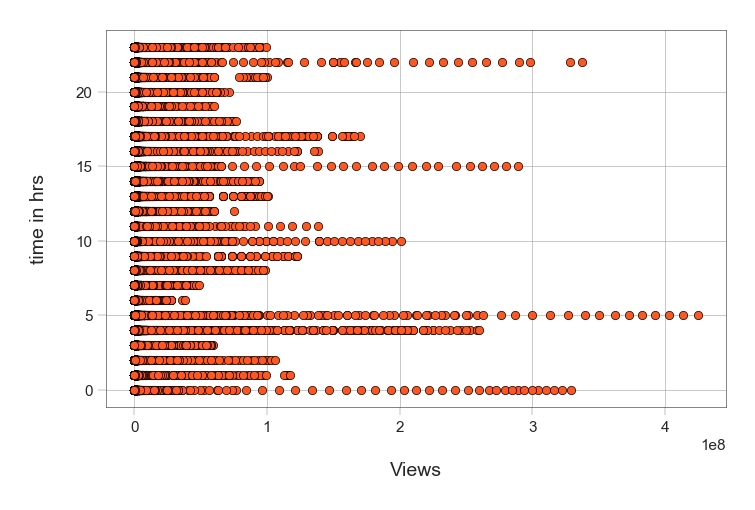

In [105]:
fig, ax = plt.subplots()
_ = ax.scatter(x=data['views'], y=data['hour'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=.5)
_ = ax.set(xlabel="Views", ylabel="time in hrs")

# How long does it take for a video to get Trending from the time it gets published?

In [106]:
data = pd.read_csv("YoutubeData.csv")

In [107]:
data['publish_date']=pd.to_datetime(data['publish_date'],format='%Y-%m-%d')
data['trending_date']=pd.to_datetime(data['trending_date'],format='%Y-%m-%d')
data['timetotrend'] = (data['trending_date']-data['publish_date']).dt.days

ca = data[data['region']=="Canada"]
ind = data[data['region']=="India"]
gb = data[data['region']=="Great Britan"]
dm = data[data['region']=="Denmark"]
mex = data[data['region']=="Mexico"]
us = data[data['region']=="United States"]
fr = data[data['region']=="France"]
jpn = data[data['region']=="Japan"]
kr = data[data['region']=="South Korea"]
ru = data[data['region']=="Russia"]

# Time taken to trend Histogram

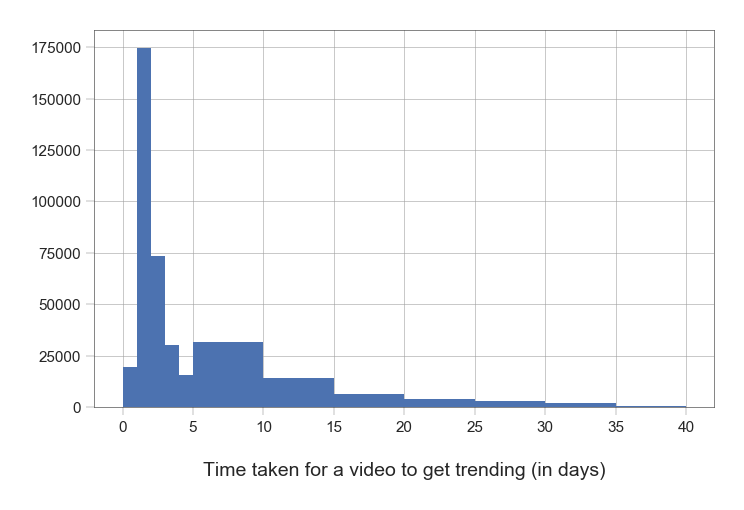

In [108]:
plt.hist(data['timetotrend'],bins=[0,1,2,3,4,5,10,15,20,25,30,35,40])
plt.xlabel('Time taken for a video to get trending (in days)')


plt.show()

# How does time taken for a to get trending vary across countries?

(3.4814950710599057, 2.087465195973442, 36.76292527495118, 1.8503183153770812, 1.9215594175669328, 16.810422720945567, 2.800952755132109, 1.4188958729230619, 2.648797986518934, 2.2469132772036624)


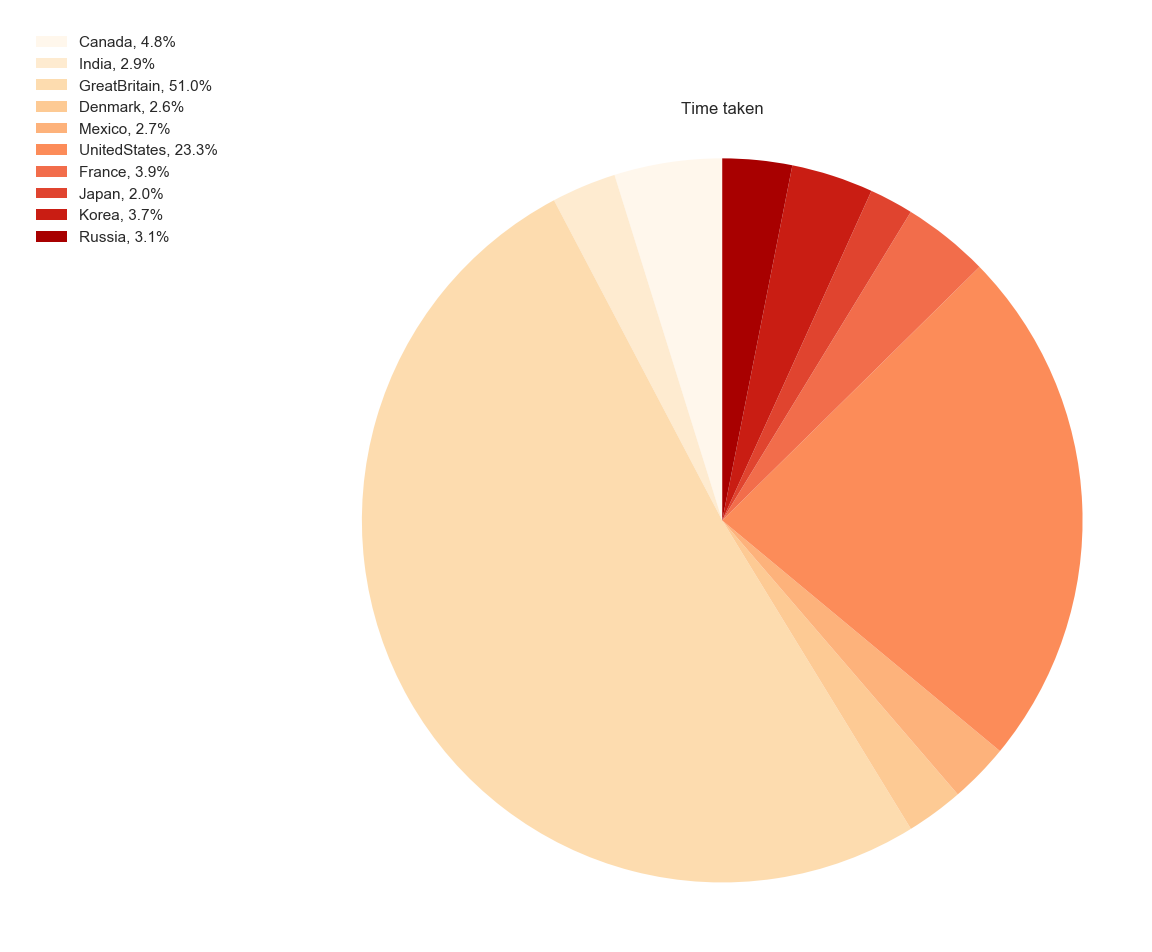

In [109]:
ttca =(ca['timetotrend']).mean()
ttind =(ind['timetotrend']).mean()
ttgb = (gb['timetotrend']).mean()
ttdm = (dm['timetotrend']).mean()
ttmex =(mex['timetotrend']).mean()
ttus = (us['timetotrend']).mean()
ttfr = (fr['timetotrend']).mean()
ttjpn = (jpn['timetotrend']).mean()
ttkr = (kr['timetotrend']).mean()
ttru = (ru['timetotrend']).mean()
db0 = (ttca,ttind,ttgb,ttdm,ttmex,ttus,ttfr,ttjpn,ttkr,ttru)
print(db0)


fig1, ax1 = plt.subplots(figsize=(10,10))

labels1=['Canada', 'India', 'GreatBritain', 'Denmark', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea','Russia']
fig1.subplots_adjust(0.3,0.1,1.1,0.9)
theme2 = plt.get_cmap('OrRd')
ax1.set_prop_cycle("color", [theme2(1. * i / len(db0)) for i in range(len(db0))])

_, _ = ax1.pie(db0, startangle=90)

ax1.axis('equal') 
total2 = sum(db0)
plt.legend(
    loc='upper left',
   labels=['%s, %1.1f%%' % (
        l, (float(s) / total2) * 100) for l, s in zip(labels1, db0)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

 
plt.title('Time taken') 
plt.show()

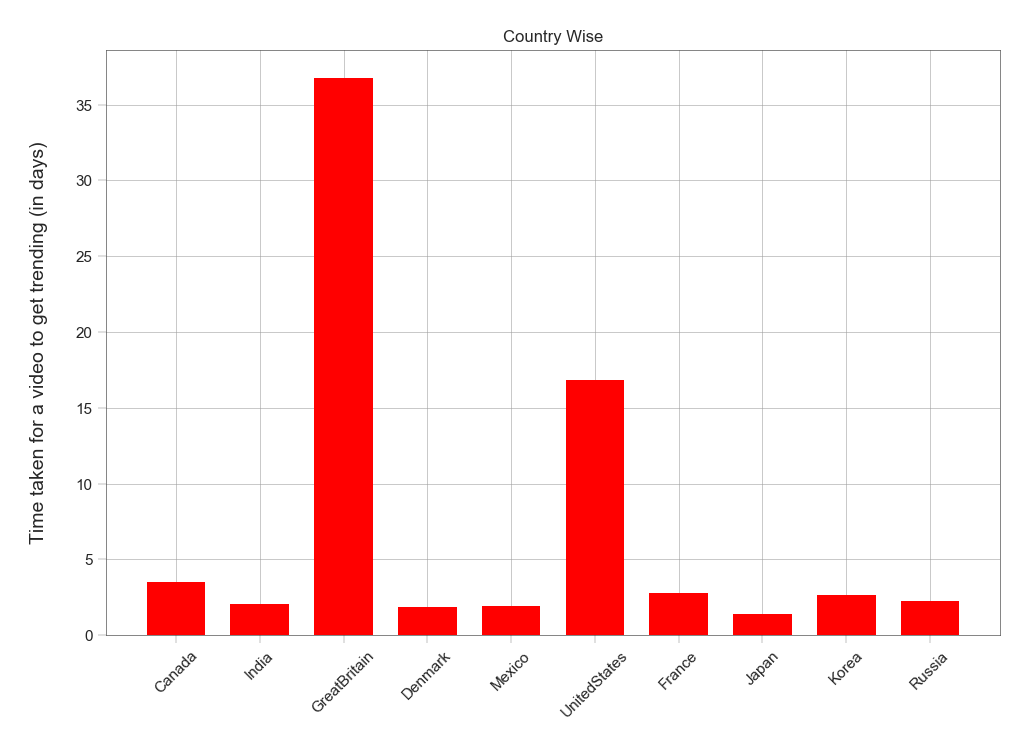

In [110]:
fig, ax = plt.subplots(figsize=(10,7)) 
index = np.arange(10) 
bar_width = 0.7 
opacity = 1

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='red')
plt.xticks(index, ('Canada', 'India', 'GreatBritain', 'Denmark', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=45)
plt.ylabel('Time taken for a video to get trending (in days)')

plt.tight_layout() 
plt.title("Country Wise")
plt.show()

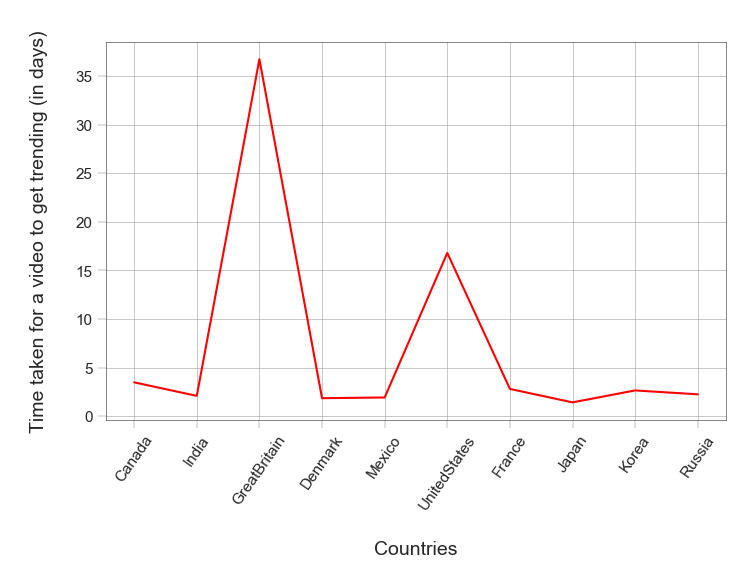

In [111]:
plt.grid(True)
plt.plot(labels1,db0, color='red')
plt.xlabel('Countries')
index = np.arange(10) 
plt.xticks(index,('Canada', 'India', 'GreatBritain', 'Denmark', 'Mexico', 'UnitedStates', 'France', 'Japan', 'Korea', 'Russia'), rotation=55)
plt.ylabel('Time taken for a video to get trending (in days)')
plt.show()

# How does time taken for a to get trending vary across categories?

In [112]:
data = data[data['category_name'].notna()]

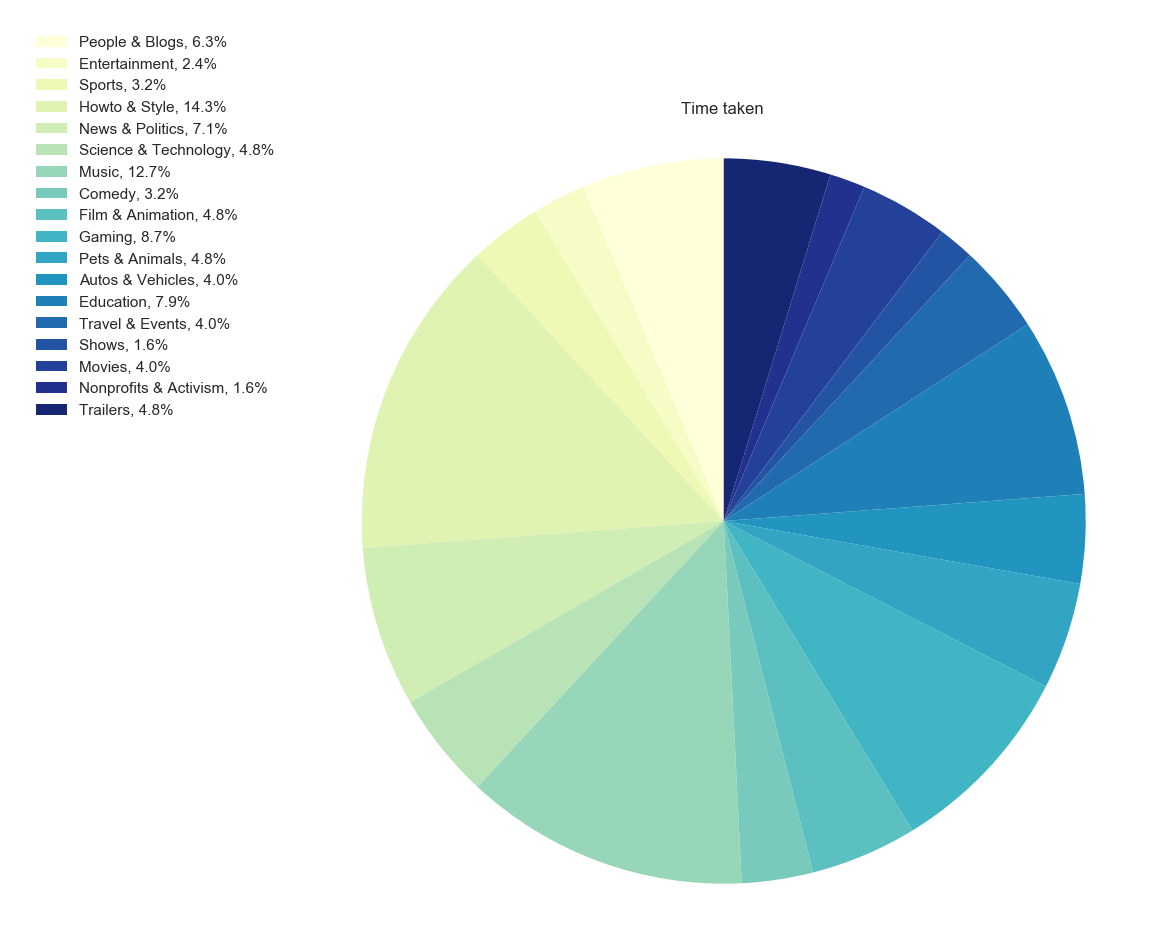

In [113]:
unique_categories=pd.unique(data['category_name'])
db0=[]
for x in unique_categories:
    newdata=data[data['category_name']==x]
    y=((newdata['trending_date'])-(newdata['publish_date'])).mean().days
    db0.append(y)
    

    
fig1, ax1 = plt.subplots(figsize=(10,10))

labels1=['People & Blogs', 'Entertainment' ,'Sports', 'Howto & Style',
 'News & Politics' ,'Science & Technology', 'Music' ,'Comedy',
 'Film & Animation', 'Gaming' , 'Pets & Animals' ,'Autos & Vehicles',
 'Education', 'Travel & Events' ,'Shows' ,'Movies', 'Nonprofits & Activism',
 'Trailers']
fig1.subplots_adjust(0.3,0.1,1.1,0.9)
theme2 = plt.get_cmap('YlGnBu')
ax1.set_prop_cycle("color", [theme2(1. * i / len(db0)) for i in range(len(db0))])

_, _ = ax1.pie(db0, startangle=90)

ax1.axis('equal') 
total2 = sum(db0)
plt.legend(
    loc='upper left',
    labels=['%s, %1.1f%%' % (
        l, (float(s) / total2) * 100) for l, s in zip(labels1, db0)],
    prop={'size': 11},
    bbox_to_anchor=(0.0, 1),
    bbox_transform=fig1.transFigure
)

 
plt.title('Time taken') 
plt.show()



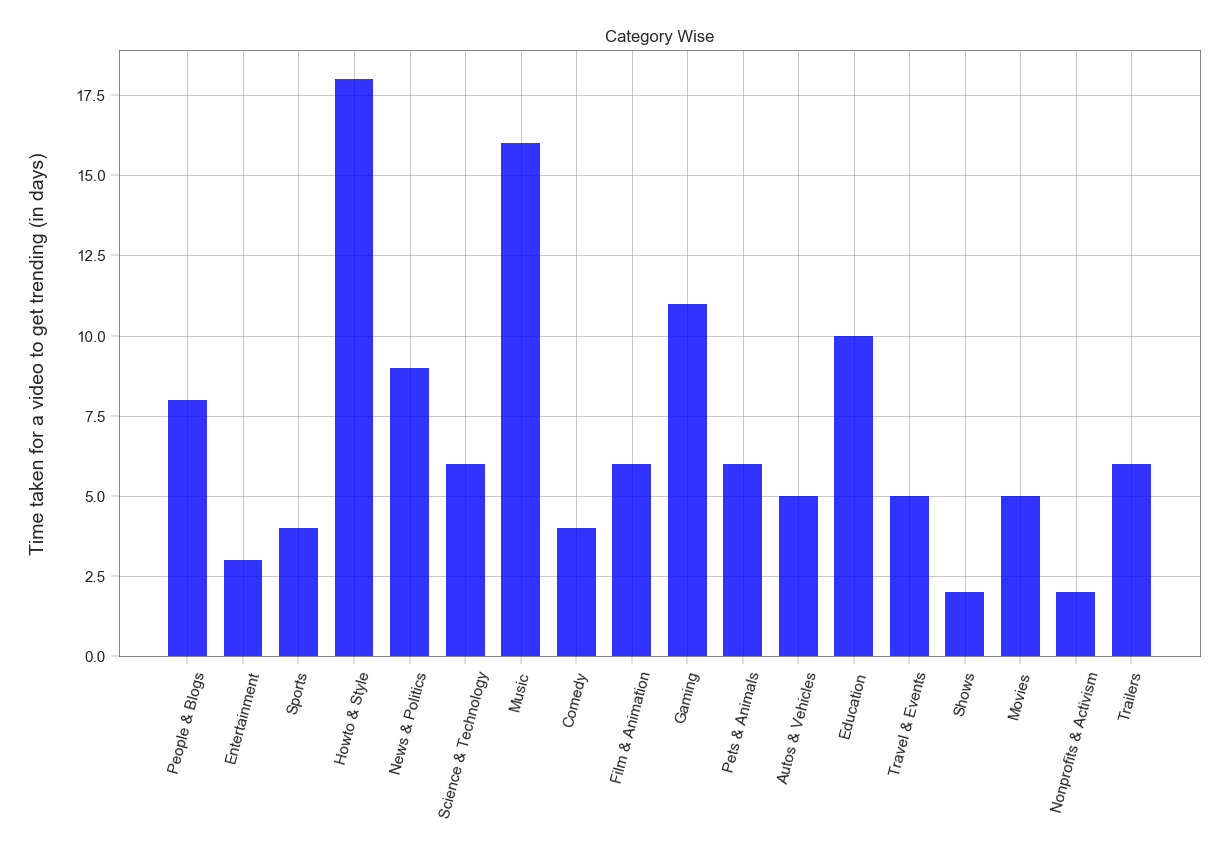

In [114]:
fig, ax = plt.subplots(figsize=(12,8)) 
index = np.arange(18) 
bar_width = 0.7
opacity = 0.8

rects1 = plt.bar(index, db0, bar_width, alpha=opacity, color='blue')

plt.xticks(index,('People & Blogs', 'Entertainment', 'Sports', 'Howto & Style',
 'News & Politics', 'Science & Technology', 'Music' ,'Comedy',
 'Film & Animation' ,'Gaming', 'Pets & Animals' ,'Autos & Vehicles',
 'Education', 'Travel & Events', 'Shows', 'Movies', 'Nonprofits & Activism',
 'Trailers'), rotation=75)
plt.ylabel('Time taken for a video to get trending (in days)')

plt.tight_layout() 
plt.title("Category Wise")
plt.show()


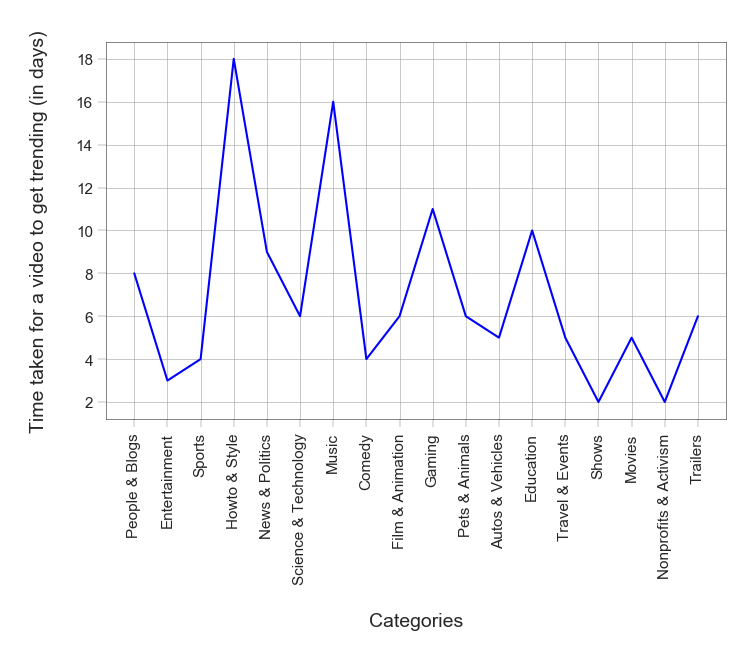

In [115]:
plt.grid(True)
plt.plot(labels1,db0, color='blue')
plt.xlabel('Categories')
plt.xticks(index,('People & Blogs', 'Entertainment', 'Sports', 'Howto & Style',
 'News & Politics', 'Science & Technology', 'Music' ,'Comedy',
 'Film & Animation' ,'Gaming', 'Pets & Animals' ,'Autos & Vehicles',
 'Education', 'Travel & Events', 'Shows', 'Movies', 'Nonprofits & Activism',
 'Trailers'), rotation=90)
plt.ylabel('Time taken for a video to get trending (in days)')
index = np.arange(20) 
plt.show()


# Coorelation Matrix with timetotrend attribute

               views  likes  dislikes  comment_count  timetotrend
views           1.00   0.78      0.42           0.52         0.01
likes           0.78   1.00      0.45           0.80         0.00
dislikes        0.42   0.45      1.00           0.70         0.00
comment_count   0.52   0.80      0.70           1.00         0.00
timetotrend     0.01   0.00      0.00           0.00         1.00


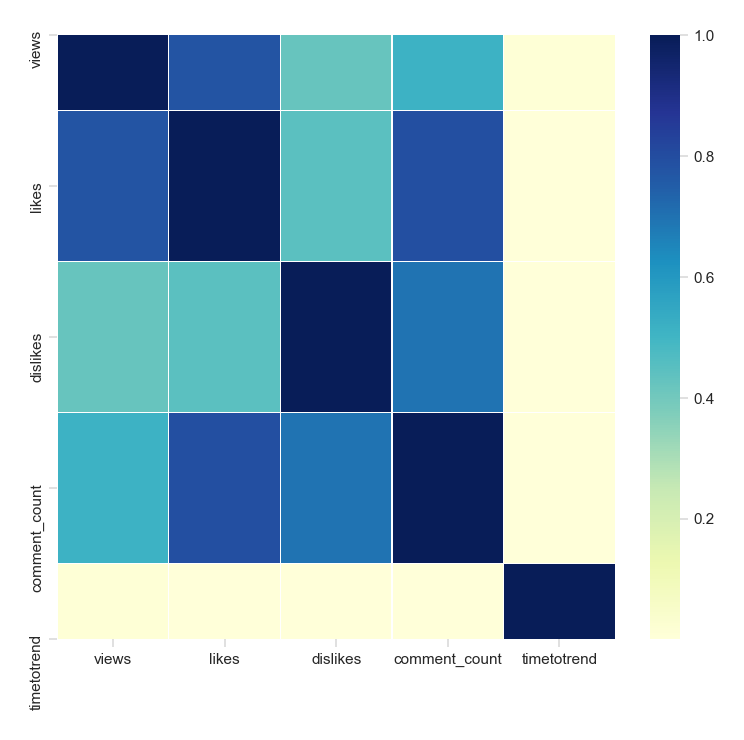

In [116]:
from pandas import DataFrame
df = DataFrame(data,columns=['views','likes','dislikes','comment_count','timetotrend'])
f, ax = plt.subplots(figsize =(9, 8)) 
corrmat = df.corr()
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1) 
print (corrmat)

# How does time taken for a to get trending vary across categories per country?

/Users/purvagulati/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


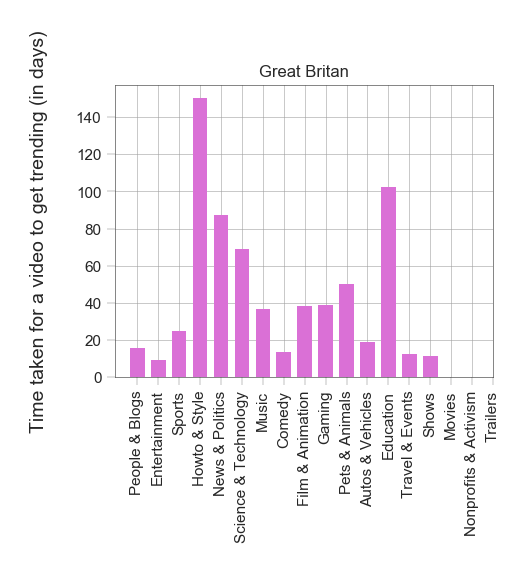

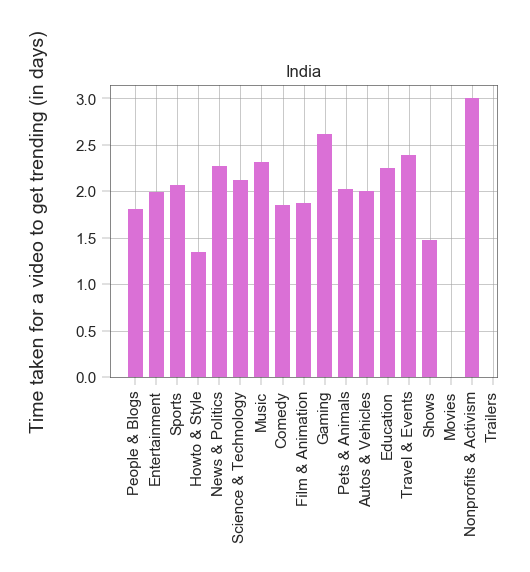

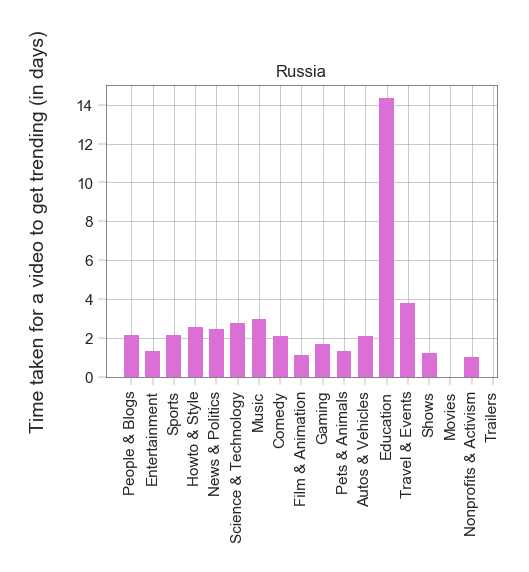

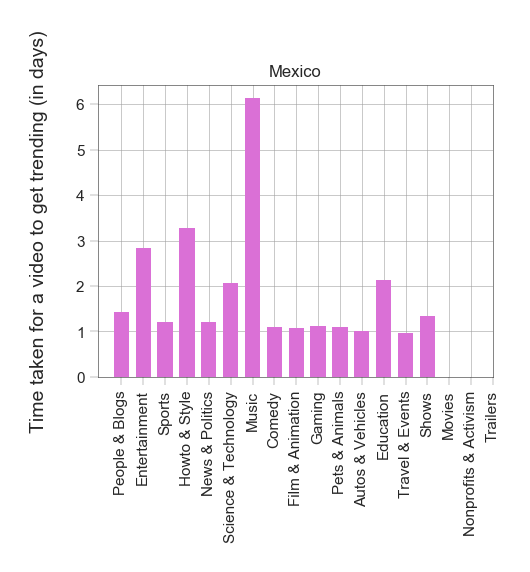

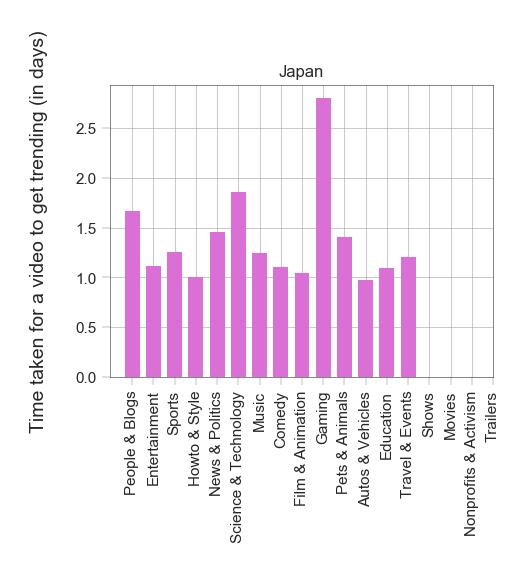

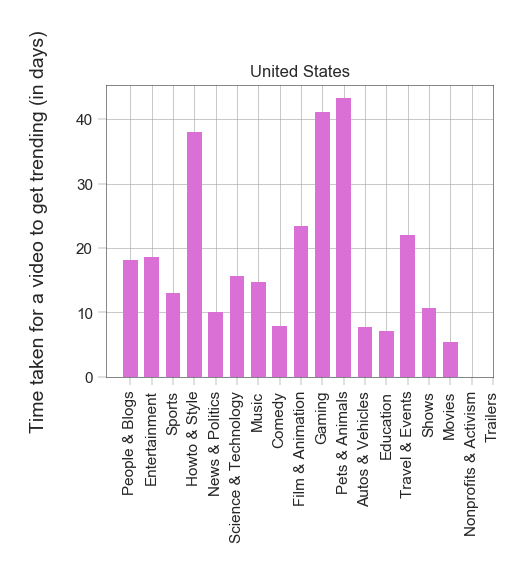

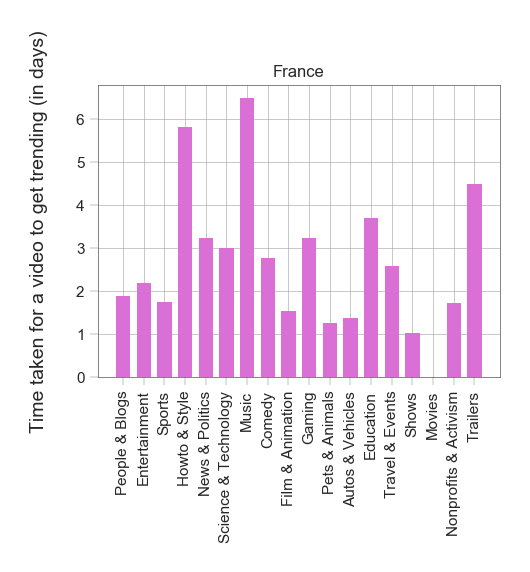

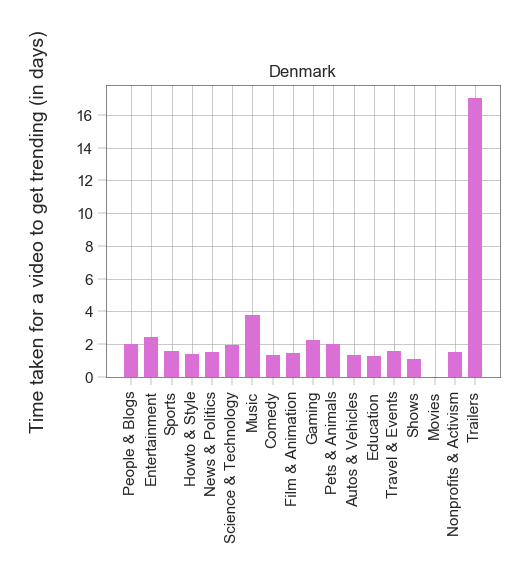

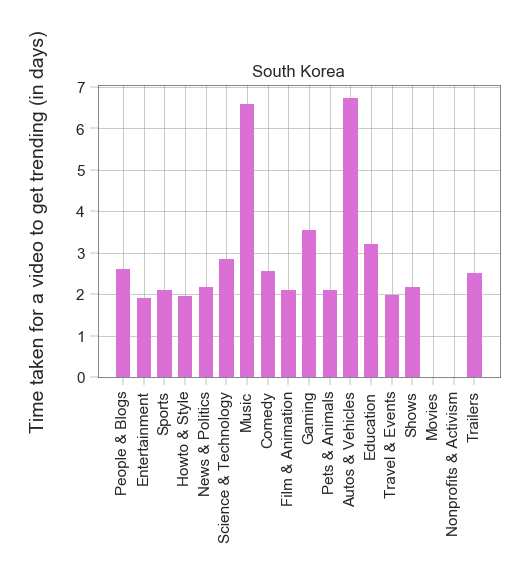

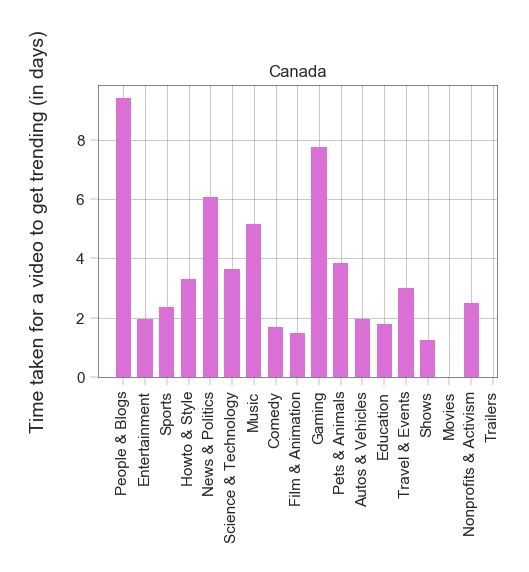

In [117]:
unique_regions=pd.unique(data['region'])

for x in unique_regions:
    db2=[]
    for y in unique_categories:
        newdata = data[data['region'] == x]
        newdat=newdata[data['category_name']==y]
        p=newdat['timetotrend'].mean()
        db2.append(p)

 
    fig, ax = plt.subplots(figsize=(5,5)) 
    index = np.arange(18) 
    bar_width = 0.7
    opacity = 1
    rects1 = plt.bar(index, db2, bar_width, alpha=opacity, color='orchid')

    plt.xticks(index,('People & Blogs', 'Entertainment', 'Sports', 'Howto & Style',
   'News & Politics', 'Science & Technology', 'Music' ,'Comedy',
   'Film & Animation' ,'Gaming', 'Pets & Animals' ,'Autos & Vehicles',
   'Education', 'Travel & Events', 'Shows', 'Movies', 'Nonprofits & Activism',
   'Trailers'), rotation=90)
    plt.ylabel('Time taken for a video to get trending (in days)')
    plt.tight_layout() 
    plt.title(x)
    plt.show()

In [119]:
import seaborn as sns
sns.set()
data = pd.read_csv('YoutubeData.csv')
#All distinct regions
countries = data['region'].unique()
countries 

array(['Great Britan', 'India', 'Russia', 'Mexico', 'Japan',
       'United States', 'France', 'Denmark', 'South Korea', 'Canada'],
      dtype=object)

# No of Instances

In [120]:
size=[]
for i in countries:
    select = data.loc[data['region']==i] #Selects all rows of a particular country
    total_rows = len(select.index)
    size.append(total_rows)

In [121]:
size

[38916, 37352, 40739, 40451, 20523, 40949, 40724, 40840, 34567, 40881]

In [122]:
K=[]
for i in range(0,len(countries)):
    K.append(i)

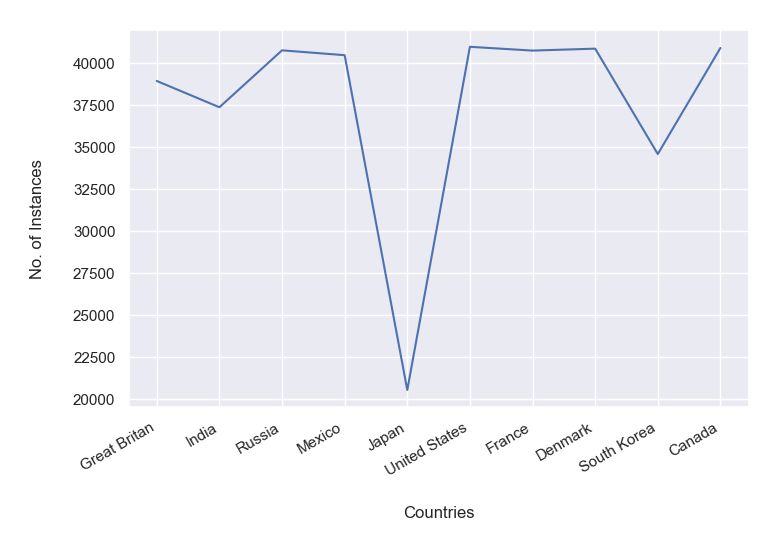

In [123]:
plt.plot(K,size)
plt.xlabel('Countries')
plt.ylabel('No. of Instances')
plt.xticks(K,countries,rotation=30,horizontalalignment='right')
plt.show()

# Correlation of Attributes (Country-Wise)

In [124]:
corr_vl=[]
corr_vd=[]
corr_vc=[]
corr_ld=[]
corr_lc=[]
corr_dc=[]

def corr(data_corr,country):
    corr_vl.append(np.corrcoef(data_corr['views'] ,data_corr['likes'])[1]) 
    corr_vd.append(np.corrcoef(data_corr['views'],data_corr['dislikes'])[1])
    corr_vc.append(np.corrcoef(data_corr['views'],data_corr['comment_count'])[1])
    corr_ld.append(np.corrcoef(data_corr['likes'],data_corr['dislikes'])[1])
    corr_lc.append(np.corrcoef(data_corr['likes'],data_corr['comment_count'])[1])
    corr_dc.append(np.corrcoef(data_corr['dislikes'],data_corr['comment_count'])[1])
    
for i in countries:
    select = data.loc[data['region']==i] #Selects all rows of a particular country
    corr(select,i)

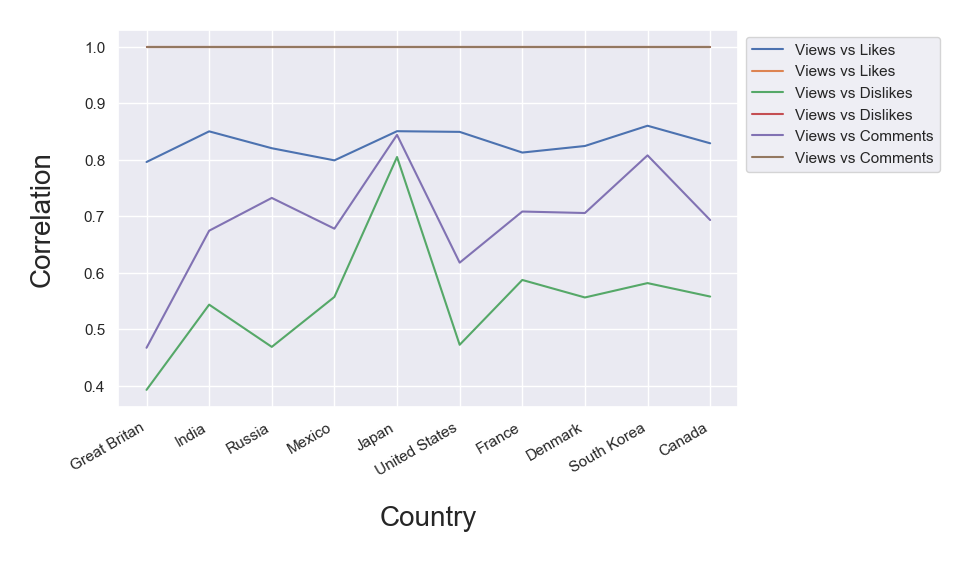

In [125]:
plt.plot(K,corr_vl, label = "Views vs Likes")
plt.plot(K,corr_vd,label= "Views vs Dislikes")
plt.plot(K,corr_vc,label= "Views vs Comments")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Correlation',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

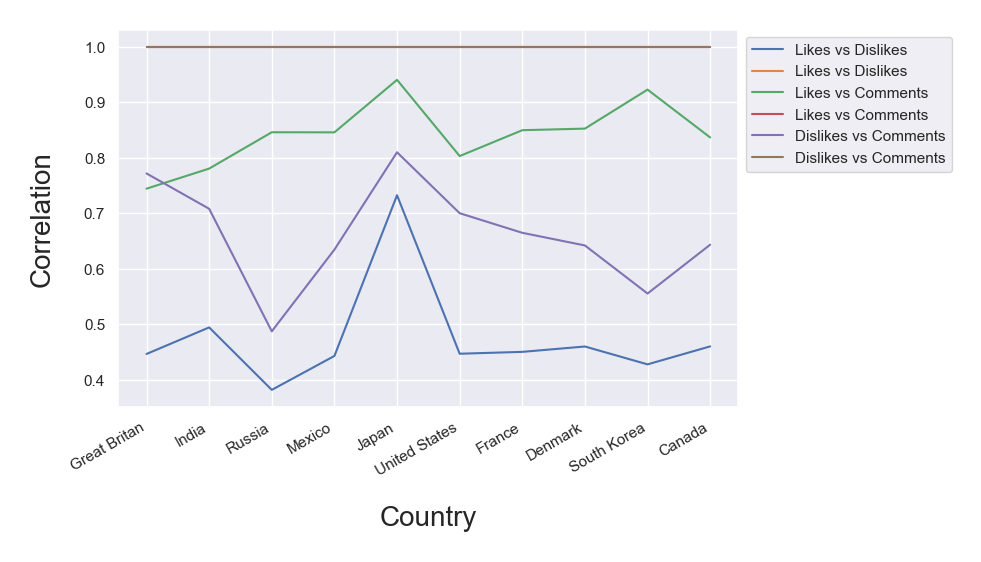

In [126]:
plt.plot(K,corr_ld, label = "Likes vs Dislikes")
plt.plot(K,corr_lc,label= "Likes vs Comments")
plt.plot(K,corr_dc,label= "Dislikes vs Comments")
plt.xlabel('Country' , fontsize=20)
plt.ylabel('Correlation',fontsize=20)

plt.xticks(K,countries,rotation=30, horizontalalignment='right')

plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()